In [ ]:
simport pandas as pd

# Load the dataset
file_path = '/content/Complete_AutomobileData.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


brand model  year  price transmission  mileage    tax   mpg fuelType  \
0  Audi    A1  2010   9990    Automatic    38000  125.0  53.3   Petrol   
1  Audi    A1  2011   6295       Manual   107000  125.0  53.3   Petrol   
2  Audi    A1  2011   6995       Manual    65000  125.0  53.3   Petrol   
3  Audi    A1  2011   4250       Manual   116000   20.0  70.6   Diesel   
4  Audi    A1  2011   7495       Manual    60700  125.0  53.3   Petrol   

   engineSize  car_age  CO2 Emissions (g/km)  segment  Inflation_Rate  
0         1.4       14                 126.8  Compact             2.5  
1         1.4       13                 126.8  Compact             3.8  
2         1.4       13                 126.8  Compact             3.8  
3         1.6       13                 105.6  Compact             3.8  
4         1.4       13                 126.8  Compact             3.8

<ipython-input-7-e6b9dd7cb1e3>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=filtered_data, x='mileage', y='price', hue='model', ci=None, legend=False)


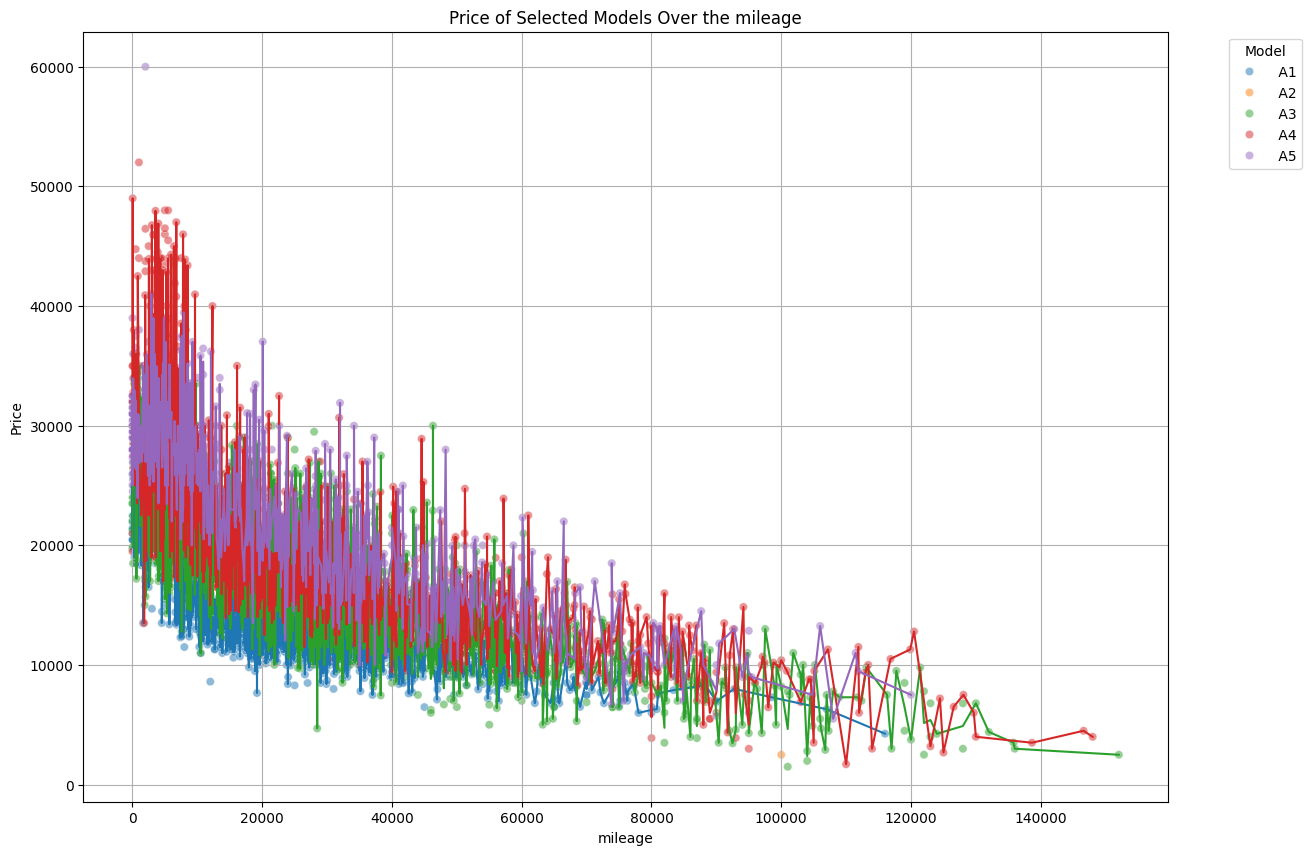

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to include only 5 specific models for better visualization
selected_models = data['model'].unique()[:5]
filtered_data = data[data['model'].isin(selected_models)]

# Set the size of the plot
plt.figure(figsize=(14, 10))

# Create a scatter plot with a regression line for each of the selected models
sns.scatterplot(data=filtered_data, x='mileage', y='price', hue='model', alpha=0.5)
sns.lineplot(data=filtered_data, x='mileage', y='price', hue='model', ci=None, legend=False)

# Set the title and labels
plt.title('Price of Selected Models Over the mileage')
plt.xlabel('mileage')
plt.ylabel('Price')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


-new-

Key Points:
PCA helps in dimensionality reduction and understanding the variance explained by each component, which gives an idea of feature importance.

LASSO regression performs feature selection by driving coefficients of less important features to zero.

RFE ranks the features based on recursive elimination using a chosen estimator (in this case, a Random Forest Regressor).

These methods together provide a robust analysis of feature importance, and you can use this information to refine your models or conduct further analysis.

**Summary Interpretation:**
Key Features Influencing Car Prices: Across both LASSO and RFE, Inflation Rate, Mileage, Engine Size, and MPG consistently appear as important features.
Tax was selected by RFE but not by LASSO, indicating it might have some influence, but its impact might be less compared to the other features.

Implications for Model Building: You can focus on Inflation Rate, Mileage, Engine Size, and MPG as the primary features when building predictive models for car prices.
Depending on the model type and your specific goals, you might also include Tax as a feature, especially if using a model like Random Forests, which can handle redundant features more effectively.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
automobile_data = pd.read_csv('/content/Complete_AutomobileData.csv')

# Select relevant features for analysis
features = ['Inflation_Rate', 'mileage', 'engineSize', 'tax', 'mpg']
target = 'price'


# Prepare the dataset with relevant numerical features and the target variable
data = automobile_data[features + [target]].dropna()

# Split the data into features (X) and target (y)
X = data[features]
y = data[target]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.linear_model import Lasso, LassoCV

# Perform LASSO with cross-validation to find the best alpha
lasso_cv = LassoCV(alphas=np.logspace(-6, 6, num=100), cv=5).fit(X_scaled, y)
lasso = Lasso(alpha=lasso_cv.alpha_).fit(X_scaled, y)

# Display the coefficients of the features
lasso_coefficients = pd.Series(lasso.coef_, index=features)
print("\nLASSO Coefficients:")
print(lasso_coefficients)

# Identify the most important features (non-zero coefficients)
important_features_lasso = lasso_coefficients[lasso_coefficients != 0].index.tolist()
print("\nFeatures selected by LASSO:")
print(important_features_lasso)



LASSO Coefficients:
Inflation_Rate     -90.669514
mileage          -4700.191915
engineSize        6692.056014
tax                 -0.000000
mpg               -342.529919
dtype: float64

Features selected by LASSO:
['Inflation_Rate', 'mileage', 'engineSize', 'mpg']


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Use RandomForestRegressor as the estimator for RFE
estimator = RandomForestRegressor(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_scaled, y)

# Get ranking of features
ranking = pd.Series(selector.ranking_, index=features)
print("\nFeature ranking with RFE:")
print(ranking.sort_values())

# Features selected by RFE
important_features_rfe = ranking[ranking == 1].index.tolist()
print("\nFeatures selected by RFE:")
print(important_features_rfe)



Feature ranking with RFE:
Inflation_Rate    1
mileage           1
engineSize        1
tax               1
mpg               1
dtype: int64

Features selected by RFE:
['Inflation_Rate', 'mileage', 'engineSize', 'tax', 'mpg']


**ANOMALY DETECTION**
Interpretation of Anomaly Detection Results

Isolation Forest: 1998 and 2020 were detected as anomalies by the Isolation Forest method.
In 1998, the combination of a high mileage and an average engineSize with a relatively low price seems to be unusual.
In 2020, despite the car being relatively new (low mileage), the high price and other attributes might suggest it as an outlier.

DBSCAN: DBSCAN detected several anomalies, including the years 1998, 2008, 2011, 2019, and 2020.
The clustering approach identifies points that don't fit well with others in their local neighborhood. In this case, the years identified have either unusual combinations of price, mileage, or Inflation_Rate.
Notably, 2008 and 2011 are marked as anomalous, possibly due to market conditions around those times that don't match the rest of the dataset.

One-Class SVM: This method detected anomalies in 2008 and 2015.
In 2008, like DBSCAN, the unusual combination of lower price and higher mileage makes it stand out.
In 2015, an anomaly is detected despite what might seem like moderate values, suggesting that One-Class SVM is picking up on subtle irregularities that the other methods might miss.

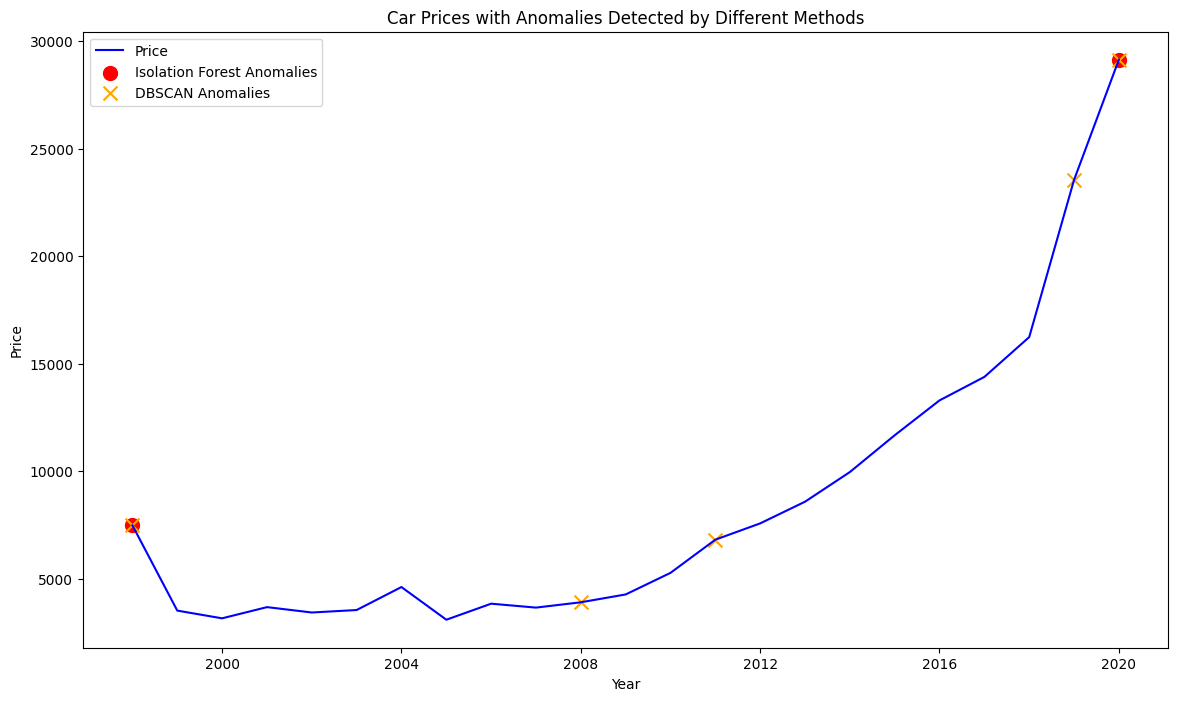

Anomalies detected by Isolation Forest:
                   price  Inflation_Rate       mileage  engineSize  \
year                                                                 
1998-01-01   7483.111111             1.8  77099.000000    2.766667   
2020-01-01  29139.610606             1.0   2068.313283    1.775424   

                   tax        mpg  
year                               
1998-01-01  250.911111  31.177778  
2020-01-01  145.951755  47.453769  

Anomalies detected by DBSCAN:
                   price  Inflation_Rate       mileage  engineSize  \
year                                                                 
1998-01-01   7483.111111             1.8  77099.000000    2.766667   
2008-01-01   3908.297170             3.5  89816.330189    1.858491   
2011-01-01   6820.022573             3.8  70971.952596    1.819639   
2019-01-01  23546.123975             1.7   6689.211135    1.720811   
2020-01-01  29139.610606             1.0   2068.313283    1.775424   

             

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

# Load the dataset
automobile_data = pd.read_csv('/content/Complete_AutomobileData.csv')

# Prepare the dataset with relevant time series variables
multivariate_data = automobile_data.groupby('year').agg({
    'price': 'mean',
    'Inflation_Rate': 'mean',
    'mileage': 'mean',
    'engineSize': 'mean',
    'tax': 'mean',
    'mpg': 'mean'
}).reset_index()

# Ensure the year index only uses the year
multivariate_data['year'] = pd.to_datetime(multivariate_data['year'].astype(str), format='%Y')
multivariate_data.set_index('year', inplace=True)

# Feature scaling for clustering-based methods
X = multivariate_data[['price', 'Inflation_Rate', 'mileage', 'engineSize', 'tax', 'mpg']]
X_scaled = (X - X.mean()) / X.std()

### 1. Isolation Forest for Anomaly Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
multivariate_data['anomaly_iso'] = iso_forest.fit_predict(X_scaled)

### 2. DBSCAN for Anomaly Detection
dbscan = DBSCAN(eps=1.5, min_samples=3)
multivariate_data['anomaly_dbscan'] = dbscan.fit_predict(X_scaled)

### 3. One-Class SVM for Anomaly Detection
svm = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.05)
multivariate_data['anomaly_svm'] = svm.fit_predict(X_scaled)


# Visualize the anomalies detected by different methods
plt.figure(figsize=(14, 8))

# Plot the original prices
plt.plot(multivariate_data.index, multivariate_data['price'], label='Price', color='blue')

# Highlight anomalies detected by Isolation Forest
anomalies_iso = multivariate_data[multivariate_data['anomaly_iso'] == -1]
plt.scatter(anomalies_iso.index, anomalies_iso['price'], color='red', label='Isolation Forest Anomalies', s=100, marker='o')

# Highlight anomalies detected by DBSCAN
anomalies_dbscan = multivariate_data[multivariate_data['anomaly_dbscan'] == -1]
plt.scatter(anomalies_dbscan.index, anomalies_dbscan['price'], color='orange', label='DBSCAN Anomalies', s=100, marker='x')

plt.title('Car Prices with Anomalies Detected by Different Methods')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

# Show the detected anomalies
print("Anomalies detected by Isolation Forest:")
print(anomalies_iso[['price', 'Inflation_Rate', 'mileage', 'engineSize', 'tax', 'mpg']])

print("\nAnomalies detected by DBSCAN:")
print(anomalies_dbscan[['price', 'Inflation_Rate', 'mileage', 'engineSize', 'tax', 'mpg']])




price and mileage

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and prepare your dataset
data = pd.read_csv('/content/Complete_AutomobileData.csv')
data['year'] = pd.to_datetime(data['year'], format='%Y')
data.set_index('year', inplace=True)

# Select relevant features (e.g., price, mileage, inflation rate, etc.)
selected_features = ['price', 'mileage', 'Inflation_Rate', 'engineSize', 'tax', 'mpg']
multivariate_data = data[selected_features].dropna()

# Function to check stationarity and apply differencing if necessary
def adf_test_and_diff(series, max_diffs=3):
    diff_count = 0
    while diff_count < max_diffs:
        result = adfuller(series.dropna())
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        if result[1] > 0.05:  # Non-stationary, apply differencing
            series = series.diff().dropna()
            diff_count += 1
            print(f'Non-stationary, differencing applied {diff_count} time(s)')
        else:  # Stationary
            print('Series is stationary')
            break
    return series

# Apply differencing to make all series stationary
stationary_data = multivariate_data.copy()
for column in stationary_data.columns:
    print(f"\nAnalyzing column: {column}")
    stationary_data[column] = adf_test_and_diff(stationary_data[column])

# Split the data into training and testing sets
train_size = int(len(stationary_data) * 0.8)
train_data = stationary_data.iloc[:train_size]
test_data = stationary_data.iloc[train_size:]




Analyzing column: price
ADF Statistic: -11.161079312900153
p-value: 2.7869614614548795e-20
Series is stationary

Analyzing column: mileage
ADF Statistic: -16.677632287697783
p-value: 1.5259625717098036e-29
Series is stationary

Analyzing column: Inflation_Rate
ADF Statistic: -16.10830171597062
p-value: 5.0449172490814616e-29
Series is stationary

Analyzing column: engineSize
ADF Statistic: -8.609883243045756
p-value: 6.519123992465419e-14
Series is stationary

Analyzing column: tax
ADF Statistic: -13.405459063424379
p-value: 4.479683403534245e-25
Series is stationary

Analyzing column: mpg
ADF Statistic: -21.637404689993815
p-value: 0.0
Series is stationary


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MSE for Price: 57065828.857106164
MSE for Mileage: 409278064.819479


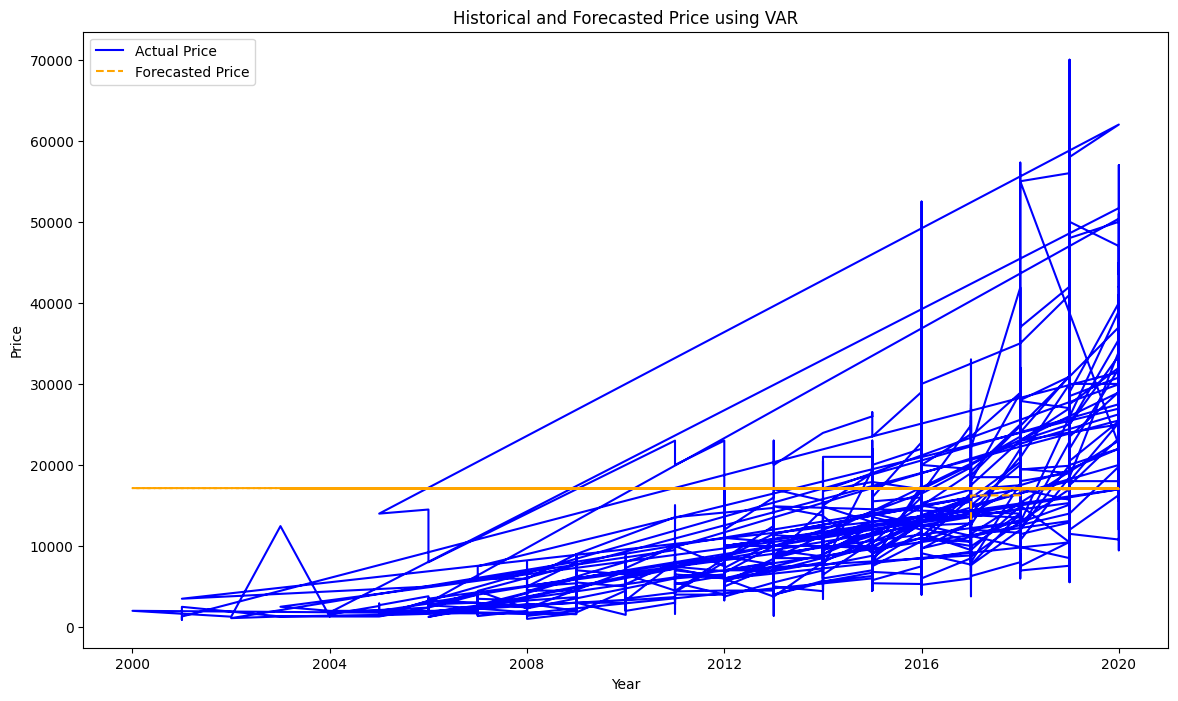

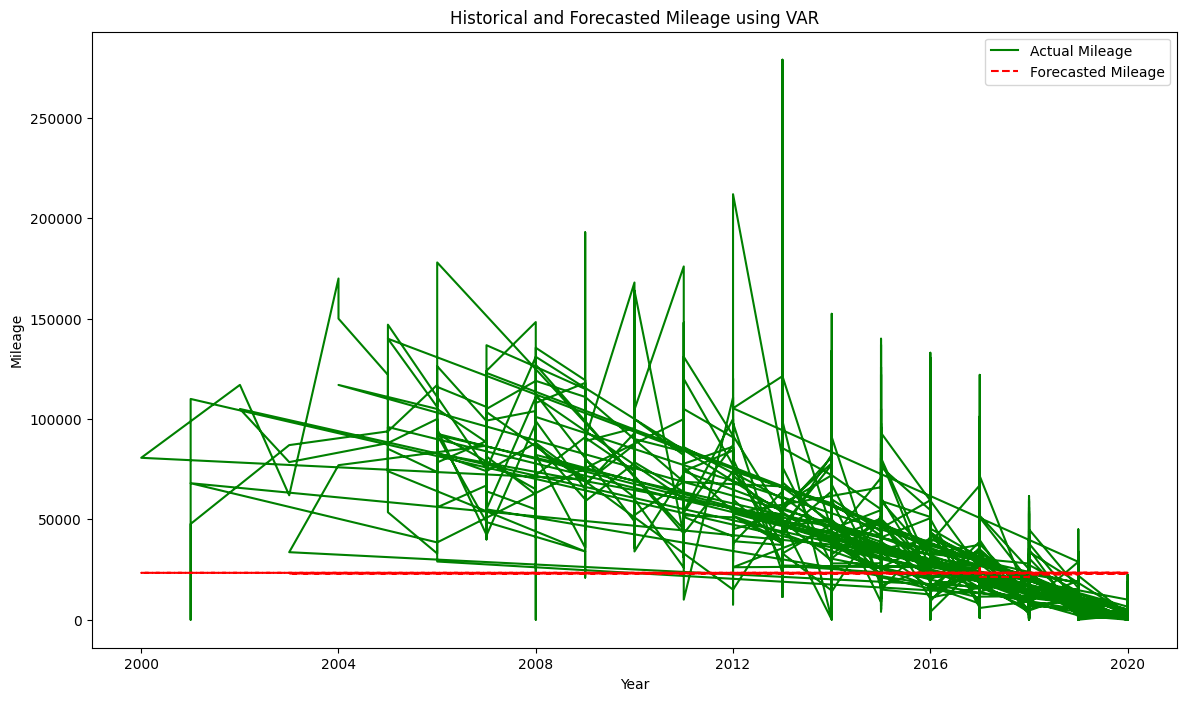

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, r2_score

# Fit the VAR model
model = VAR(train_data)
model_fitted = model.fit(maxlags=15)

# Forecasting the next steps
forecast_steps = len(test_data)

# Use the endog attribute for forecasting
forecast = model_fitted.forecast(model_fitted.endog[-model_fitted.k_ar:], steps=forecast_steps)

# Convert forecast to a DataFrame
forecast_var_df = pd.DataFrame(forecast, index=test_data.index, columns=train_data.columns)


# Calculate evaluation metrics
mse_price = mean_squared_error(test_data['price'], forecast_var_df['price'])
mse_mileage = mean_squared_error(test_data['mileage'], forecast_var_df['mileage'])

print(f'MSE for Price: {mse_price}')

print(f'MSE for Mileage: {mse_mileage}')


# Plot the results for Price
plt.figure(figsize=(14, 8))
plt.plot(test_data.index, test_data['price'], label='Actual Price', color='blue')
plt.plot(test_data.index, forecast_var_df['price'], label='Forecasted Price', linestyle='--', color='orange')
plt.title('Historical and Forecasted Price using VAR')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the results for Mileage
plt.figure(figsize=(14, 8))
plt.plot(test_data.index, test_data['mileage'], label='Actual Mileage', color='green')
plt.plot(test_data.index, forecast_var_df['mileage'], label='Forecasted Mileage', linestyle='--', color='red')
plt.title('Historical and Forecasted Mileage using VAR')
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-p

MSE for Price: 61667007.17357387
MSE for Mileage: 411894725.9644131


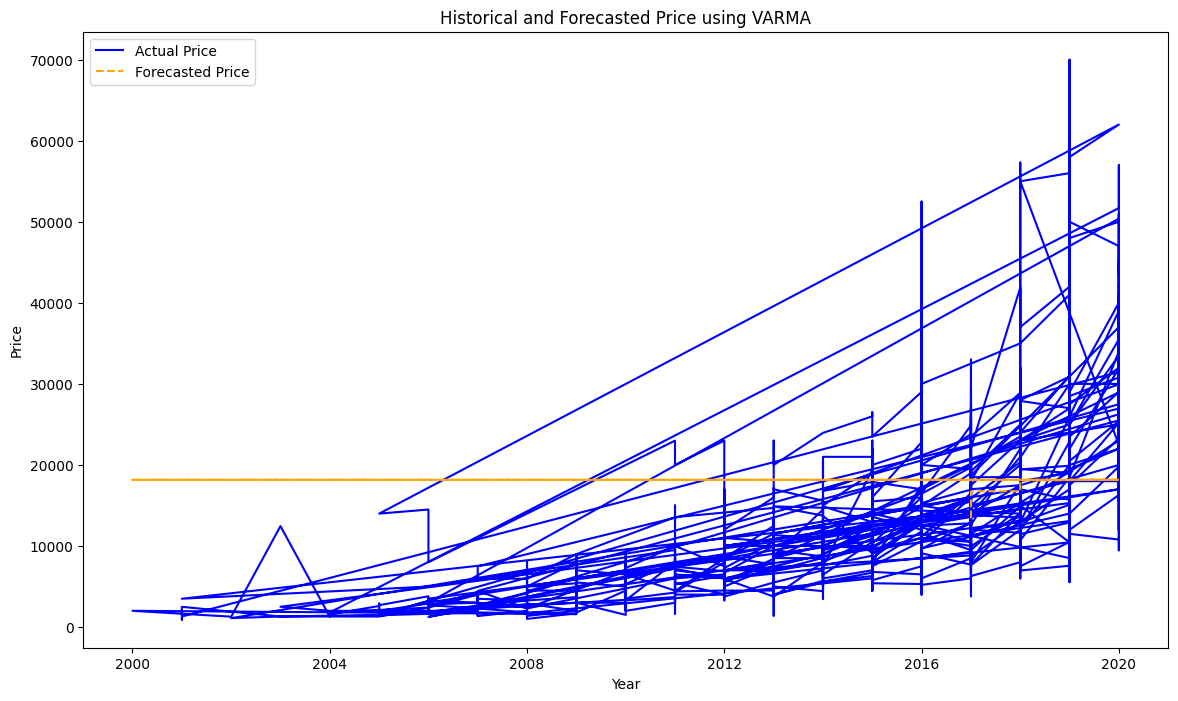

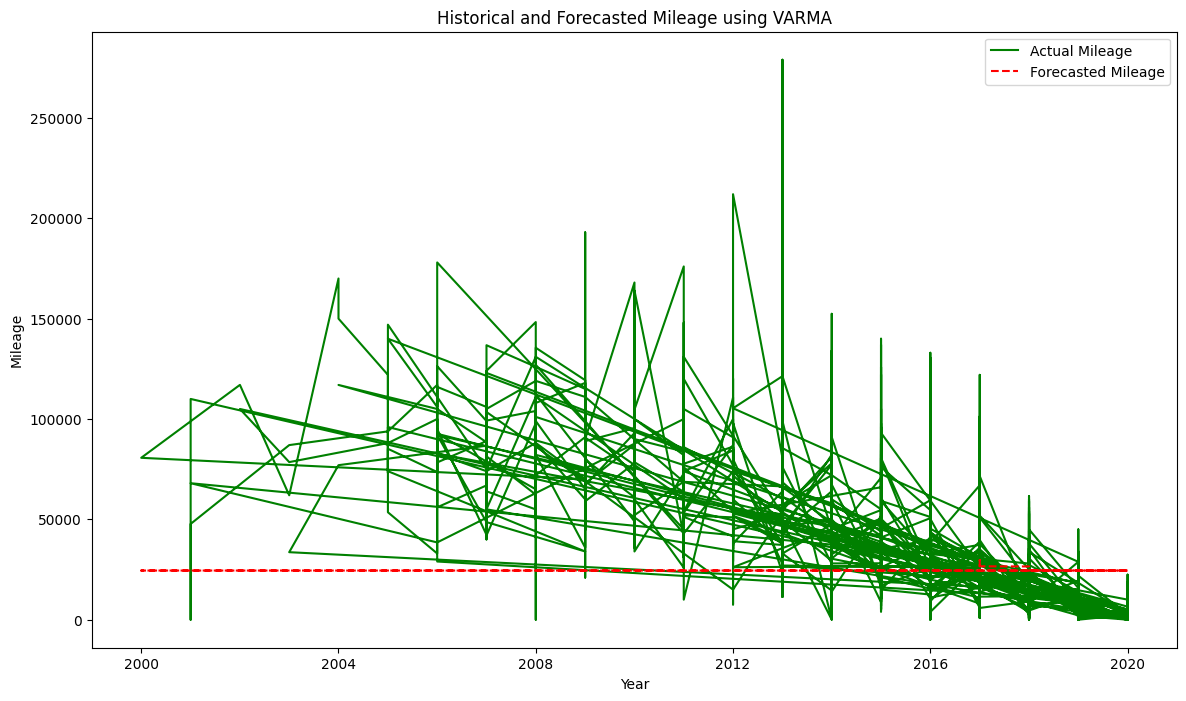

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error, r2_score

# Ensure that the train_data is in float64 format
train_data = train_data[['price', 'mileage']].astype('float64')
test_data = test_data[['price', 'mileage']].astype('float64')

# Fit the VARMA model
best_order = (1, 1)
model_varma = VARMAX(train_data, order=best_order)
model_varma_fit = model_varma.fit(disp=False)

# Forecast the next steps (e.g., length of the test data)
forecast_steps = len(test_data)
forecast_varma = model_varma_fit.get_forecast(steps=forecast_steps)

# Convert forecast to a DataFrame and round to one decimal place
forecast_varma_df = forecast_varma.predicted_mean.round(1)
forecast_varma_df.index = test_data.index



# Calculate evaluation metrics
mse_price = mean_squared_error(test_data['price'], forecast_varma_df['price'])
mse_mileage = mean_squared_error(test_data['mileage'], forecast_varma_df['mileage'])

print(f'MSE for Price: {mse_price}')
print(f'MSE for Mileage: {mse_mileage}')

# Plot the results for Price
plt.figure(figsize=(14, 8))
plt.plot(test_data.index, test_data['price'], label='Actual Price', color='blue')
plt.plot(test_data.index, forecast_varma_df['price'], label='Forecasted Price', linestyle='--', color='orange')
plt.title('Historical and Forecasted Price using VARMA')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the results for Mileage
plt.figure(figsize=(14, 8))
plt.plot(test_data.index, test_data['mileage'], label='Actual Mileage', color='green')
plt.plot(test_data.index, forecast_varma_df['mileage'], label='Forecasted Mileage', linestyle='--', color='red')
plt.title('Historical and Forecasted Mileage using VARMA')
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/Complete_AutomobileData.csv')

# Assume 'price' and 'mileage' are the targets, and other columns are predictors
X = data[['Inflation_Rate', 'tax', 'engineSize', 'mpg']]  # Example predictors
y_price = data['price']
y_mileage = data['mileage']

# Create lagged features
def create_lagged_features(data, lags):
    lagged_data = pd.DataFrame(index=data.index)
    for lag in range(1, lags + 1):
        lagged_data[f'price_lag{lag}'] = data['price'].shift(lag)
        lagged_data[f'mileage_lag{lag}'] = data['mileage'].shift(lag)
    return lagged_data.dropna()

# Combine lagged features with the original features
lags = 3
lagged_features = create_lagged_features(data[['price', 'mileage']], lags)
X_combined = pd.concat([X.iloc[lags:], lagged_features], axis=1)

# Adjust the y_train and y_test accordingly
y_price = y_price[lags:]
y_mileage = y_mileage[lags:]

# Determine the new split point (taking into account the lags)
train_size = int(len(X_combined) * 0.8)
X_train, X_test = X_combined.iloc[:train_size], X_combined.iloc[train_size:]
y_train_price, y_test_price = y_price.iloc[:train_size], y_price.iloc[train_size:]
y_train_mileage, y_test_mileage = y_mileage.iloc[:train_size], y_mileage.iloc[train_size:]


# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Random Forest Regressor
rf_model_price = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model_price.fit(X_train_scaled, y_train_price)
predictions_rf_price = rf_model_price.predict(X_test_scaled).round(1)

rf_model_mileage = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model_mileage.fit(X_train_scaled, y_train_mileage)
predictions_rf_mileage = rf_model_mileage.predict(X_test_scaled).round(1)

# 2. Decision Tree Regressor
dt_model_price = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model_price.fit(X_train_scaled, y_train_price)
predictions_dt_price = dt_model_price.predict(X_test_scaled).round(1)

dt_model_mileage = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model_mileage.fit(X_train_scaled, y_train_mileage)
predictions_dt_mileage = dt_model_mileage.predict(X_test_scaled).round(1)


# Calculate evaluation metrics
mse_rf_price = mean_squared_error(y_test_price, predictions_rf_price)
r2_rf_price = r2_score(y_test_price, predictions_rf_price)

mse_rf_mileage = mean_squared_error(y_test_mileage, predictions_rf_mileage)
r2_rf_mileage = r2_score(y_test_mileage, predictions_rf_mileage)

mse_dt_price = mean_squared_error(y_test_price, predictions_dt_price)
r2_dt_price = r2_score(y_test_price, predictions_dt_price)

mse_dt_mileage = mean_squared_error(y_test_mileage, predictions_dt_mileage)
r2_dt_mileage = r2_score(y_test_mileage, predictions_dt_mileage)

print("Random Forest Price - MSE:", mse_rf_price, "R²:", r2_rf_price)
print("Random Forest Mileage - MSE:", mse_rf_mileage, "R²:", r2_rf_mileage)

print("Decision Tree Price - MSE:", mse_dt_price, "R²:", r2_dt_price)
print("Decision Tree Mileage - MSE:", mse_dt_mileage, "R²:", r2_dt_mileage)




Random Forest Price - MSE: 7991006.71288846 R²: 0.8522969532533196
Random Forest Mileage - MSE: 158763523.92942756 R²: 0.6114260655430779
Decision Tree Price - MSE: 10534871.422410432 R²: 0.8052770242746916
Decision Tree Mileage - MSE: 180396166.85347152 R²: 0.5584801434216089


In [ ]:
# 1. Gradient Boosting Regressor for Price
from sklearn.ensemble import GradientBoostingRegressor
gb_model_price = GradientBoostingRegressor(n_estimators=300, max_depth=10, learning_rate=0.1, random_state=42)
gb_model_price.fit(X_train_scaled, y_train_price)
predictions_gb_price = gb_model_price.predict(X_test_scaled).round(1)

# 2. Gradient Boosting Regressor for Mileage
gb_model_mileage = GradientBoostingRegressor(n_estimators=300, max_depth=10, learning_rate=0.1, random_state=42)
gb_model_mileage.fit(X_train_scaled, y_train_mileage)
predictions_gb_mileage = gb_model_mileage.predict(X_test_scaled).round(1)

# Calculate evaluation metrics
mse_gb_price = mean_squared_error(y_test_price, predictions_gb_price)
r2_gb_price = r2_score(y_test_price, predictions_gb_price)

mse_gb_mileage = mean_squared_error(y_test_mileage, predictions_gb_mileage)
r2_gb_mileage = r2_score(y_test_mileage, predictions_gb_mileage)

# Print the evaluation metrics
print("Gradient Boosting Price - MSE:", mse_gb_price, "R²:", r2_gb_price)
print("Gradient Boosting Mileage - MSE:", mse_gb_mileage, "R²:", r2_gb_mileage)


Gradient Boosting Price - MSE: 8212693.451238202 R²: 0.8481993710769988
Gradient Boosting Mileage - MSE: 165300357.55770883 R²: 0.595427156606283


In [ ]:
#cnn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

# Reshape the data for CNN (samples, timesteps, features)
X_train_cnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN model
cnn_model = Sequential()

cnn_model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv1D(128, kernel_size=2, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for price prediction
cnn_model.fit(X_train_cnn, y_train_price, epochs=10, batch_size=32, verbose=1)

# Predict prices
predictions_cnn_price = cnn_model.predict(X_test_cnn).flatten().round(1)

# Train the model for mileage prediction
cnn_model.fit(X_train_cnn, y_train_mileage, epochs=10, batch_size=32, verbose=1)

# Predict mileage
predictions_cnn_mileage = cnn_model.predict(X_test_cnn).flatten().round(1)

# Calculate evaluation metrics
mse_cnn_price = mean_squared_error(y_test_price, predictions_cnn_price)
r2_cnn_price = r2_score(y_test_price, predictions_cnn_price)

mse_cnn_mileage = mean_squared_error(y_test_mileage, predictions_cnn_mileage)
r2_cnn_mileage = r2_score(y_test_mileage, predictions_cnn_mileage)

# Print the evaluation metrics
print("CNN Price - MSE:", mse_cnn_price, "R²:", r2_cnn_price)
print("CNN Mileage - MSE:", mse_cnn_mileage, "R²:", r2_cnn_mileage)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2464/2464 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 150300192.0000
Epoch 2/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 39969792.0000
Epoch 3/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 31443336.0000
Epoch 4/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 25794822.0000
Epoch 5/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 23144580.0000
Epoch 6/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 22677108.0000
Epoch 7/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 21473682.0000
Epoch 8/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 19955644.0000
Epoch 9/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 21347758.0000
Epoch 10/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 21137024.0000
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 408835712.0000
Epoch 2/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 252235456.0000
Epoch 3/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/ste

In [ ]:
#LSTM
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape the data for LSTM (samples, timesteps, features)
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the LSTM model with multiple layers
lstm_model = Sequential()

lstm_model.add(LSTM(256, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for price prediction
lstm_model.fit(X_train_lstm, y_train_price, epochs=10, batch_size=32, verbose=1)

# Predict prices
predictions_lstm_price = lstm_model.predict(X_test_lstm).flatten().round(1)

# Train the model for mileage prediction
lstm_model.fit(X_train_lstm, y_train_mileage, epochs=10, batch_size=32, verbose=1)

# Predict mileage
predictions_lstm_mileage = lstm_model.predict(X_test_lstm).flatten().round(1)

# Calculate evaluation metrics
mse_lstm_price = mean_squared_error(y_test_price, predictions_lstm_price)
r2_lstm_price = r2_score(y_test_price, predictions_lstm_price)

mse_lstm_mileage = mean_squared_error(y_test_mileage, predictions_lstm_mileage)
r2_lstm_mileage = r2_score(y_test_mileage, predictions_lstm_mileage)

# Print the evaluation metrics
print("LSTM Price - MSE:", mse_lstm_price, "R²:", r2_lstm_price)
print("LSTM Mileage - MSE:", mse_lstm_mileage, "R²:", r2_lstm_mileage)

Epoch 1/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - loss: 332287488.0000
Epoch 2/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 109274776.0000
Epoch 3/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 104918480.0000
Epoch 4/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 34505224.0000
Epoch 5/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 20181912.0000
Epoch 6/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 17398068.0000
Epoch 7/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 16478391.0000
Epoch 8/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 15272437.0000
Epoch 9/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 13984721.0000
Epoch 10/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 14058740.0000
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Epoch 1/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 242542352.0000
Epoch 2/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 192668304.0000
Epoch 3/10
2464/2464 ━━━━━━━━

forecasting price and mileage trends

Random Forest Price - MSE: 7991006.71288846 R²: 0.8522969532533196
Random Forest Mileage - MSE: 158763523.92942756 R²: 0.6114260655430779


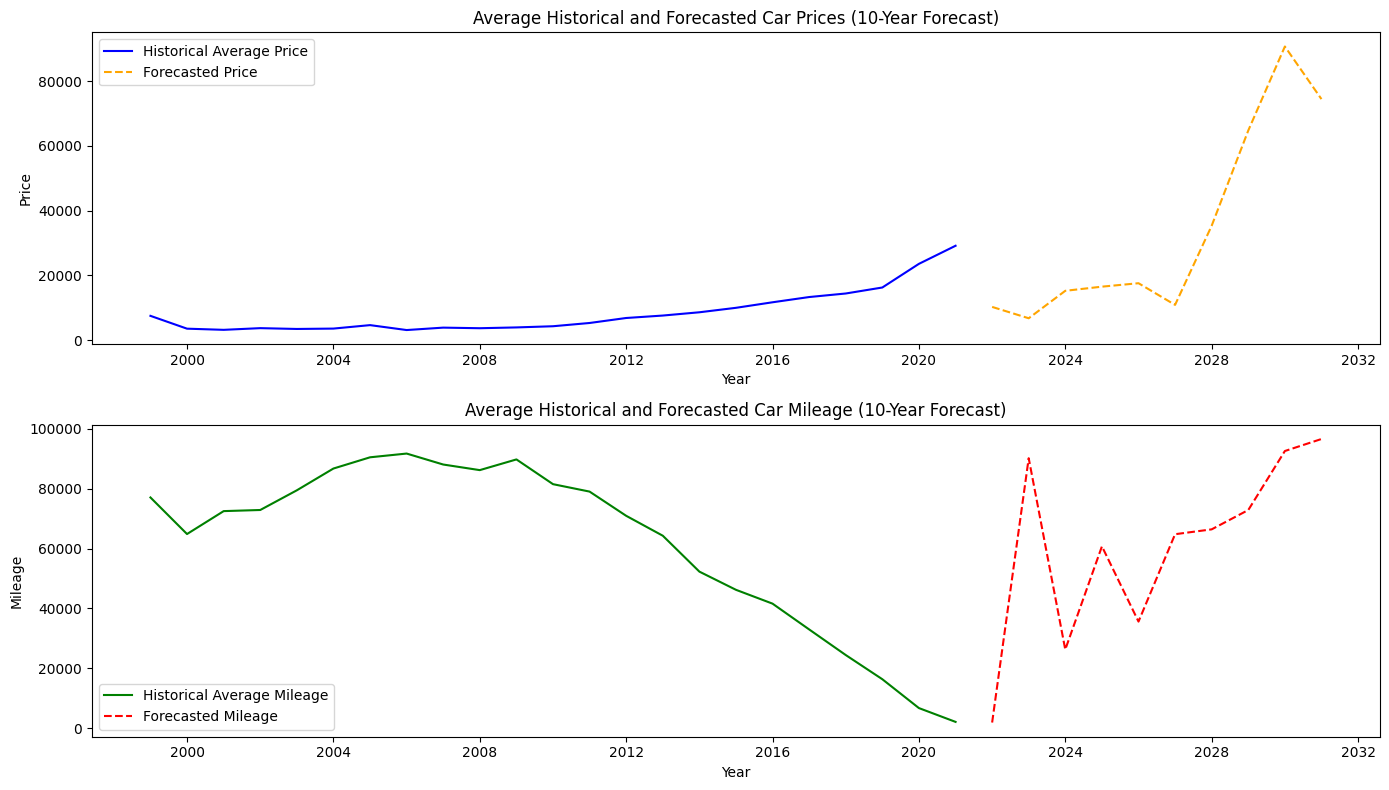

            Forecasted Price  Forecasted Mileage
2021-12-31           10245.4              1849.6
2022-12-31            6737.8             90218.0
2023-12-31           15217.7             26250.8
2024-12-31           16502.6             60757.7
2025-12-31           17564.5             35599.7
2026-12-31           10869.0             64813.2
2027-12-31           35302.4             66434.0
2028-12-31           64777.4             72907.0
2029-12-31           90698.9             92631.1
2030-12-31           74451.0             96640.6


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/Complete_AutomobileData.csv')

# Ensure the 'year' column is datetime and set it as the index
data['year'] = pd.to_datetime(data['year'], format='%Y')
data.set_index('year', inplace=True)

# Calculate the average (mean) of price and mileage per year
yearly_mean_price = data['price'].resample('Y').mean()
yearly_mean_mileage = data['mileage'].resample('Y').mean()

# Combine the yearly means into a single DataFrame
yearly_data = pd.DataFrame({
    'price': yearly_mean_price,
    'mileage': yearly_mean_mileage
}).dropna()

# Prepare the features and target variables
X = data[['Inflation_Rate', 'tax', 'engineSize', 'mpg']]  # Example predictors
y_price = data['price']
y_mileage = data['mileage']

# Create lagged features
def create_lagged_features(data, lags):
    lagged_data = pd.DataFrame(index=data.index)
    for lag in range(1, lags + 1):
        lagged_data[f'price_lag{lag}'] = data['price'].shift(lag)
        lagged_data[f'mileage_lag{lag}'] = data['mileage'].shift(lag)
    return lagged_data.dropna()

# Combine lagged features with the original features
lags = 3
lagged_features = create_lagged_features(data[['price', 'mileage']], lags)
X_combined = pd.concat([X.iloc[lags:], lagged_features], axis=1)

# Adjust the y_train and y_test accordingly
y_price = y_price[lags:]
y_mileage = y_mileage[lags:]

# Determine the new split point (taking into account the lags)
train_size = int(len(X_combined) * 0.8)
X_train, X_test = X_combined.iloc[:train_size], X_combined.iloc[train_size:]
y_train_price, y_test_price = y_price.iloc[:train_size], y_price.iloc[train_size:]
y_train_mileage, y_test_mileage = y_mileage.iloc[:train_size], y_mileage.iloc[train_size:]

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
rf_model_price = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model_price.fit(X_train_scaled, y_train_price)
predictions_rf_price = rf_model_price.predict(X_test_scaled).round(1)

rf_model_mileage = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model_mileage.fit(X_train_scaled, y_train_mileage)
predictions_rf_mileage = rf_model_mileage.predict(X_test_scaled).round(1)

# Calculate evaluation metrics
mse_rf_price = mean_squared_error(y_test_price, predictions_rf_price)
r2_rf_price = r2_score(y_test_price, predictions_rf_price)

mse_rf_mileage = mean_squared_error(y_test_mileage, predictions_rf_mileage)
r2_rf_mileage = r2_score(y_test_mileage, predictions_rf_mileage)

print("Random Forest Price - MSE:", mse_rf_price, "R²:", r2_rf_price)
print("Random Forest Mileage - MSE:", mse_rf_mileage, "R²:", r2_rf_mileage)

# Forecast the next 10 years
forecast_periods = 10
last_known_input = X_test_scaled[-1].reshape(1, -1)
forecast_rf_price = []
forecast_rf_mileage = []

for _ in range(forecast_periods):
    # Forecast price
    forecast_price = rf_model_price.predict(last_known_input)[0]
    forecast_rf_price.append(round(forecast_price, 1))

    # Forecast mileage
    forecast_mileage = rf_model_mileage.predict(last_known_input)[0]
    forecast_rf_mileage.append(round(forecast_mileage, 1))

    # Prepare the next input for forecasting
    next_input = np.roll(last_known_input, -1, axis=1)
    next_input[0, -1] = forecast_price  # Update the price
    last_known_input = next_input

# Convert the forecasts to DataFrame with appropriate dates
forecast_start = pd.to_datetime(data.index[-1]) + pd.DateOffset(years=1)
forecast_years = pd.date_range(start=forecast_start, periods=forecast_periods, freq='Y')
forecast_df = pd.DataFrame({
    'Forecasted Price': forecast_rf_price,
    'Forecasted Mileage': forecast_rf_mileage
}, index=forecast_years)

# Plot the yearly average and forecasted prices
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(yearly_mean_price.index, yearly_mean_price, label='Historical Average Price', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecasted Price'], label='Forecasted Price', linestyle='--', color='orange')
plt.title('Average Historical and Forecasted Car Prices (10-Year Forecast)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(yearly_mean_mileage.index, yearly_mean_mileage, label='Historical Average Mileage', color='green')
plt.plot(forecast_df.index, forecast_df['Forecasted Mileage'], label='Forecasted Mileage', linestyle='--', color='red')
plt.title('Average Historical and Forecasted Car Mileage (10-Year Forecast)')
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.legend()

plt.tight_layout()
plt.show()

# Display the forecasted values
print(forecast_df)


BRAND TRENDS

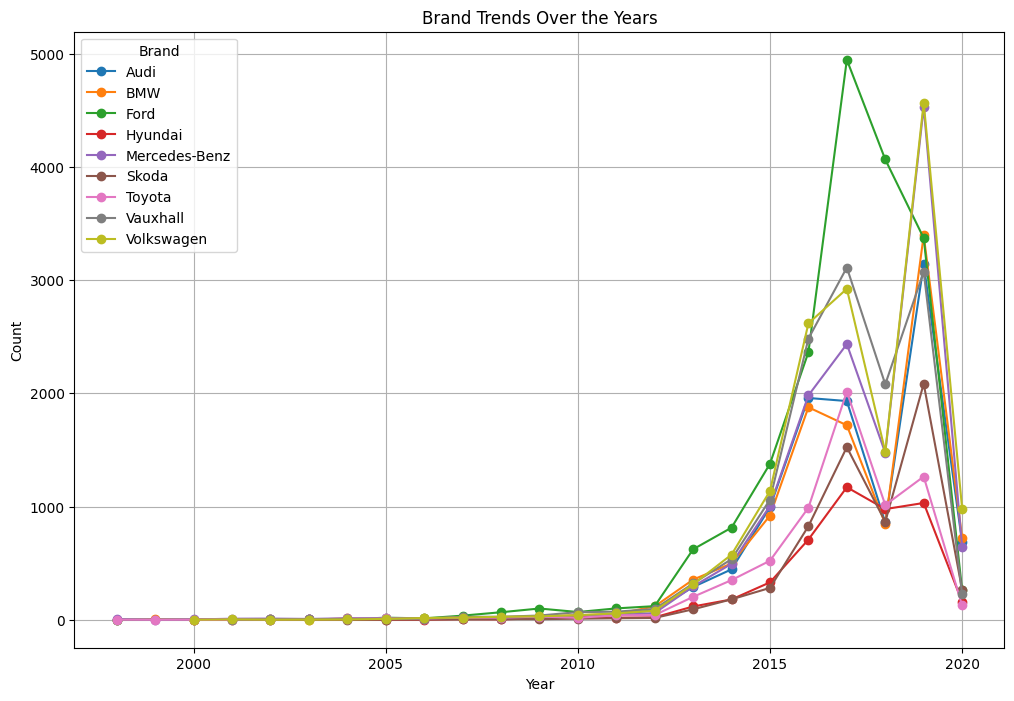

In [ ]:
import matplotlib.pyplot as plt
# Load your dataset
data = pd.read_csv('/content/Complete_AutomobileData.csv')

# Aggregate data by brand and year
brand_trends = data.groupby(['brand', 'year']).size().reset_index(name='count')

# Display the aggregated data
brand_trends.head()

# Select a few brands for visualization
selected_brands = brand_trends['brand'].unique()[:9]

# Plot the trends for selected brands
plt.figure(figsize=(12, 8))
for brand in selected_brands:
    brand_data = brand_trends[brand_trends['brand'] == brand]
    plt.plot(brand_data['year'], brand_data['count'], marker='o', label=brand)

plt.title('Brand Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Brand')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools
from warnings import catch_warnings, simplefilter

# Function to check stationarity and apply differencing if needed
def make_stationary(series):
    result = adfuller(series)
    diff_count = 0
    while result[1] > 0.05:  # p-value > 0.05 indicates non-stationarity
        series = series.diff().dropna()
        diff_count += 1
        result = adfuller(series)
    return series, diff_count

# Function to perform grid search for the best (p, q) based on AIC
def find_best_arima_order(series, max_p=3, max_q=3):
    best_aic = np.inf
    best_order = None

    # Loop over combinations of p and q values
    for p, q in itertools.product(range(max_p + 1), range(max_q + 1)):
        try:
            with catch_warnings():
                simplefilter("ignore")
                model = ARIMA(series, order=(p, 0, q))  # d=0 because we already made the series stationary
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, q)
        except Exception as e:
            continue

    return best_order, best_aic

# Load the data
data = pd.read_csv('Complete_AutomobileData.csv')

# Aggregate data by brand and year
brand_trends = data.groupby(['brand', 'year']).size().reset_index(name='count')

# Store best p, d, q for each brand
best_orders = []
for brand in brand_trends['brand'].unique():
    brand_data = brand_trends[brand_trends['brand'] == brand].set_index('year')['count']

    # Make the series stationary and get the number of differencing steps
    stationary_series, diff_count = make_stationary(brand_data)

    # Find the best p, q order using the stationary series
    best_pq_order, best_aic = find_best_arima_order(stationary_series, max_p=5, max_q=5)

    # Check if a valid order was found
    if best_pq_order is not None:
        best_orders.append({
            'brand': brand,
            'best_order': (best_pq_order[0], diff_count, best_pq_order[1]),
            'best_aic': best_aic
        })
    else:
        best_orders.append({
            'brand': brand,
            'best_order': (None, None, None),
            'best_aic': None
        })

# Convert best orders to a DataFrame
best_orders_df = pd.DataFrame(best_orders)

# Display the best p, d, q orders for each brand
print(best_orders_df)



           brand best_order    best_aic
0           Audi  (4, 7, 1)   14.000000
1            BMW  (4, 3, 2)   16.000000
2           Ford  (1, 4, 1)  297.489005
3        Hyundai  (5, 3, 2)   49.904701
4  Mercedes-Benz  (5, 6, 0)   14.000000
5          Skoda  (0, 1, 3)  243.685933
6         Toyota  (5, 2, 2)  101.364132
7       Vauxhall  (5, 5, 0)   14.000000
8     Volkswagen  (3, 4, 1)   12.000000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Best orders DataFrame (from your analysis)
best_orders_df = pd.DataFrame({
    'brand': ['Audi', 'BMW', 'Ford', 'Hyundai', 'Mercedes-Benz', 'Skoda', 'Toyota', 'Vauxhall', 'Volkswagen'],
    'best_order': [(4, 7, 1), (4, 3, 2), (1, 4, 1), (5, 3, 2), (5, 6, 0), (0, 1, 3), (5, 2, 3), (5, 5, 0), (3, 4, 1)]
})

# Initialize an empty DataFrame to store the forecasts from all models
forecast_df_brand = pd.DataFrame()

# Initialize a list to store MSE and RMSE results
mse_results_brand = []

# Forecast using ARIMA and Exponential Smoothing, and calculate MSE and RMSE
for i, row in best_orders_df.iterrows():
    brand = row['brand']
    p, d, q = row['best_order']

    # Filter the data for the current brand
    brand_data = brand_trends[brand_trends['brand'] == brand].set_index('year')['count']

    # Split the data into train and test sets
    train_size = int(len(brand_data) * 0.8)
    train_data, test_data = brand_data.iloc[:train_size], brand_data.iloc[train_size:]

    # Flag to track if ARIMA forecast is successful
    arima_success = True
    try:
        # Apply ARIMA model using the best p, d, q values
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", ConvergenceWarning)
            model_arima = ARIMA(train_data, order=(p, d, q))
            model_arima_fit = model_arima.fit()
            forecast_arima = model_arima_fit.forecast(steps=len(test_data))

        # Round the forecasts to whole numbers and set any negative values to zero
        forecast_arima = np.round(forecast_arima).astype(int)
        forecast_arima[forecast_arima < 0] = 0

        # Ensure forecast length matches the test data length
        if len(forecast_arima) != len(test_data):
            raise ValueError("Forecast length does not match test data length.")

    except (ValueError, np.linalg.LinAlgError) as e:
        print(f"Error fitting ARIMA model for {brand}: {e}")
        print(f"Skipping ARIMA model for {brand}.")
        arima_success = False
        forecast_arima = np.full(len(test_data), np.nan)  # Return NaNs for this brand

    # Apply Exponential Smoothing model
    model_expsmooth = ExponentialSmoothing(train_data, trend='add', seasonal=None)
    model_expsmooth_fit = model_expsmooth.fit()
    forecast_expsmooth = model_expsmooth_fit.forecast(steps=len(test_data))

    # Round the forecasts to whole numbers and set any negative values to zero
    forecast_expsmooth = np.round(forecast_expsmooth).astype(int)
    forecast_expsmooth[forecast_expsmooth < 0] = 0

    # Calculate MSE and RMSE for each model based on the test data
    if arima_success:
        mse_arima = mean_squared_error(test_data, forecast_arima)
        rmse_arima = sqrt(mse_arima)
    else:
        mse_arima = np.nan
        rmse_arima = np.nan

    mse_expsmooth = mean_squared_error(test_data, forecast_expsmooth)
    rmse_expsmooth = sqrt(mse_expsmooth)

    # Store the MSE and RMSE results
    mse_results_brand.append({
        'brand': brand,
        'ARIMA_MSE': mse_arima,
        'ARIMA_RMSE': rmse_arima,
        'Exponential_Smoothing_MSE': mse_expsmooth,
        'Exponential_Smoothing_RMSE': rmse_expsmooth
    })
    if arima_success:
        # Combine forecasts for final visualization
        forecast_index = pd.Series(test_data.index)
        forecast_data_brand = pd.DataFrame({
            'brand': brand,
            'year': forecast_index,
            'ARIMA': forecast_arima,
            'Exponential Smoothing': forecast_expsmooth
        })

        # Append the forecasted data to the forecast_df_brand
        forecast_df_brand = pd.concat([forecast_df_brand, forecast_data_brand], axis=0)

# Convert MSE results to a DataFrame
mse_results_brand_df = pd.DataFrame(mse_results_brand)

# Reset index for the final DataFrame
forecast_df_brand.reset_index(drop=True, inplace=True)

# Display the MSE and RMSE results and first few rows of the forecast data
print(mse_results_brand_df)






/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

Error fitting ARIMA model for Vauxhall: LU decomposition error.
Skipping ARIMA model for Vauxhall.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

           brand     ARIMA_MSE    ARIMA_RMSE  Exponential_Smoothing_MSE  \
0           Audi  1.234636e+12  1.111142e+06                 9797175.50   
1            BMW  2.889504e+06  1.699854e+03                 1319201.40   
2           Ford  4.393965e+06  2.096179e+03                 4177678.80   
3        Hyundai  5.156885e+05  7.181145e+02                 1276306.25   
4  Mercedes-Benz  2.188557e+07  4.678202e+03                 2274096.40   
5          Skoda  6.284545e+05  7.927512e+02                 2186788.50   
6         Toyota  5.958864e+05  7.719368e+02                  595087.00   
7       Vauxhall           NaN           NaN                21715658.50   
8     Volkswagen  1.240919e+07  3.522668e+03                 2623338.40   

   Exponential_Smoothing_RMSE  
0                 3130.044009  
1                 1148.564931  
2                 2043.937083  
3                 1129.737248  
4                 1508.010743  
5                 1478.779395  
6                  771.41

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No s

  brand  year  Exponential Smoothing
0  Audi  2021                   11.8
1  Audi  2022                   11.9
2  Audi  2023                   12.0
3  Audi  2024                   12.1
4  Audi  2025                   12.3


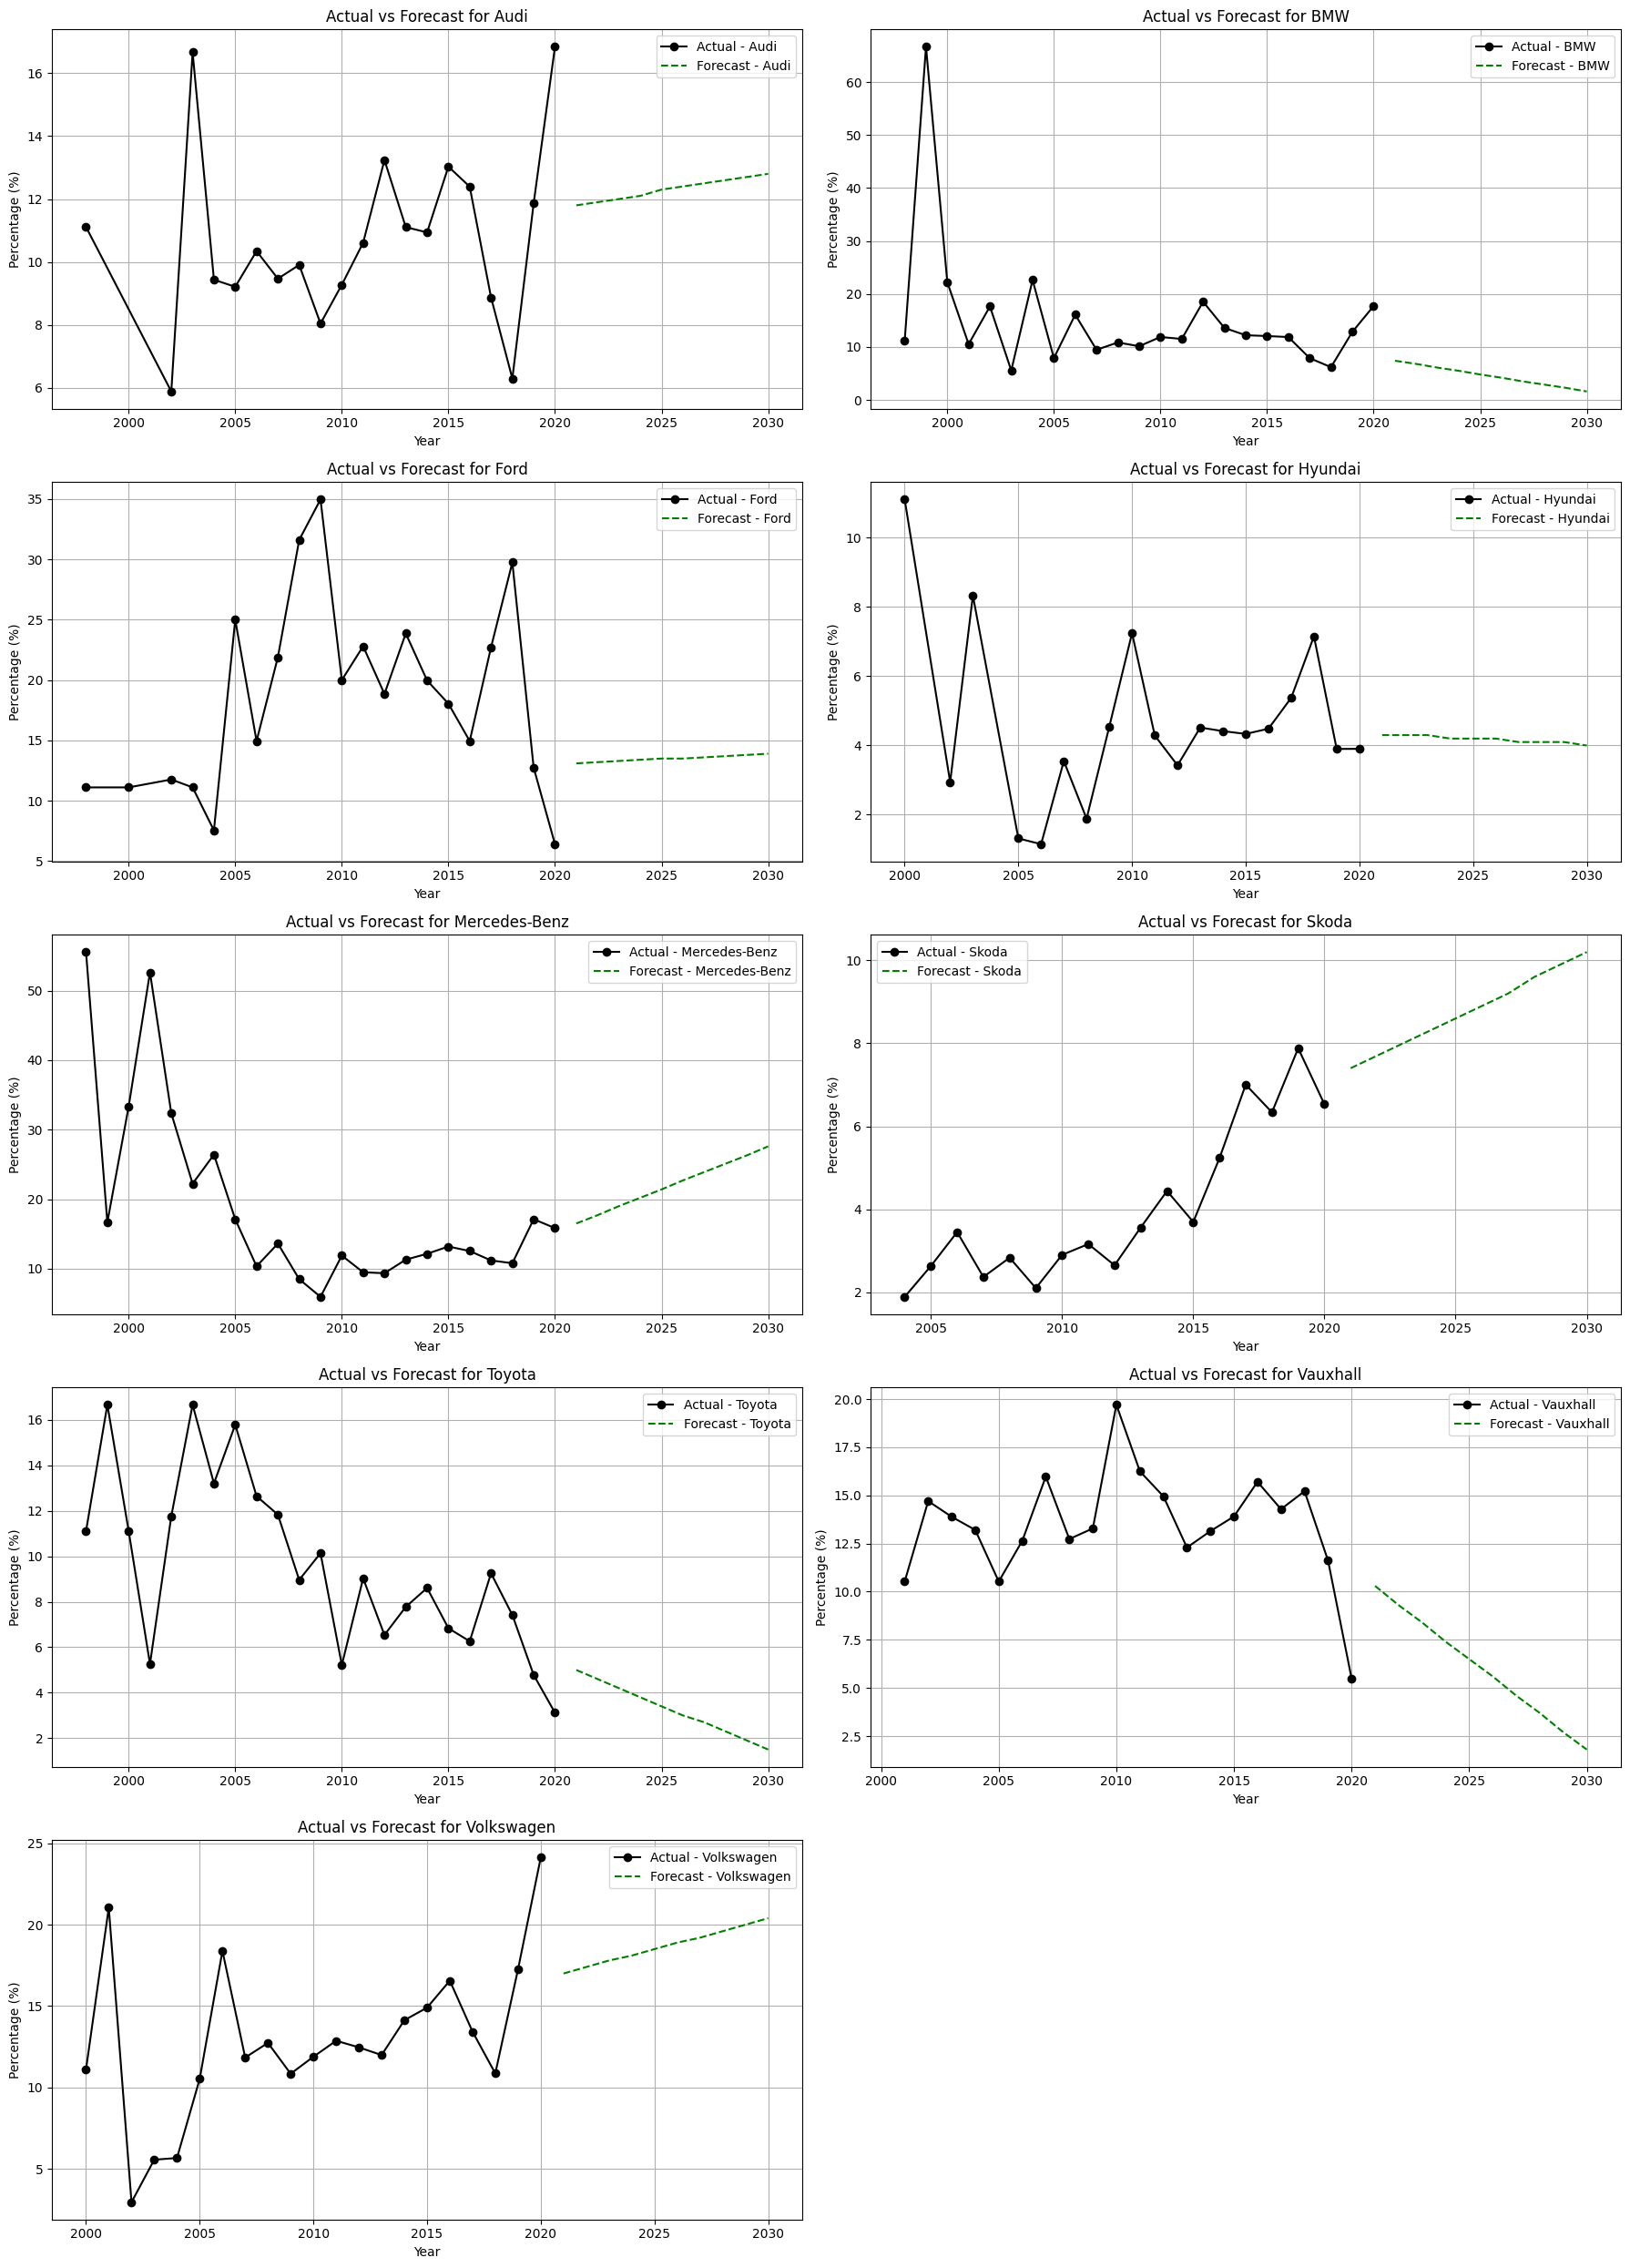

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
data = pd.read_csv('Complete_AutomobileData.csv')

# Aggregate data by brand and year
brand_trends = data.groupby(['brand', 'year']).size().reset_index(name='count')

# Calculate the percentage of each brand's count relative to the total for each year
total_counts_per_year = brand_trends.groupby('year')['count'].sum()
brand_trends['percentage'] = brand_trends.apply(lambda row: (row['count'] / total_counts_per_year[row['year']]) * 100, axis=1)

# Initialize an empty DataFrame to store the forecasts
forecast_df = pd.DataFrame()

# Forecast the next 10 years using Exponential Smoothing for each brand's percentage
for brand in brand_trends['brand'].unique():
    # Filter the data for the current brand
    brand_data = brand_trends[brand_trends['brand'] == brand].set_index('year')['percentage']

    # Apply Exponential Smoothing model
    model_expsmooth = ExponentialSmoothing(brand_data, trend='add', seasonal=None)
    model_expsmooth_fit = model_expsmooth.fit()
    forecast_expsmooth = model_expsmooth_fit.forecast(steps=10)

    # Apply constraint to ensure no negative forecasts and round to one decimal place
    forecast_expsmooth = np.round(forecast_expsmooth, 1)
    forecast_expsmooth[forecast_expsmooth < 0] = 0

    # Combine forecasts
    forecast_index = pd.Series(range(brand_data.index[-1] + 1, brand_data.index[-1] + 11))
    forecast_data = pd.DataFrame({
        'brand': brand,
        'year': forecast_index,
        'Exponential Smoothing': forecast_expsmooth.values
    })

    # Append the forecasted data to the forecast_df
    forecast_df = pd.concat([forecast_df, forecast_data], axis=0)

# Reset index for the final DataFrame
forecast_df.reset_index(drop=True, inplace=True)

# Display the first few rows of the rounded forecast data as percentages
print(forecast_df.head())

# Plotting the actual vs forecasted values, with 2 brands per row
brands = forecast_df['brand'].unique()
n_brands = len(brands)
n_rows = np.ceil(n_brands / 2).astype(int)

plt.figure(figsize=(18, 5 * n_rows))

# Plot each brand's forecasts
for i, brand in enumerate(brands, 1):
    plt.subplot(n_rows, 2, i)

    # Extract actual data and forecasted data
    brand_actual = brand_trends[brand_trends['brand'] == brand].set_index('year')['percentage']
    brand_forecast_expsmooth = forecast_df[forecast_df['brand'] == brand].set_index('year')['Exponential Smoothing']

    # Plot the actual values
    plt.plot(brand_actual.index, brand_actual, label=f'Actual - {brand}', marker='o', color='black')

    # Plot the Exponential Smoothing forecasted values
    plt.plot(brand_forecast_expsmooth.index, brand_forecast_expsmooth, linestyle='--', label=f'Forecast - {brand}', color='green')

    # Set title and labels
    plt.title(f'Actual vs Forecast for {brand}')
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No s

  brand  year  Exponential Smoothing
0  Audi  2021                   1917
1  Audi  2022                   2070
2  Audi  2023                   2223
3  Audi  2024                   2376
4  Audi  2025                   2528


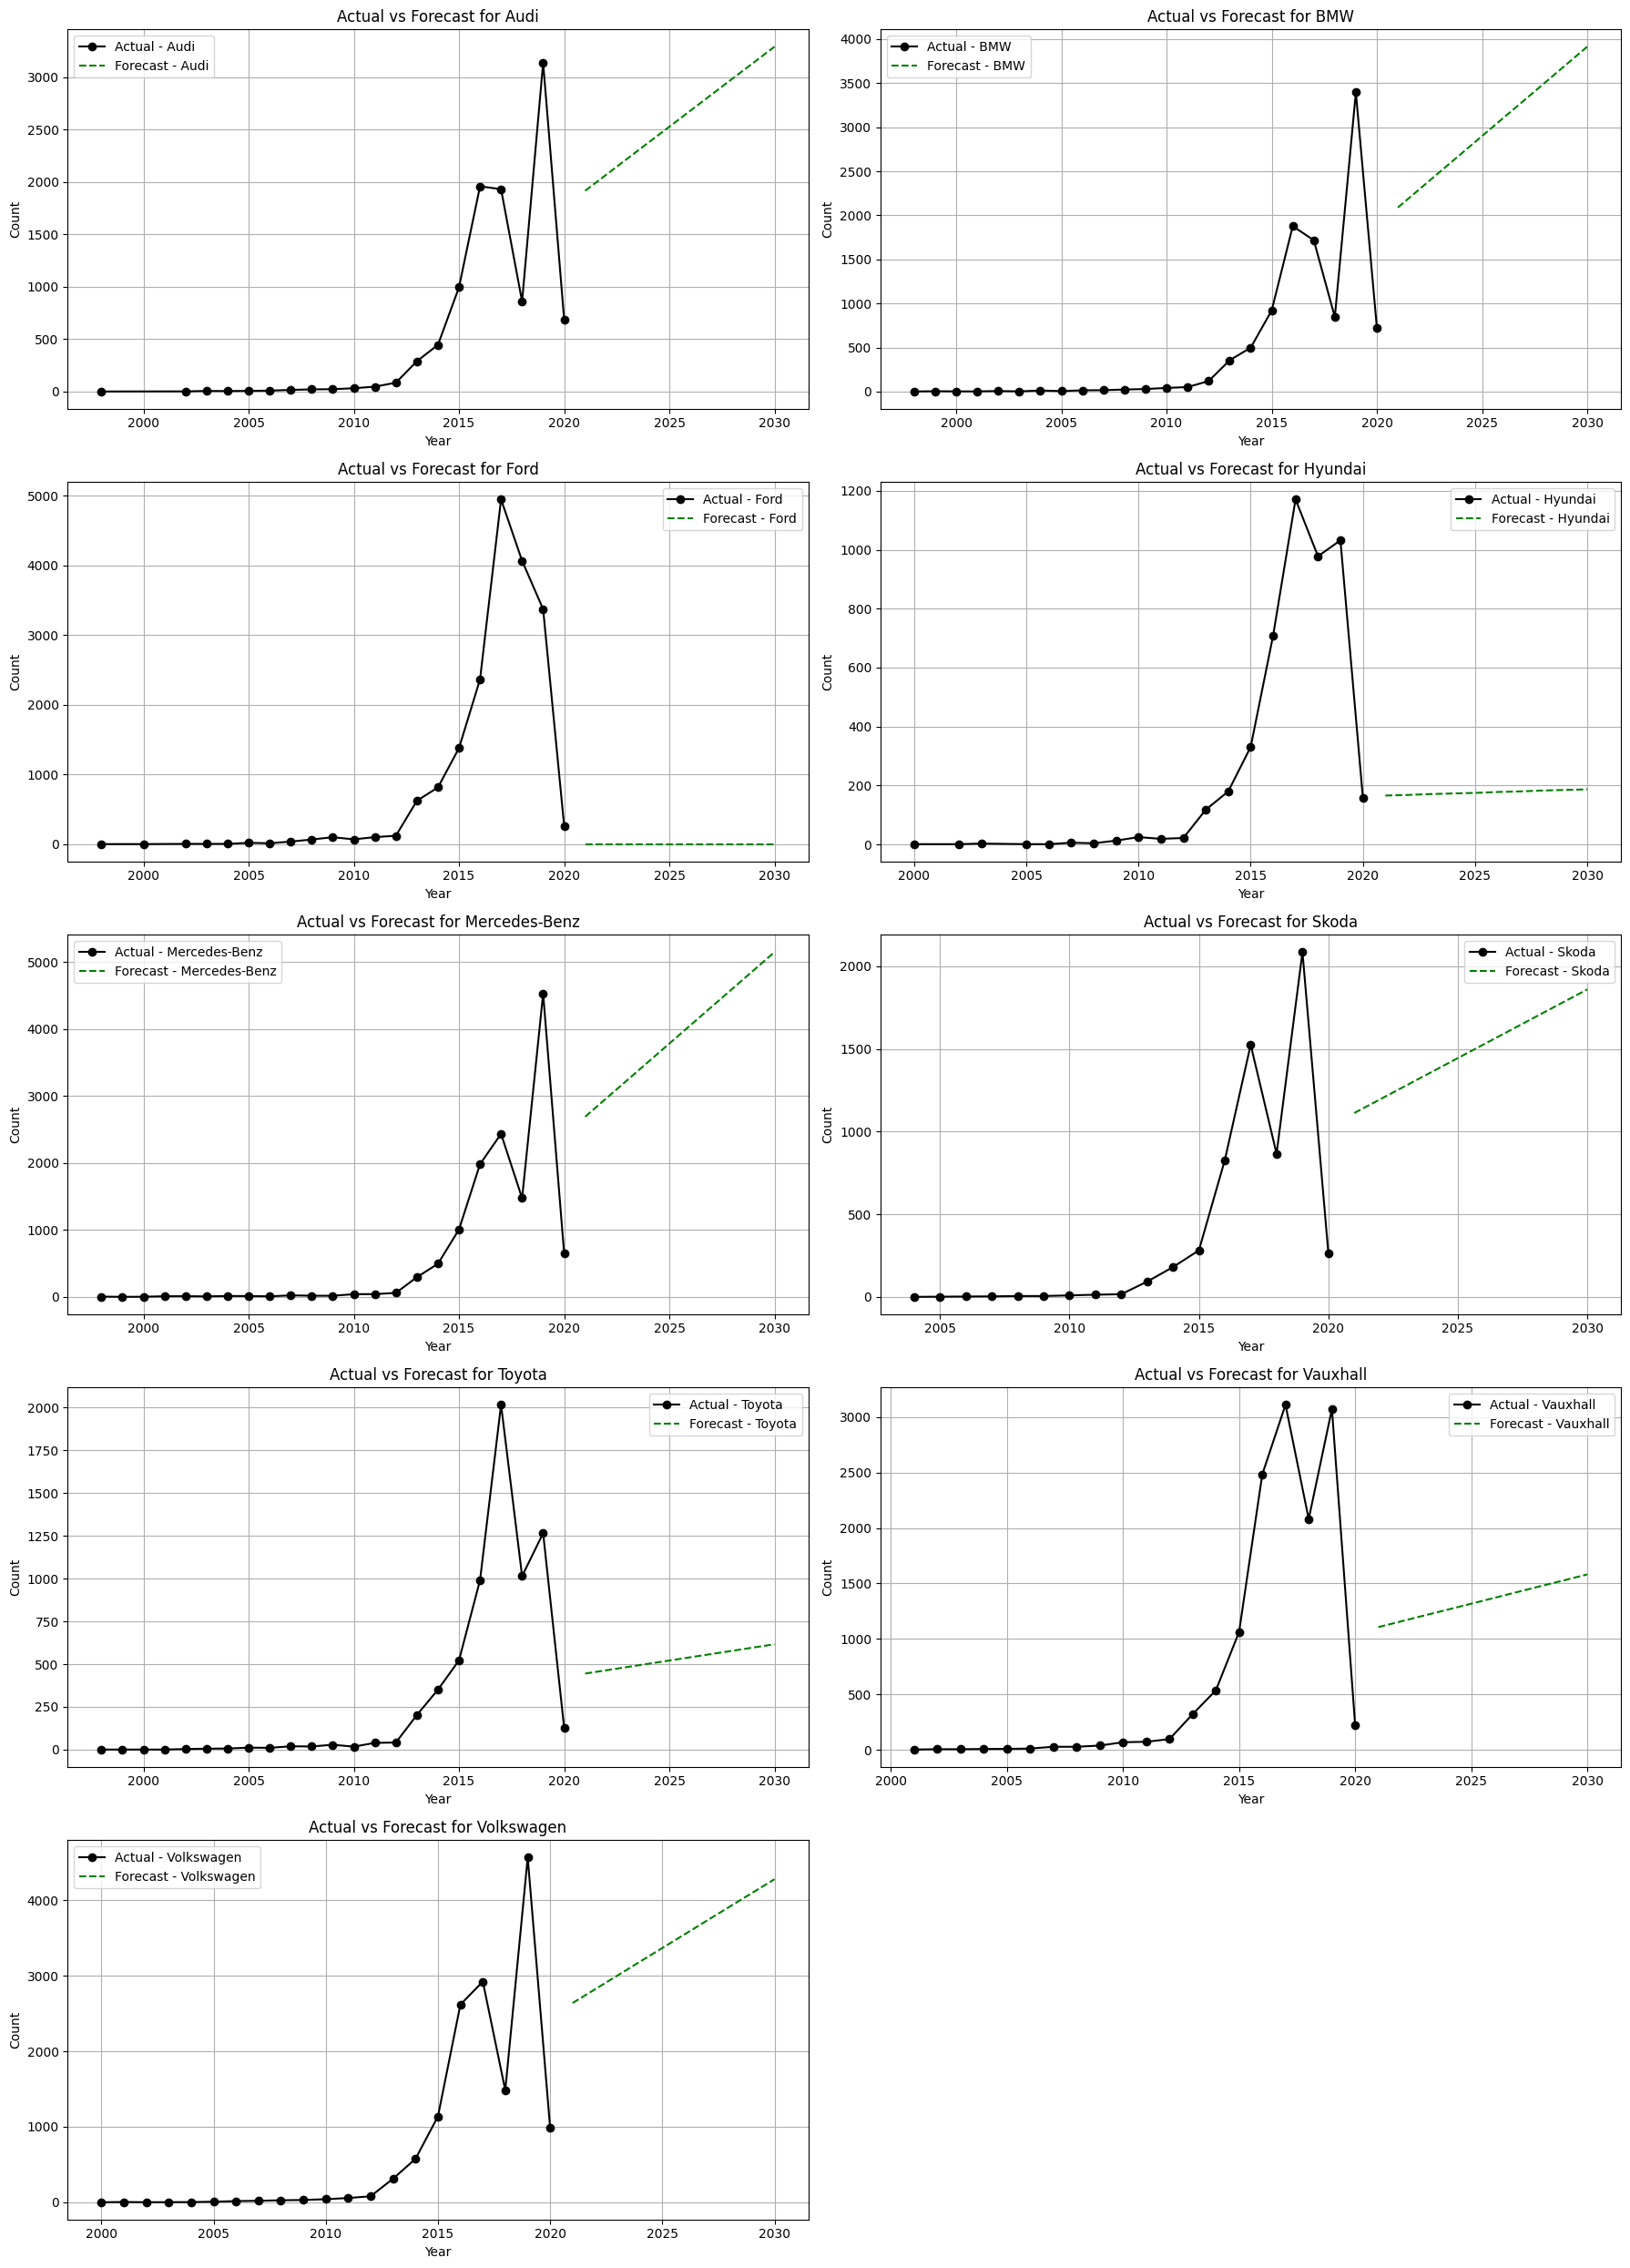

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
data = pd.read_csv('Complete_AutomobileData.csv')

# Aggregate data by brand and year
brand_trends = data.groupby(['brand', 'year']).size().reset_index(name='count')

# Initialize an empty DataFrame to store the forecasts
forecast_df = pd.DataFrame()

# Forecast the next 10 years using Exponential Smoothing
for brand in brand_trends['brand'].unique():
    # Filter the data for the current brand
    brand_data = brand_trends[brand_trends['brand'] == brand].set_index('year')['count']

    # Apply Exponential Smoothing model
    model_expsmooth = ExponentialSmoothing(brand_data, trend='add', seasonal=None)
    model_expsmooth_fit = model_expsmooth.fit()
    forecast_expsmooth = model_expsmooth_fit.forecast(steps=10)

    # Apply constraint to ensure no negative forecasts and convert to integers
    forecast_expsmooth = np.round(forecast_expsmooth).astype(int)
    forecast_expsmooth[forecast_expsmooth < 0] = 0

    # Combine forecasts
    forecast_index = pd.Series(range(brand_data.index[-1] + 1, brand_data.index[-1] + 11))
    forecast_data = pd.DataFrame({
        'brand': brand,
        'year': forecast_index,
        'Exponential Smoothing': forecast_expsmooth.values
    })

    # Append the forecasted data to the forecast_df
    forecast_df = pd.concat([forecast_df, forecast_data], axis=0)

# Reset index for the final DataFrame
forecast_df.reset_index(drop=True, inplace=True)

# Display the first few rows of the rounded forecast data as integers
print(forecast_df.head())

# Plotting the actual vs forecasted values, with 2 brands per row
brands = forecast_df['brand'].unique()
n_brands = len(brands)
n_rows = np.ceil(n_brands / 2).astype(int)

plt.figure(figsize=(18, 5 * n_rows))

# Plot each brand's forecasts
for i, brand in enumerate(brands, 1):
    plt.subplot(n_rows, 2, i)

    # Extract actual data and forecasted data
    brand_actual = brand_trends[brand_trends['brand'] == brand].set_index('year')['count']
    brand_forecast_expsmooth = forecast_df[forecast_df['brand'] == brand].set_index('year')['Exponential Smoothing']

    # Plot the actual values
    plt.plot(brand_actual.index, brand_actual, label=f'Actual - {brand}', marker='o', color='black')

    # Plot the Exponential Smoothing forecasted values
    plt.plot(brand_forecast_expsmooth.index, brand_forecast_expsmooth, linestyle='--', label=f'Forecast - {brand}', color='green')

    # Set title and labels
    plt.title(f'Actual vs Forecast for {brand}')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
forecast_df

brand  year  Exponential Smoothing
0         Audi  2021                   11.8
1         Audi  2022                   11.9
2         Audi  2023                   12.0
3         Audi  2024                   12.1
4         Audi  2025                   12.3
..         ...   ...                    ...
85  Volkswagen  2026                   18.9
86  Volkswagen  2027                   19.2
87  Volkswagen  2028                   19.6
88  Volkswagen  2029                   20.0
89  Volkswagen  2030                   20.4

[90 rows x 3 columns]

SEGMNET TRENDS

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
from contextlib import contextmanager

@contextmanager
def ignore_warnings():
    """
    A context manager to suppress warnings temporarily.
    Usage:
        with ignore_warnings():
            # code that generates warnings
    """
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

# Function to check stationarity and apply differencing if needed
def make_stationary(series):
    result = adfuller(series)
    diff_count = 0
    while result[1] > 0.05:  # p-value > 0.05 indicates non-stationarity
        series = series.diff().dropna()
        diff_count += 1
        result = adfuller(series)
    return series, diff_count

# Function to perform grid search for the best (p, q) based on AIC
def find_best_arima_order(series, max_p=3, max_q=3):
    best_aic = np.inf
    best_order = None

    # Loop over combinations of p and q values
    for p, q in itertools.product(range(max_p + 1), range(max_q + 1)):
        try:
            with ignore_warnings():
                model = ARIMA(series, order=(p, 0, q))  # d=0 because we already made the series stationary
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, q)
        except:
            continue

    return best_order, best_aic

# Load the data
data = pd.read_csv('Complete_AutomobileData.csv')

# Aggregate data by segment and year
segment_trends = data.groupby(['segment', 'year']).size().reset_index(name='count')

# Store best p, d, q for each segment
best_orders = []

for segment in segment_trends['segment'].unique():
    segment_data = segment_trends[segment_trends['segment'] == segment].set_index('year')['count']

    # Make the series stationary and get the number of differencing steps
    stationary_series, diff_count = make_stationary(segment_data)

    # Find the best p, q order using the stationary series
    best_pq_order, best_aic = find_best_arima_order(stationary_series, max_p=5, max_q=5)

    # Append the best p, d, q order and AIC to the list
    best_orders.append({
        'segment': segment,
        'best_order': (best_pq_order[0], diff_count, best_pq_order[1]),
        'best_aic': best_aic
    })

# Convert best orders to a DataFrame
best_orders_df = pd.DataFrame(best_orders)

# Display the best p, d, q orders for each segment
print(best_orders_df)


    segment best_order    best_aic
0   Compact  (1, 3, 1)  387.329542
1  Electric  (0, 1, 2)  148.948385
2    Hybrid  (5, 0, 0)   68.353831
3    Luxury  (4, 4, 0)   12.000000
4  Mid-size  (0, 3, 1)  135.840511
5    Pickup  (3, 5, 0)   44.035861
6       SUV  (2, 2, 1)  195.740910
7    Sports  (1, 0, 0)  262.040806
8       Van  (0, 1, 1)  148.323010


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

    segment    ARIMA_MSE   ARIMA_RMSE  Exponential_Smoothing_MSE  \
0   Compact  59415872.80  7708.169225               3.358551e+07   
1  Electric      9657.00    98.270036               3.321067e+04   
2    Hybrid     95225.00   308.585482               5.794000e+04   
3    Luxury  26061221.00  5105.019197               4.547264e+06   
4  Mid-size     23376.75   152.894572               3.629100e+04   
5    Pickup     71876.50   268.097930               8.077000e+03   
6       SUV   6615751.20  2572.110262               6.782310e+06   
7    Sports      5732.40    75.712615               2.241438e+05   
8       Van     31622.00   177.825757               3.045133e+04   

   Exponential_Smoothing_RMSE  
0                 5795.300337  
1                  182.237940  
2                  240.707291  
3                 2132.431382  
4                  190.501968  
5                   89.872131  
6                 2604.286889  
7                  473.438275  
8                  174.503104  

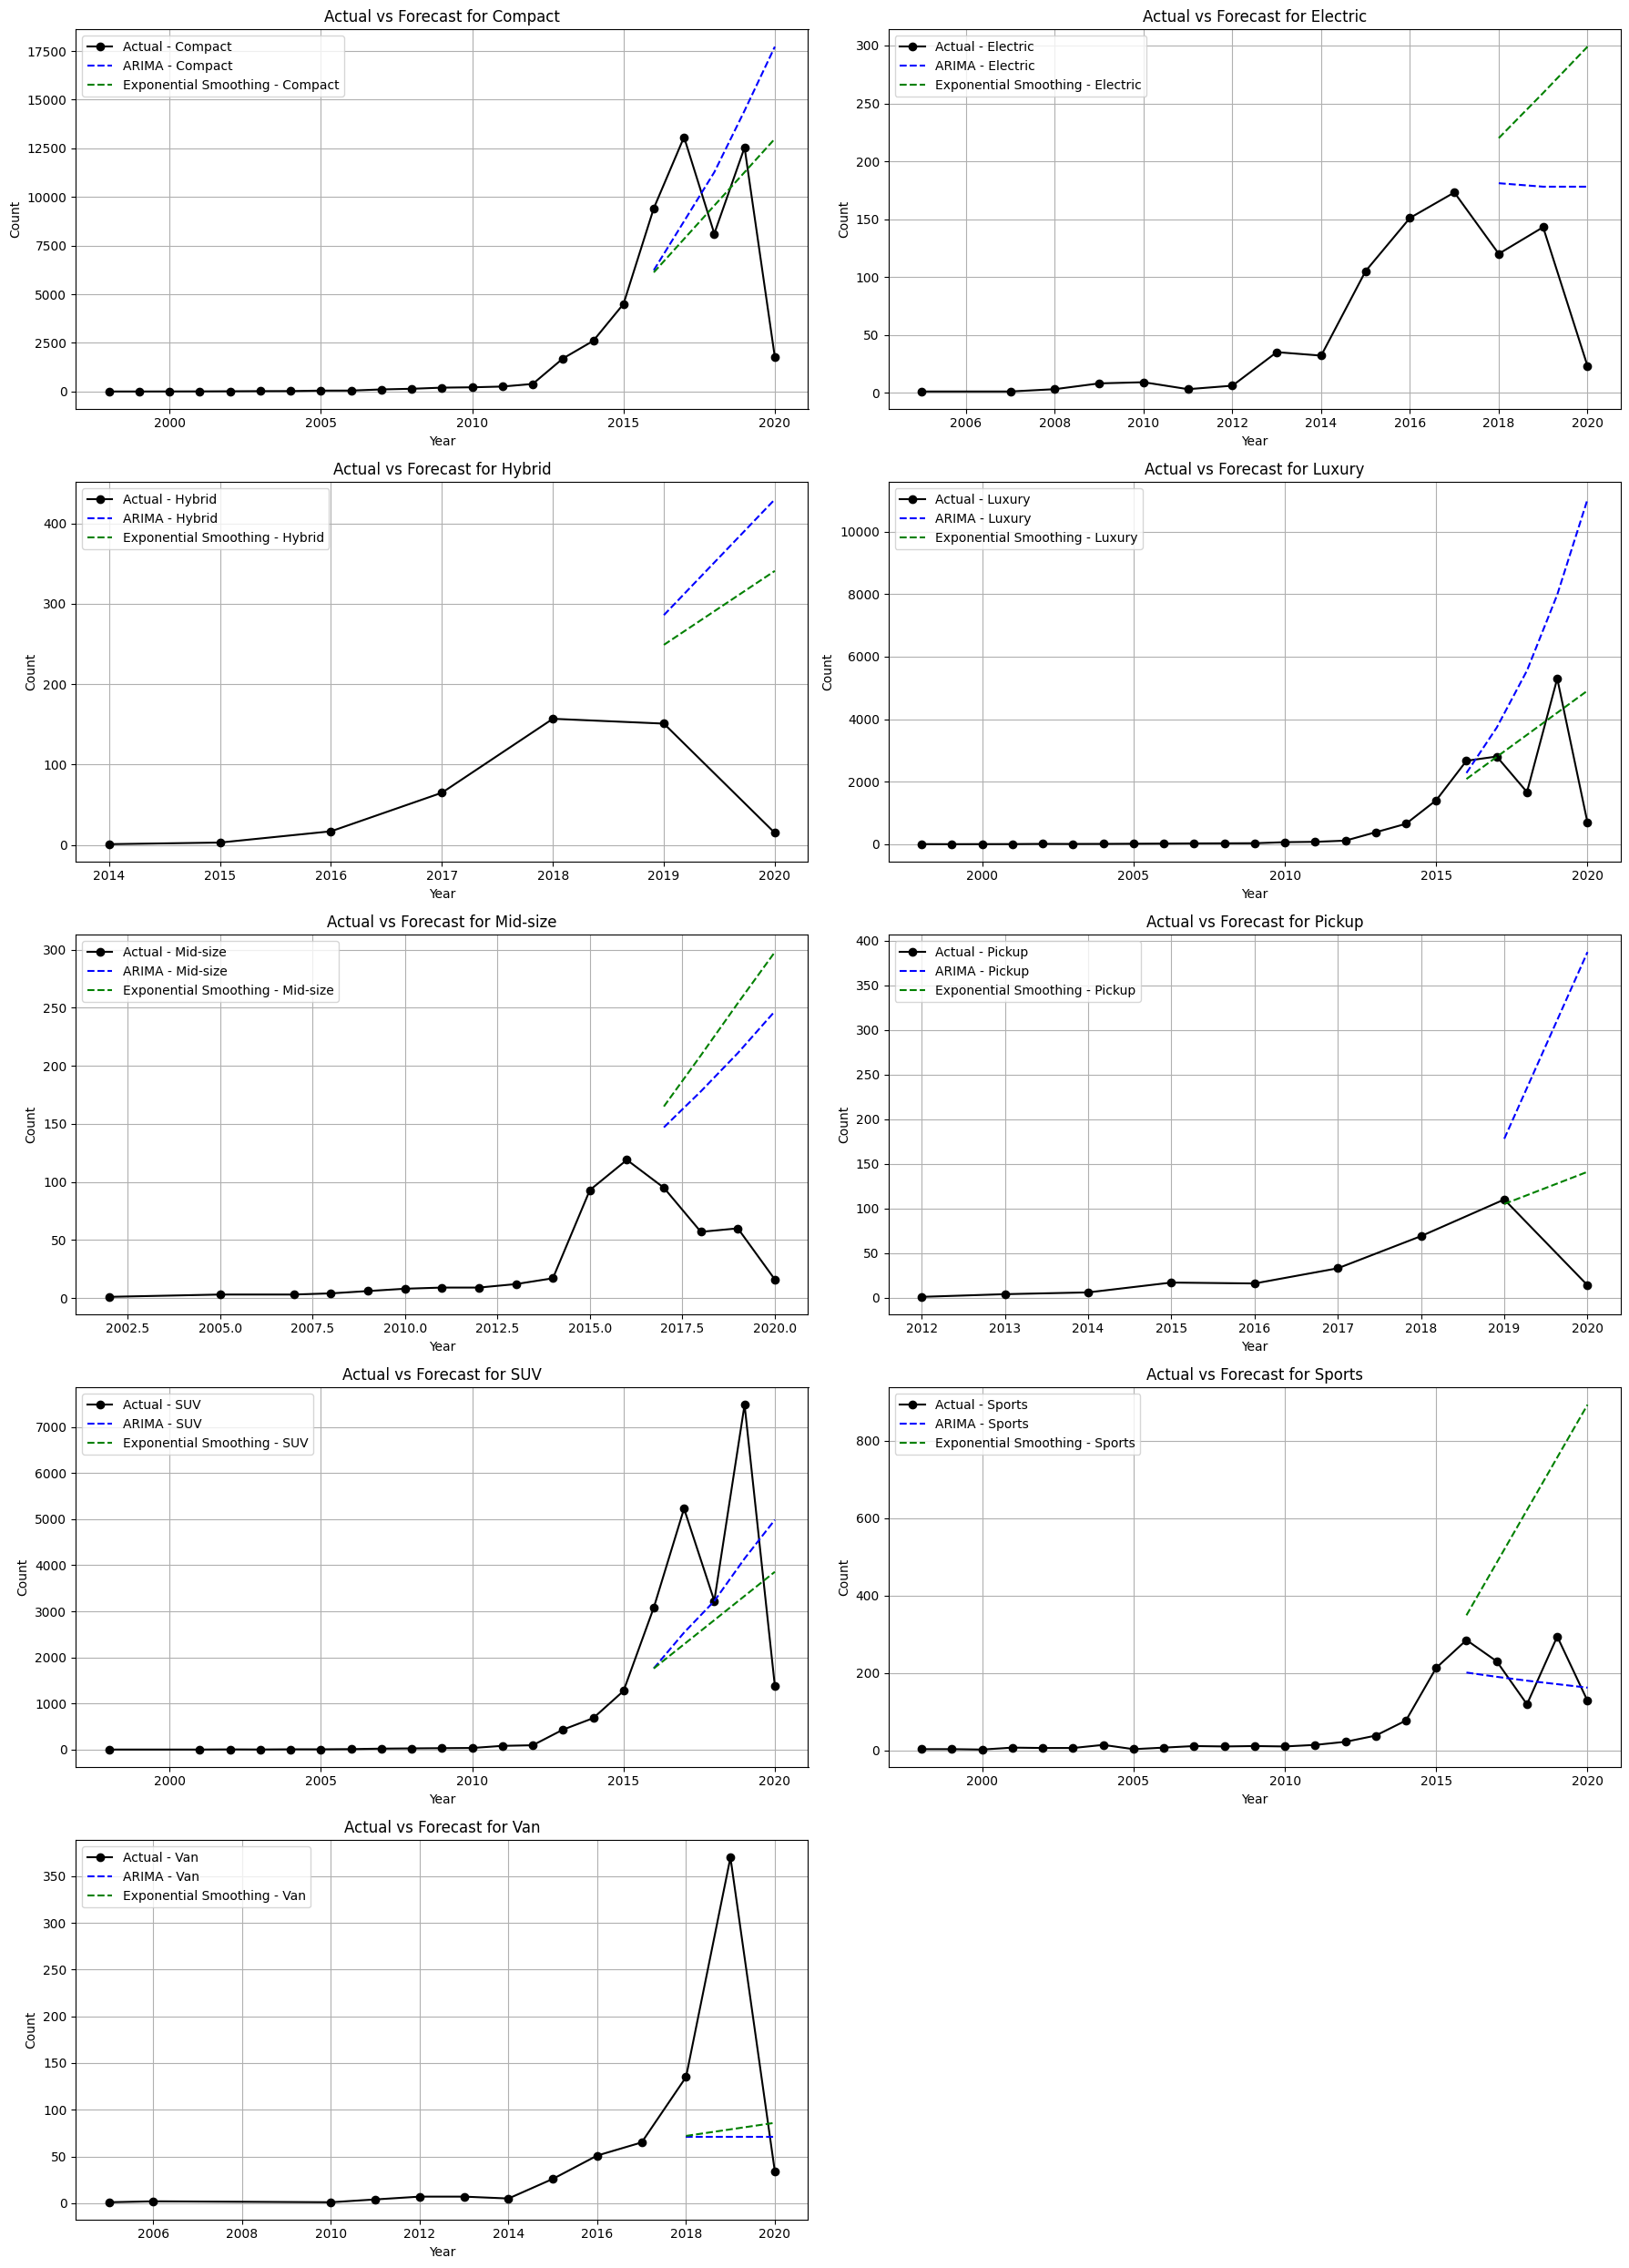

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the data
data = pd.read_csv('Complete_AutomobileData.csv')

#forecasting on test data to find best model
# Aggregate data by segment and year
segment_trends = data.groupby(['segment', 'year']).size().reset_index(name='count')

# Best orders DataFrame (from your analysis)
best_orders_df = pd.DataFrame({
    'segment': ['Compact', 'Electric', 'Hybrid', 'Luxury', 'Mid-size', 'Pickup', 'SUV', 'Sports', 'Van'],
    'best_order': [(1, 3, 1), (0, 1, 2), (5, 0, 0), (4, 4, 0), (0, 3, 1), (3, 5, 0), (2, 2, 1), (1, 0, 0), (0, 1, 1)]
})

# Initialize an empty DataFrame to store the forecasts from all models
forecast_df_segment = pd.DataFrame()

# Initialize a list to store MSE and RMSE results
mse_results_segment = []

# Forecast using ARIMA and Exponential Smoothing, and calculate MSE and RMSE
for i, row in best_orders_df.iterrows():
    segment = row['segment']
    p, d, q = row['best_order']

    # Filter the data for the current segment
    segment_data = segment_trends[segment_trends['segment'] == segment].set_index('year')['count']

    # Split the data into train and test sets
    train_size = int(len(segment_data) * 0.8)
    train_data, test_data = segment_data.iloc[:train_size], segment_data.iloc[train_size:]

    # Apply ARIMA model using the best p, d, q values
    model_arima = ARIMA(train_data, order=(p, d, q))
    model_arima_fit = model_arima.fit()
    forecast_arima = model_arima_fit.forecast(steps=len(test_data))

    # Round the forecasts to whole numbers and set any negative values to zero
    forecast_arima = np.round(forecast_arima).astype(int)
    forecast_arima[forecast_arima < 0] = 0

    # Apply Exponential Smoothing model
    model_expsmooth = ExponentialSmoothing(train_data, trend='add', seasonal=None)
    model_expsmooth_fit = model_expsmooth.fit()
    forecast_expsmooth = model_expsmooth_fit.forecast(steps=len(test_data))

    # Round the forecasts to whole numbers and set any negative values to zero
    forecast_expsmooth = np.round(forecast_expsmooth).astype(int)
    forecast_expsmooth[forecast_expsmooth < 0] = 0

    # Calculate MSE and RMSE for each model based on the test data
    mse_arima = mean_squared_error(test_data, forecast_arima)
    rmse_arima = sqrt(mse_arima)
    mse_expsmooth = mean_squared_error(test_data, forecast_expsmooth)
    rmse_expsmooth = sqrt(mse_expsmooth)

    # Store the MSE and RMSE results
    mse_results_segment.append({
        'segment': segment,
        'ARIMA_MSE': mse_arima,
        'ARIMA_RMSE': rmse_arima,
        'Exponential_Smoothing_MSE': mse_expsmooth,
        'Exponential_Smoothing_RMSE': rmse_expsmooth
    })

    # Combine forecasts for final visualization (if needed)
    forecast_index = pd.Series(test_data.index)
    forecast_data_segment = pd.DataFrame({
        'segment': segment,
        'year': forecast_index,
        'ARIMA': forecast_arima.values,
        'Exponential Smoothing': forecast_expsmooth.values
    })

    # Append the forecasted data to the forecast_df_segment
    forecast_df_segment = pd.concat([forecast_df_segment, forecast_data_segment], axis=0)

# Convert MSE results to a DataFrame
mse_results_segment_df = pd.DataFrame(mse_results_segment)

# Reset index for the final DataFrame
forecast_df_segment.reset_index(drop=True, inplace=True)

# Display the MSE and RMSE results and first few rows of the forecast data
print(mse_results_segment_df)
print(forecast_df_segment.head())

# Plotting the actual vs forecasted values on test data, with 2 segments per row
segments = forecast_df_segment['segment'].unique()
n_segments = len(segments)
n_rows = np.ceil(n_segments / 2).astype(int)

plt.figure(figsize=(18, 5 * n_rows))

# Plot each segment's forecasts
for i, segment in enumerate(segments, 1):
    plt.subplot(n_rows, 2, i)

    # Extract actual data and forecasted data
    segment_actual = segment_trends[segment_trends['segment'] == segment].set_index('year')['count']
    segment_forecast_arima = forecast_df_segment[(forecast_df_segment['segment'] == segment) & forecast_df_segment['ARIMA'].notnull()].set_index('year')['ARIMA']
    segment_forecast_expsmooth = forecast_df_segment[(forecast_df_segment['segment'] == segment) & forecast_df_segment['Exponential Smoothing'].notnull()].set_index('year')['Exponential Smoothing']

    # Plot the actual values
    plt.plot(segment_actual.index, segment_actual, label=f'Actual - {segment}', marker='o', color='black')

    # Plot the ARIMA forecasted values
    plt.plot(segment_forecast_arima.index, segment_forecast_arima, linestyle='--', label=f'ARIMA - {segment}', color='blue')

    # Plot the Exponential Smoothing forecasted values
    plt.plot(segment_forecast_expsmooth.index, segment_forecast_expsmooth, linestyle='--', label=f'Exponential Smoothing - {segment}', color='green')

    # Set title and labels
    plt.title(f'Actual vs Forecast for {segment}')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

   segment  year  forecast
0  Compact  2021      44.6
1  Compact  2022      41.0
2  Compact  2023      37.4
3  Compact  2024      33.7
4  Compact  2025      30.1


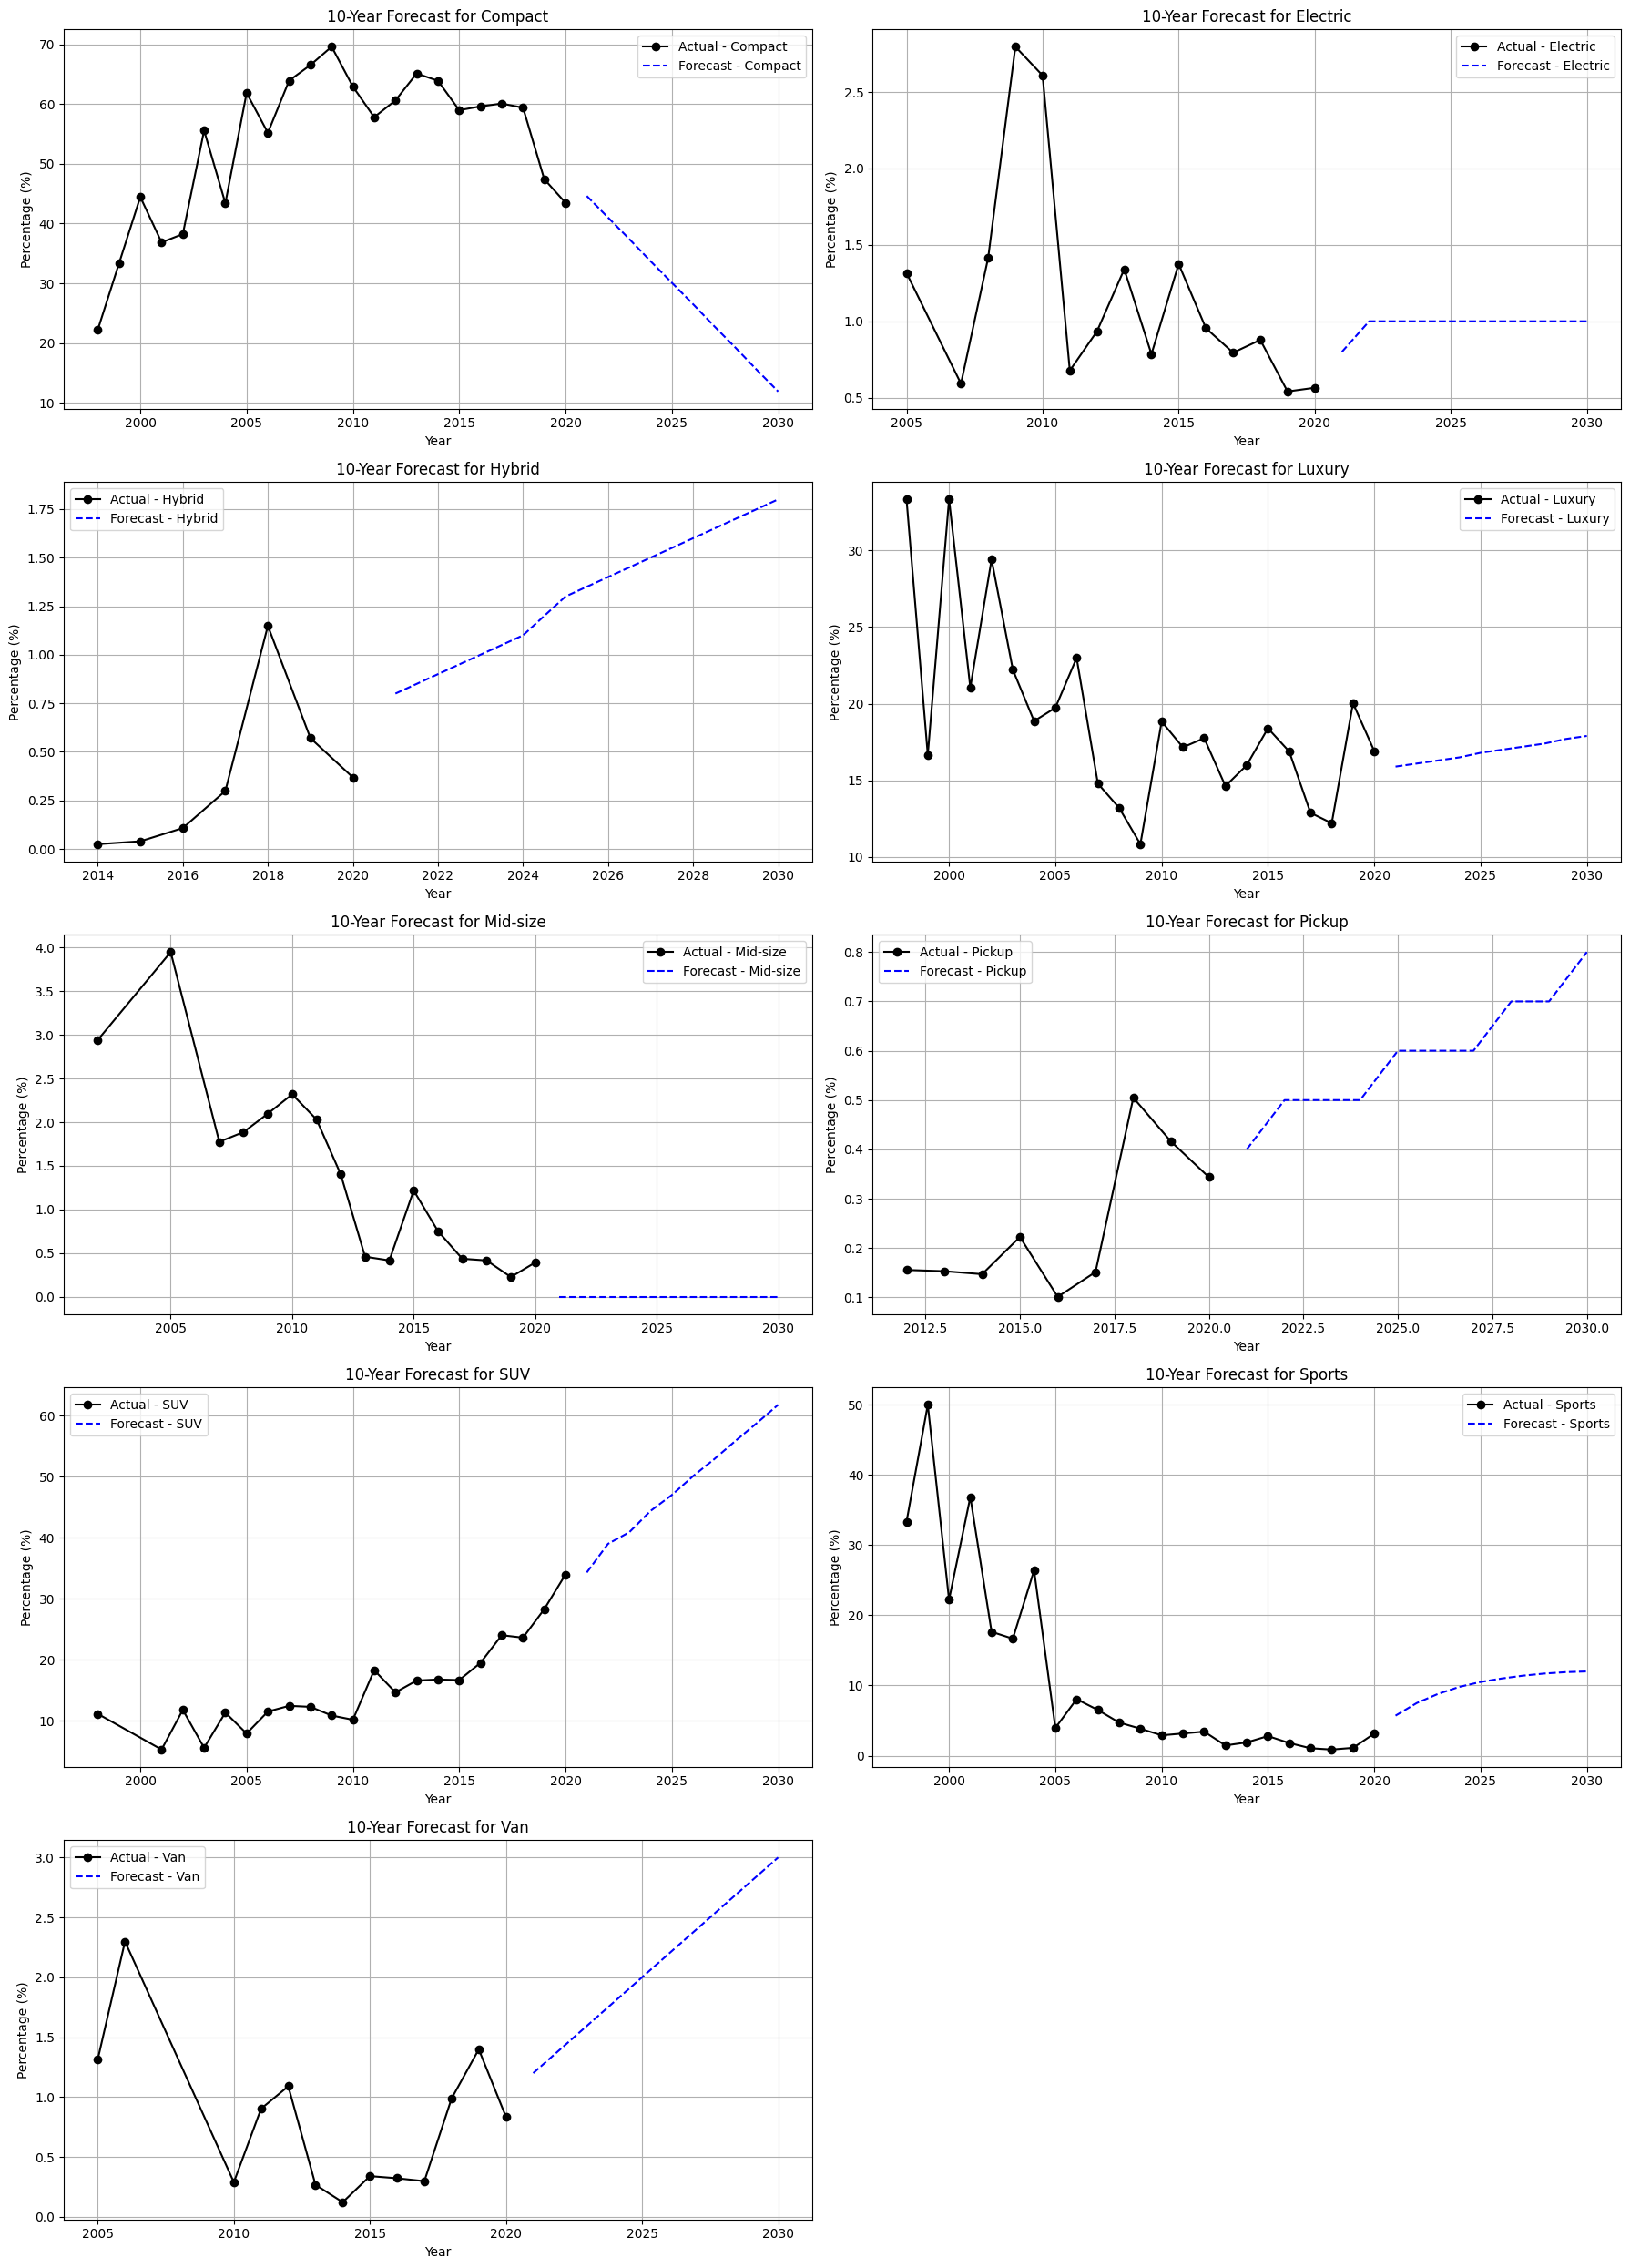

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
data = pd.read_csv('Complete_AutomobileData.csv')

# Aggregate data by segment and year
segment_trends = data.groupby(['segment', 'year']).size().reset_index(name='count')

# Convert counts to percentages of the total count per year
total_counts_per_year = segment_trends.groupby('year')['count'].sum()
segment_trends['percentage'] = segment_trends.apply(lambda row: (row['count'] / total_counts_per_year[row['year']]) * 100, axis=1)

# Best orders DataFrame (from your analysis)
best_orders_df = pd.DataFrame({
    'segment': ['Compact', 'Electric', 'Hybrid', 'Luxury', 'Mid-size', 'Pickup', 'SUV', 'Sports', 'Van'],
    'best_order': [(1, 3, 1), (0, 1, 2), (5, 0, 0), (4, 4, 0), (0, 3, 1), (3, 5, 0), (2, 2, 1), (1, 0, 0), (0, 1, 1)],
    'best_model': ['Exponential Smoothing', 'ARIMA', 'Exponential Smoothing', 'Exponential Smoothing', 'Exponential Smoothing', 'Exponential Smoothing', 'ARIMA', 'ARIMA', 'Exponential Smoothing']
})

# Initialize an empty DataFrame to store the forecasts for the next 10 years
forecast_10y_df_segment = pd.DataFrame()

# Forecast the next 10 years using the best model for each segment
for i, row in best_orders_df.iterrows():
    segment = row['segment']
    p, d, q = row['best_order']
    best_model = row['best_model']

    # Filter the data for the current segment
    segment_data = segment_trends[segment_trends['segment'] == segment].set_index('year')['percentage']

    # Apply the best model for the 10-year forecast
    if best_model == 'ARIMA':
        model = ARIMA(segment_data, order=(p, d, q))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=10)
    else:  # Exponential Smoothing
        model = ExponentialSmoothing(segment_data, trend='add', seasonal=None)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=10)

    # Ensure no negative forecasts and round to one decimal place
    forecast = np.round(forecast, 1)
    forecast[forecast < 0] = 0

    # Create a DataFrame to store the forecasted values
    forecast_index = pd.Series(range(segment_data.index[-1] + 1, segment_data.index[-1] + 11))
    forecast_data_segment = pd.DataFrame({
        'segment': segment,
        'year': forecast_index,
        'forecast': forecast.values
    })

    # Append the forecasted data to the forecast_10y_df_segment
    forecast_10y_df_segment = pd.concat([forecast_10y_df_segment, forecast_data_segment], axis=0)

# Reset index for the final DataFrame
forecast_10y_df_segment.reset_index(drop=True, inplace=True)

# Display the first few rows of the 10-year forecast data
print(forecast_10y_df_segment.head())

# Plotting the forecasts for the next 10 years, with 2 segments per row
segments = forecast_10y_df_segment['segment'].unique()
n_segments = len(segments)
n_rows = np.ceil(n_segments / 2).astype(int)

plt.figure(figsize=(18, 5 * n_rows))

# Plot each segment's 10-year forecasts
for i, segment in enumerate(segments, 1):
    plt.subplot(n_rows, 2, i)

    # Extract historical data and forecasted data
    segment_actual = segment_trends[segment_trends['segment'] == segment].set_index('year')['percentage']
    segment_forecast = forecast_10y_df_segment[forecast_10y_df_segment['segment'] == segment].set_index('year')['forecast']

    # Plot the actual historical values
    plt.plot(segment_actual.index, segment_actual, label=f'Actual - {segment}', marker='o', color='black')

    # Plot the 10-year forecasted values
    plt.plot(segment_forecast.index, segment_forecast, linestyle='--', label=f'Forecast - {segment}', color='blue')

    # Set title and labels
    plt.title(f'10-Year Forecast for {segment}')
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided a

   segment  year  forecast
0  Compact  2021      4810
1  Compact  2022      4820
2  Compact  2023      4829
3  Compact  2024      4839
4  Compact  2025      4849


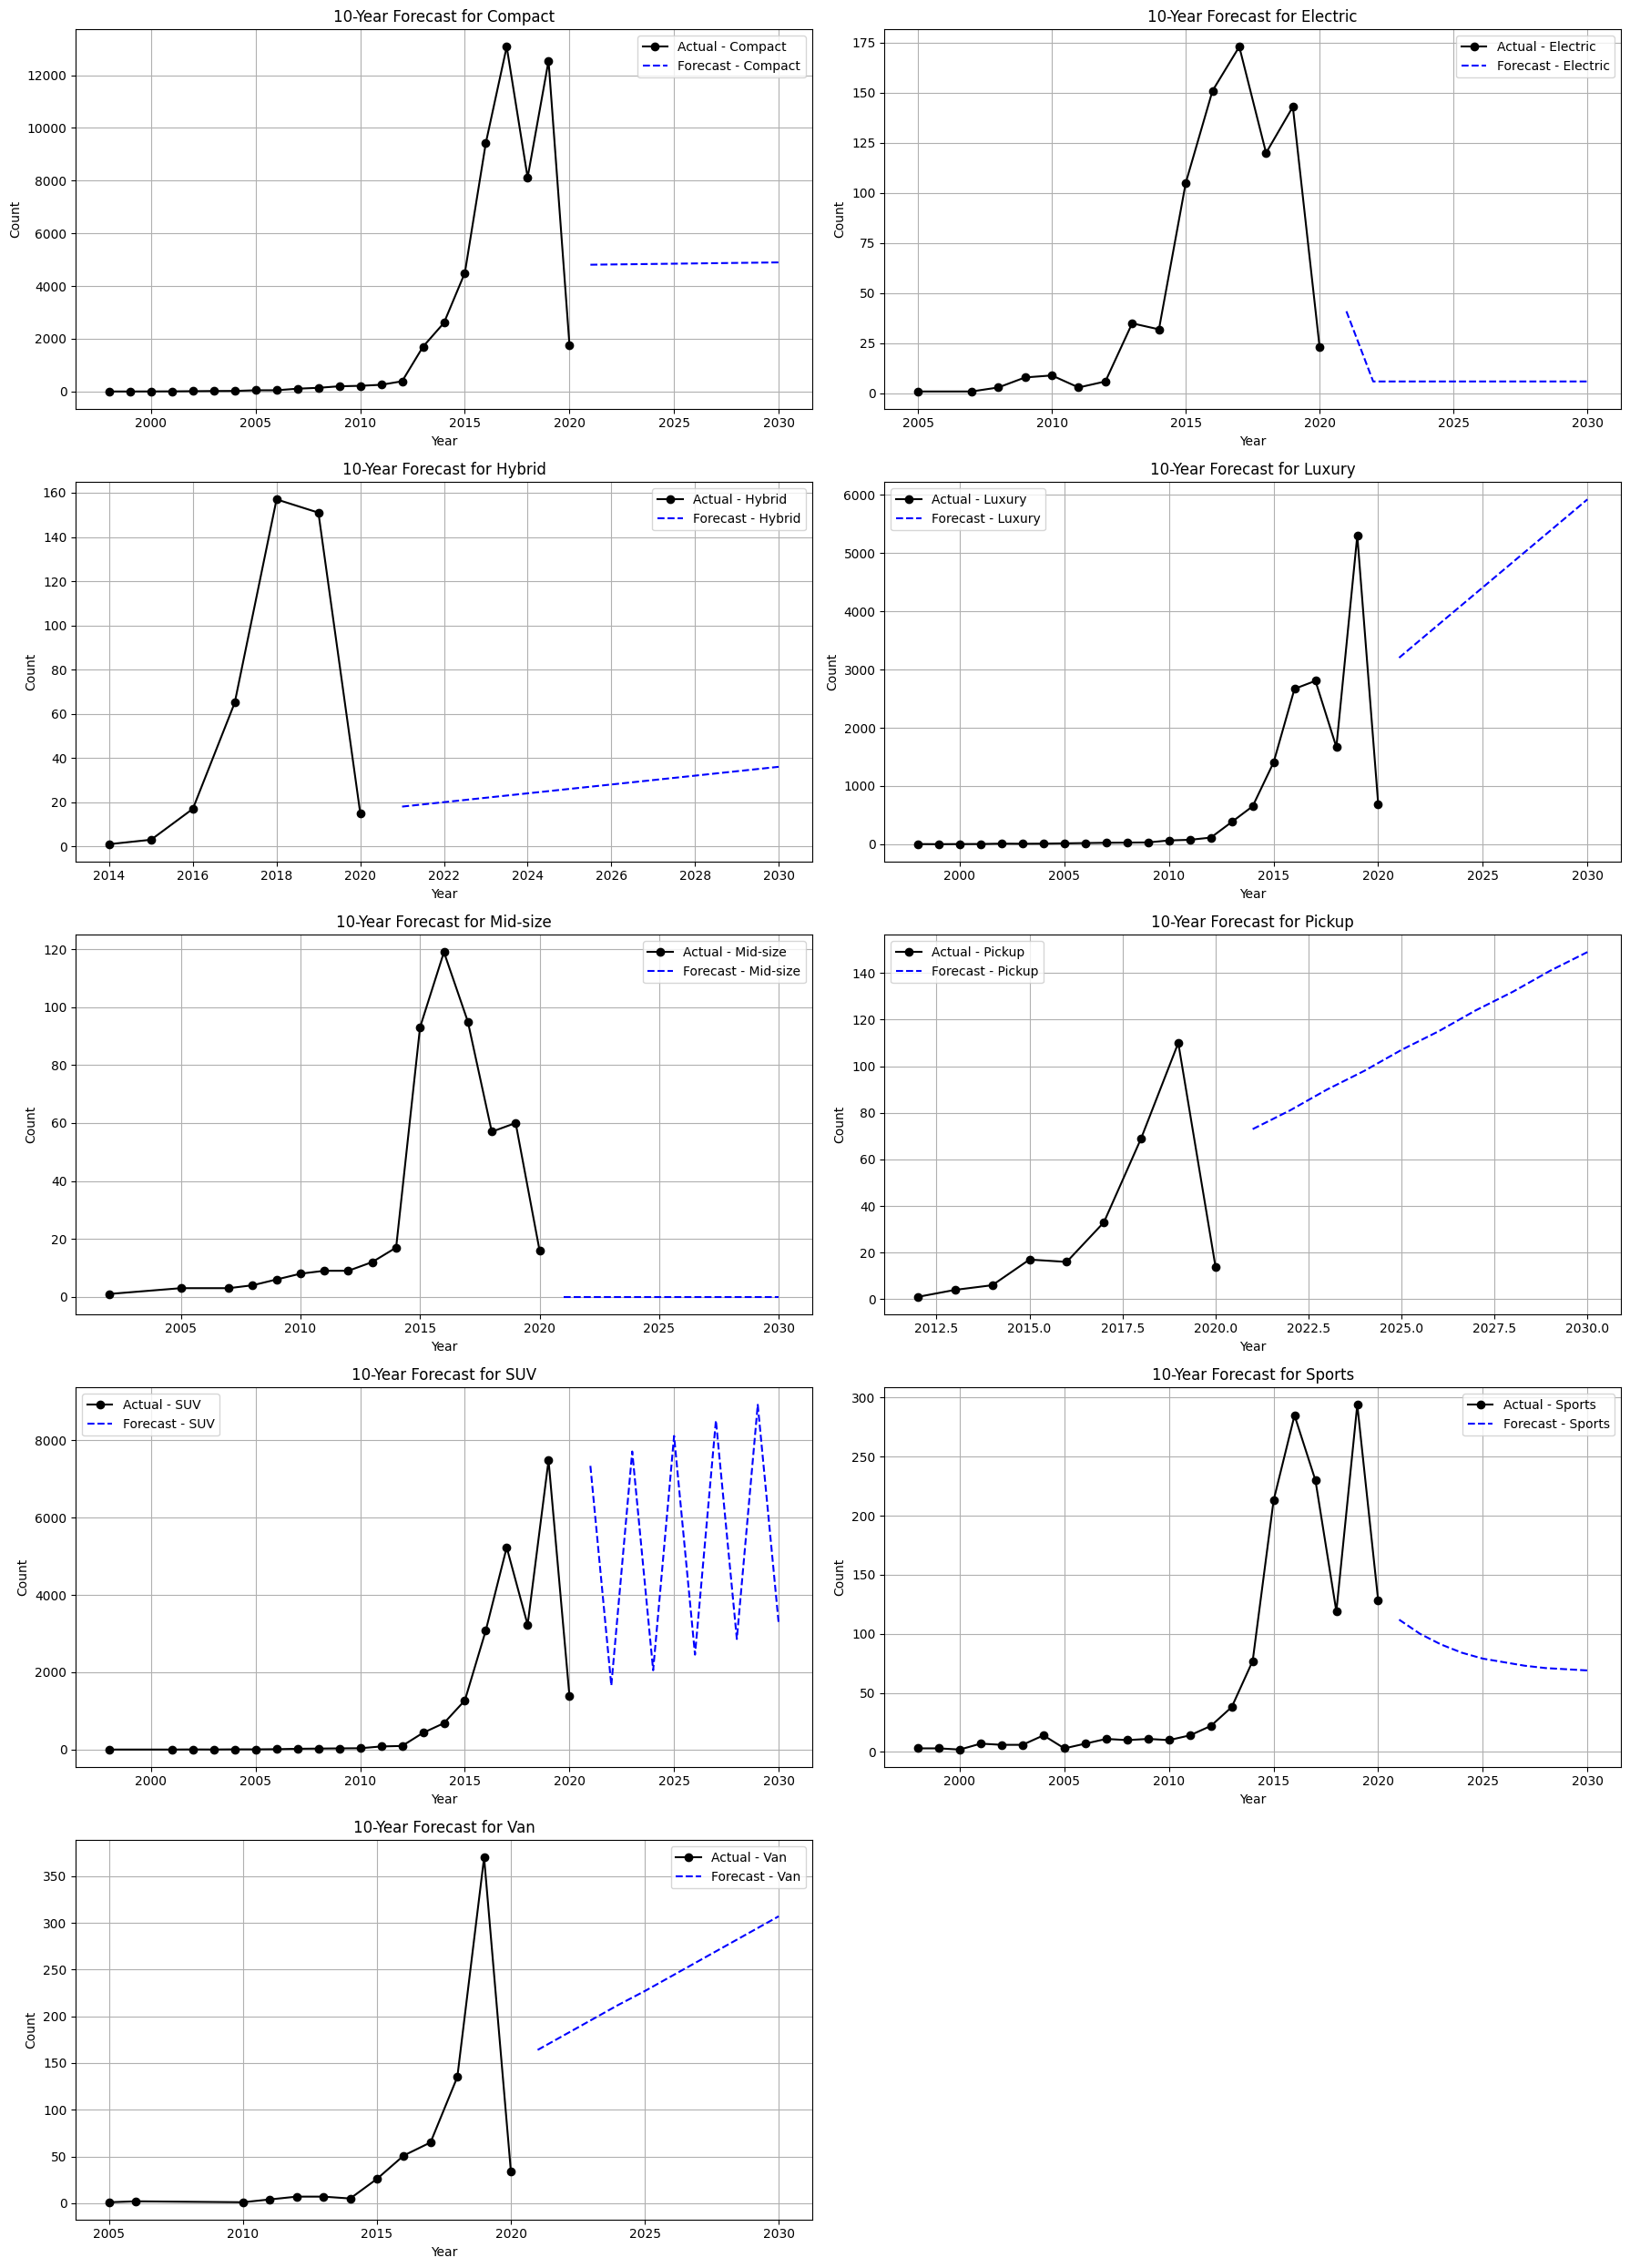

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
data = pd.read_csv('Complete_AutomobileData.csv')

# Aggregate data by segment and year
segment_trends = data.groupby(['segment', 'year']).size().reset_index(name='count')

#forecasting segment 10 years
# Best orders DataFrame (from your analysis)
best_orders_df = pd.DataFrame({
    'segment': ['Compact', 'Electric', 'Hybrid', 'Luxury', 'Mid-size', 'Pickup', 'SUV', 'Sports', 'Van'],
    'best_order': [(1, 3, 1), (0, 1, 2), (5, 0, 0), (4, 4, 0), (0, 3, 1), (3, 5, 0), (2, 2, 1), (1, 0, 0), (0, 1, 1)],
    'best_model': ['Exponential Smoothing', 'ARIMA', 'Exponential Smoothing', 'Exponential Smoothing', 'Exponential Smoothing', 'Exponential Smoothing', 'ARIMA', 'ARIMA', 'Exponential Smoothing']
})

# Initialize an empty DataFrame to store the forecasts for the next 10 years
forecast_10y_df_segment = pd.DataFrame()

# Forecast the next 10 years using the best model for each segment
for i, row in best_orders_df.iterrows():
    segment = row['segment']
    p, d, q = row['best_order']
    best_model = row['best_model']

    # Filter the data for the current segment
    segment_data = segment_trends[segment_trends['segment'] == segment].set_index('year')['count']

    # Apply the best model for the 10-year forecast
    if best_model == 'ARIMA':
        model = ARIMA(segment_data, order=(p, d, q))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=10)
    else:  # Exponential Smoothing
        model = ExponentialSmoothing(segment_data, trend='add', seasonal=None)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=10)

    # Round the forecasts to whole numbers and set any negative values to zero
    forecast = np.round(forecast).astype(int)
    forecast[forecast < 0] = 0

    # Create a DataFrame to store the forecasted values
    forecast_index = pd.Series(range(segment_data.index[-1] + 1, segment_data.index[-1] + 11))
    forecast_data_segment = pd.DataFrame({
        'segment': segment,
        'year': forecast_index,
        'forecast': forecast.values
    })

    # Append the forecasted data to the forecast_10y_df_segment
    forecast_10y_df_segment = pd.concat([forecast_10y_df_segment, forecast_data_segment], axis=0)

# Reset index for the final DataFrame
forecast_10y_df_segment.reset_index(drop=True, inplace=True)

# Display the first few rows of the 10-year forecast data
print(forecast_10y_df_segment.head())

# Plotting the forecasts for the next 10 years, with 2 segments per row
segments = forecast_10y_df_segment['segment'].unique()
n_segments = len(segments)
n_rows = np.ceil(n_segments / 2).astype(int)

plt.figure(figsize=(18, 5 * n_rows))

# Plot each segment's 10-year forecasts
for i, segment in enumerate(segments, 1):
    plt.subplot(n_rows, 2, i)

    # Extract historical data and forecasted data
    segment_actual = segment_trends[segment_trends['segment'] == segment].set_index('year')['count']
    segment_forecast = forecast_10y_df_segment[forecast_10y_df_segment['segment'] == segment].set_index('year')['forecast']

    # Plot the actual historical values
    plt.plot(segment_actual.index, segment_actual, label=f'Actual - {segment}', marker='o', color='black')

    # Plot the 10-year forecasted values
    plt.plot(segment_forecast.index, segment_forecast, linestyle='--', label=f'Forecast - {segment}', color='blue')

    # Set title and labels
    plt.title(f'10-Year Forecast for {segment}')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Display the first few rows of the 10-year forecast data
print(forecast_10y_df_segment)

    segment  year  forecast
0   Compact  2021      44.6
1   Compact  2022      41.0
2   Compact  2023      37.4
3   Compact  2024      33.7
4   Compact  2025      30.1
..      ...   ...       ...
85      Van  2026       2.2
86      Van  2027       2.4
87      Van  2028       2.6
88      Van  2029       2.8
89      Van  2030       3.0

[90 rows x 3 columns]


FUEL TRENDS

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
from contextlib import contextmanager

@contextmanager
def ignore_warnings():
    """
    A context manager to suppress warnings temporarily.
    Usage:
        with ignore_warnings():
            # code that generates warnings
    """
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

# Function to check stationarity and apply differencing if needed
def make_stationary(series):
    if len(series) < 10:  # Skip series that are too short
        print(f"Skipping series with length {len(series)} - too short for ADF test.")
        return series, 0

    result = adfuller(series)
    diff_count = 0
    while result[1] > 0.05:  # p-value > 0.05 indicates non-stationarity
        series = series.diff().dropna()
        diff_count += 1
        result = adfuller(series)
    return series, diff_count

# Function to perform grid search for the best (p, q) based on AIC
def find_best_arima_order(series, max_p=3, max_q=3):
    best_aic = np.inf
    best_order = None

    # Loop over combinations of p and q values
    for p, q in itertools.product(range(max_p + 1), range(max_q + 1)):
        try:
            with ignore_warnings():
                model = ARIMA(series, order=(p, 0, q))  # d=0 because we already made the series stationary
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, q)
        except:
            continue

    return best_order, best_aic

# Load the data
data = pd.read_csv('Complete_AutomobileData.csv')

# Aggregate data by fuel type and year
fuel_trends = data.groupby(['fuelType', 'year']).size().reset_index(name='count')
# Store best p, d, q for each fuel type
best_orders_fuel = []

for fuel in fuel_trends['fuelType'].unique():
    fuel_data = fuel_trends[fuel_trends['fuelType'] == fuel].set_index('year')['count']

    # Make the series stationary and get the number of differencing steps
    if len(fuel_data) >= 10:  # Proceed only if there are enough data points
        stationary_series, diff_count = make_stationary(fuel_data)

        # Find the best p, q order using the stationary series
        best_pq_order, best_aic = find_best_arima_order(stationary_series, max_p=5, max_q=5)

        # Append the best p, d, q order and AIC to the list
        best_orders_fuel.append({
            'fuelType': fuel,
            'best_order': (best_pq_order[0], diff_count, best_pq_order[1]),
            'best_aic': best_aic
        })
    else:
        print(f"Skipping fuel type {fuel} due to insufficient data.")

# Convert best orders to a DataFrame
best_orders_fuel_df = pd.DataFrame(best_orders_fuel)

# Display the best p, d, q orders for each fuel type
print(best_orders_fuel_df)



Skipping fuel type Electric due to insufficient data.
  fuelType best_order    best_aic
0   Diesel  (5, 4, 4)  128.059551
1   Hybrid  (5, 1, 0)   14.000000
2    Other  (1, 1, 0)   90.865478
3   Petrol  (4, 8, 1)   79.474332


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the data
data = pd.read_csv('Complete_AutomobileData.csv')

# Aggregate data by fuel type and year
fuel_trends = data.groupby(['fuelType', 'year']).size().reset_index(name='count')

# Best orders DataFrame (from your analysis)
best_orders_df = pd.DataFrame({
    'fuelType': ['Diesel', 'Hybrid', 'Other', 'Petrol','Electric'],
    'best_order': [(5, 4, 4), (5, 1, 0), (1, 1, 0), (4, 8, 1), (1,0,1)]
})

# Initialize an empty DataFrame to store the forecasts from all models
forecast_df_fuel = pd.DataFrame()

# Initialize a list to store MSE and RMSE results
mse_results_fuel = []

# Forecast using ARIMA and Exponential Smoothing, and calculate MSE and RMSE
for i, row in best_orders_df.iterrows():
    fuel = row['fuelType']
    p, d, q = row['best_order']

    # Filter the data for the current fuel type
    fuel_data = fuel_trends[fuel_trends['fuelType'] == fuel].set_index('year')['count']

    # Split the data into train and test sets
    train_size = int(len(fuel_data) * 0.8)
    train_data, test_data = fuel_data.iloc[:train_size], fuel_data.iloc[train_size:]

    try:
        # Apply ARIMA model using the best p, d, q values
        model_arima = ARIMA(train_data, order=(p, d, q))
        model_arima_fit = model_arima.fit()
        forecast_arima = model_arima_fit.forecast(steps=len(test_data))

        # Round the forecasts to whole numbers and set any negative values to zero
        forecast_arima = np.round(forecast_arima).astype(int)
        forecast_arima[forecast_arima < 0] = 0

    except (ValueError, np.linalg.LinAlgError) as e:
        print(f"Error fitting ARIMA model for {fuel}: {e}")
        forecast_arima = np.full(len(test_data), np.nan)  # Return NaNs for this fuel type

    # Apply Exponential Smoothing model
    model_expsmooth = ExponentialSmoothing(train_data, trend='add', seasonal=None)
    model_expsmooth_fit = model_expsmooth.fit()
    forecast_expsmooth = model_expsmooth_fit.forecast(steps=len(test_data))

    # Round the forecasts to whole numbers and set any negative values to zero
    forecast_expsmooth = np.round(forecast_expsmooth).astype(int)
    forecast_expsmooth[forecast_expsmooth < 0] = 0

    # Calculate MSE and RMSE for each model based on the test data
    if not np.isnan(forecast_arima).any() and len(forecast_arima) == len(test_data):
        mse_arima = mean_squared_error(test_data, forecast_arima)
        rmse_arima = sqrt(mse_arima)
    else:
        mse_arima = np.nan
        rmse_arima = np.nan

    mse_expsmooth = mean_squared_error(test_data, forecast_expsmooth)
    rmse_expsmooth = sqrt(mse_expsmooth)

    # Store the MSE and RMSE results
    mse_results_fuel.append({
        'fuelType': fuel,
        'ARIMA_MSE': mse_arima,
        'ARIMA_RMSE': rmse_arima,
        'Exponential_Smoothing_MSE': mse_expsmooth,
        'Exponential_Smoothing_RMSE': rmse_expsmooth
    })

    # Combine forecasts for final visualization (if needed)
    if len(forecast_arima) == len(test_data) and len(forecast_expsmooth) == len(test_data):
        forecast_index = pd.Series(test_data.index)
        forecast_data_fuel = pd.DataFrame({
            'fuelType': fuel,
            'year': forecast_index,
            'ARIMA': forecast_arima,
            'Exponential Smoothing': forecast_expsmooth
        })

        # Append the forecasted data to the forecast_df_fuel
        forecast_df_fuel = pd.concat([forecast_df_fuel, forecast_data_fuel], axis=0)

# Convert MSE results to a DataFrame
mse_results_fuel_df = pd.DataFrame(mse_results_fuel)

# Reset index for the final DataFrame
forecast_df_fuel.reset_index(drop=True, inplace=True)

# Display the MSE and RMSE results and first few rows of the forecast data
print(mse_results_fuel_df)




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No suppor

   fuelType     ARIMA_MSE    ARIMA_RMSE  Exponential_Smoothing_MSE  \
0    Diesel  9.453917e+07   9723.125495                 35020398.0   
1    Hybrid  2.112867e+05    459.659294                  1117297.0   
2     Other  1.098500e+03     33.143627                     1168.0   
3    Petrol  1.013085e+08  10065.210966                 31610237.0   
4  Electric  1.000000e+00      1.000000                        9.0   

   Exponential_Smoothing_RMSE  
0                 5917.803478  
1                 1057.022706  
2                   34.176015  
3                 5622.298196  
4                    3.000000  


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
data = pd.read_csv('Complete_AutomobileData.csv')

# Aggregate data by fuel type and year
fuel_trends = data.groupby(['fuelType', 'year']).size().reset_index(name='count')

# Initialize an empty DataFrame to store the 10-year forecasts
forecast_10y_df_fuel = pd.DataFrame()

# Forecast the next 10 years using Exponential Smoothing for each fuel type
for fuel in fuel_trends['fuelType'].unique():
    # Filter the data for the current fuel type
    fuel_data = fuel_trends[fuel_trends['fuelType'] == fuel].set_index('year')['count']

    # Use Exponential Smoothing
    model_expsmooth = ExponentialSmoothing(fuel_data, trend='add', seasonal=None)
    model_expsmooth_fit = model_expsmooth.fit()
    forecast_expsmooth = model_expsmooth_fit.forecast(steps=10)

    # Round the forecasts to whole numbers and set any negative values to zero
    forecast = np.round(forecast_expsmooth).astype(int)
    forecast[forecast < 0] = 0

    # Create a DataFrame to store the forecasted values
    forecast_index = pd.Series(range(fuel_data.index[-1] + 1, fuel_data.index[-1] + 11))
    forecast_data_fuel = pd.DataFrame({
        'fuelType': fuel,
        'year': forecast_index,
        'forecast': forecast.values
    })

    # Append the forecasted data to the forecast_10y_df_fuel
    forecast_10y_df_fuel = pd.concat([forecast_10y_df_fuel, forecast_data_fuel], axis=0)

# Reset index for the final DataFrame
forecast_10y_df_fuel.reset_index(drop=True, inplace=True)

# Combine the historical and forecast data for percentage calculation
combined_data = pd.concat([fuel_trends, forecast_10y_df_fuel], ignore_index=True)
combined_data.sort_values(by=['year', 'fuelType'], inplace=True)

# Calculate percentage of each fuel type per year
combined_data['total_yearly_count'] = combined_data.groupby('year')['count'].transform('sum')
combined_data['percentage'] = combined_data['count'] / combined_data['total_yearly_count'] * 100

# Replace 'forecast' NaNs in historical data with zeros
combined_data['forecast'].fillna(0, inplace=True)

# Calculate the forecast percentage for the forecasted years
forecast_only = combined_data[combined_data['forecast'] > 0].copy()
forecast_only['forecast_percentage'] = forecast_only['forecast'] / forecast_only.groupby('year')['forecast'].transform('sum') * 100

# Plotting the forecasts for the next 10 years, with 2 fuel types per row
fuels = combined_data['fuelType'].unique()
n_fuels = len(fuels)
n_rows = np.ceil(n_fuels / 2).astype(int)

plt.figure(figsize=(18, 5 * n_rows))

# Plot each fuel type's 10-year forecasts
for i, fuel in enumerate(fuels, 1):
    plt.subplot(n_rows, 2, i)

    # Extract historical data and forecasted data
    fuel_actual = combined_data[(combined_data['fuelType'] == fuel) & (combined_data['forecast'] == 0)].set_index('year')['percentage']
    fuel_forecast = forecast_only[forecast_only['fuelType'] == fuel].set_index('year')['forecast_percentage']

    # Plot the actual historical values as percentage
    plt.plot(fuel_actual.index, fuel_actual, label=f'Actual % - {fuel}', marker='o', color='black')

    # Plot the 10-year forecasted values as percentage
    plt.plot(fuel_forecast.index, fuel_forecast, linestyle='--', label=f'Forecast % - {fuel}', color='blue')

    # Set title and labels
    plt.title(f'10-Year Forecast Percentage for {fuel}')
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


TRANSMISSION TRENDS

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
from contextlib import contextmanager

@contextmanager
def ignore_warnings():
    """
    A context manager to suppress warnings temporarily.
    Usage:
        with ignore_warnings():
            # code that generates warnings
    """
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

# Function to check stationarity and apply differencing if needed
def make_stationary(series):
    if len(series) < 10:  # Skip series that are too short
        print(f"Skipping series with length {len(series)} - too short for ADF test.")
        return series, 0

    result = adfuller(series)
    diff_count = 0
    while result[1] > 0.05:  # p-value > 0.05 indicates non-stationarity
        series = series.diff().dropna()
        diff_count += 1
        result = adfuller(series)
    return series, diff_count

# Function to perform grid search for the best (p, q) based on AIC
def find_best_arima_order(series, max_p=3, max_q=3):
    best_aic = np.inf
    best_order = None

    # Loop over combinations of p and q values
    for p, q in itertools.product(range(max_p + 1), range(max_q + 1)):
        try:
            with ignore_warnings():
                model = ARIMA(series, order=(p, 0, q))  # d=0 because we already made the series stationary
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, q)
        except:
            continue

    return best_order, best_aic

# Load the data
data = pd.read_csv('Complete_AutomobileData.csv')

# Aggregate data by transmission type and year
transmission_trends = data.groupby(['transmission', 'year']).size().reset_index(name='count')

# Store best p, d, q for each transmission type
best_orders_transmission = []

for transmission in transmission_trends['transmission'].unique():
    transmission_data = transmission_trends[transmission_trends['transmission'] == transmission].set_index('year')['count']

    # Make the series stationary and get the number of differencing steps
    if len(transmission_data) >= 10:  # Proceed only if there are enough data points
        stationary_series, diff_count = make_stationary(transmission_data)

        # Find the best p, q order using the stationary series
        best_pq_order, best_aic = find_best_arima_order(stationary_series, max_p=5, max_q=5)

        # Append the best p, d, q order and AIC to the list
        best_orders_transmission.append({
            'transmission': transmission,
            'best_order': (best_pq_order[0], diff_count, best_pq_order[1]),
            'best_aic': best_aic
        })
    else:
        print(f"Skipping transmission type {transmission} due to insufficient data.")

# Convert best orders to a DataFrame
best_orders_transmission_df = pd.DataFrame(best_orders_transmission)

# Display the best p, d, q orders for each transmission type
print(best_orders_transmission_df)


Skipping transmission type Other due to insufficient data.
  transmission best_order    best_aic
0    Automatic  (2, 3, 1)  359.857862
1       Manual  (5, 4, 3)   20.000000
2    Semi-Auto  (5, 3, 0)   14.000000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
from contextlib import contextmanager
from statsmodels.tools.sm_exceptions import ConvergenceWarning

@contextmanager
def ignore_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", ConvergenceWarning)
        yield

# Load the data
data = pd.read_csv('Complete_AutomobileData.csv')

# Aggregate data by transmission type and year
transmission_trends = data.groupby(['transmission', 'year']).size().reset_index(name='count')

# Initialize an empty DataFrame to store the 10-year forecasts
forecast_10y_df_transmission = pd.DataFrame()

# Initialize a list to store MSE and RMSE results
mse_results_transmission = []

# Forecast the next 10 years using ARIMA and Exponential Smoothing for each transmission type
for transmission in transmission_trends['transmission'].unique():
    # Filter the data for the current transmission type
    transmission_data = transmission_trends[transmission_trends['transmission'] == transmission].set_index('year')['count']

    if transmission == 'Automatic':
        order = (2, 3, 1)
    elif transmission == 'Manual':
        order = (5, 4, 3)
    elif transmission == 'Semi-Auto':
        order = (5, 3, 0)
    else:
        continue  # Skip if transmission type is "Other" or any other that is not defined

    try:
        with ignore_warnings():
            # Apply ARIMA model
            model_arima = ARIMA(transmission_data, order=order)
            model_arima_fit = model_arima.fit()
            forecast_arima = model_arima_fit.forecast(steps=10)

        # Round the forecasts to whole numbers and set any negative values to zero
        forecast_arima = np.round(forecast_arima).astype(int)
        forecast_arima[forecast_arima < 0] = 0

    except (ValueError, np.linalg.LinAlgError) as e:
        print(f"Error fitting ARIMA model for {transmission}: {e}")
        continue  # Skip this transmission type if ARIMA fails

    # Apply Exponential Smoothing model
    model_expsmooth = ExponentialSmoothing(transmission_data, trend='add', seasonal=None)
    model_expsmooth_fit = model_expsmooth.fit()
    forecast_expsmooth = model_expsmooth_fit.forecast(steps=10)

    # Round the forecasts to whole numbers and set any negative values to zero
    forecast_expsmooth = np.round(forecast_expsmooth).astype(int)
    forecast_expsmooth[forecast_expsmooth < 0] = 0

    # Calculate MSE and RMSE for both models
    mse_arima = mean_squared_error(transmission_data[-len(forecast_arima):], forecast_arima)
    rmse_arima = sqrt(mse_arima)
    mse_expsmooth = mean_squared_error(transmission_data[-len(forecast_expsmooth):], forecast_expsmooth)
    rmse_expsmooth = sqrt(mse_expsmooth)

    # Store the MSE and RMSE results
    mse_results_transmission.append({
        'transmission': transmission,
        'ARIMA_MSE': mse_arima,
        'ARIMA_RMSE': rmse_arima,
        'Exponential_Smoothing_MSE': mse_expsmooth,
        'Exponential_Smoothing_RMSE': rmse_expsmooth
    })

    # Combine forecasts for final visualization
    forecast_index = pd.Series(range(transmission_data.index[-1] + 1, transmission_data.index[-1] + 11))
    forecast_data_transmission = pd.DataFrame({
        'transmission': transmission,
        'year': forecast_index,
        'ARIMA': forecast_arima,
        'Exponential Smoothing': forecast_expsmooth
    })

    # Append the forecasted data to the forecast_10y_df_transmission
    forecast_10y_df_transmission = pd.concat([forecast_10y_df_transmission, forecast_data_transmission], axis=0)

# Convert MSE results to a DataFrame
mse_results_transmission_df = pd.DataFrame(mse_results_transmission)

# Reset index for the final DataFrame
forecast_10y_df_transmission.reset_index(drop=True, inplace=True)

# Display the MSE and RMSE results and first few rows of the forecast data
print(mse_results_transmission_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Error fitting ARIMA model for Semi-Auto: LU decomposition error.
  transmission   ARIMA_MSE   ARIMA_RMSE  Exponential_Smoothing_MSE  \
0    Automatic  90828661.3  9530.407195                 14921544.7   
1       Manual  48392416.6  6956.465812                 30146412.6   

   Exponential_Smoothing_RMSE  
0                 3862.841532  
1                 5490.574888  


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No s

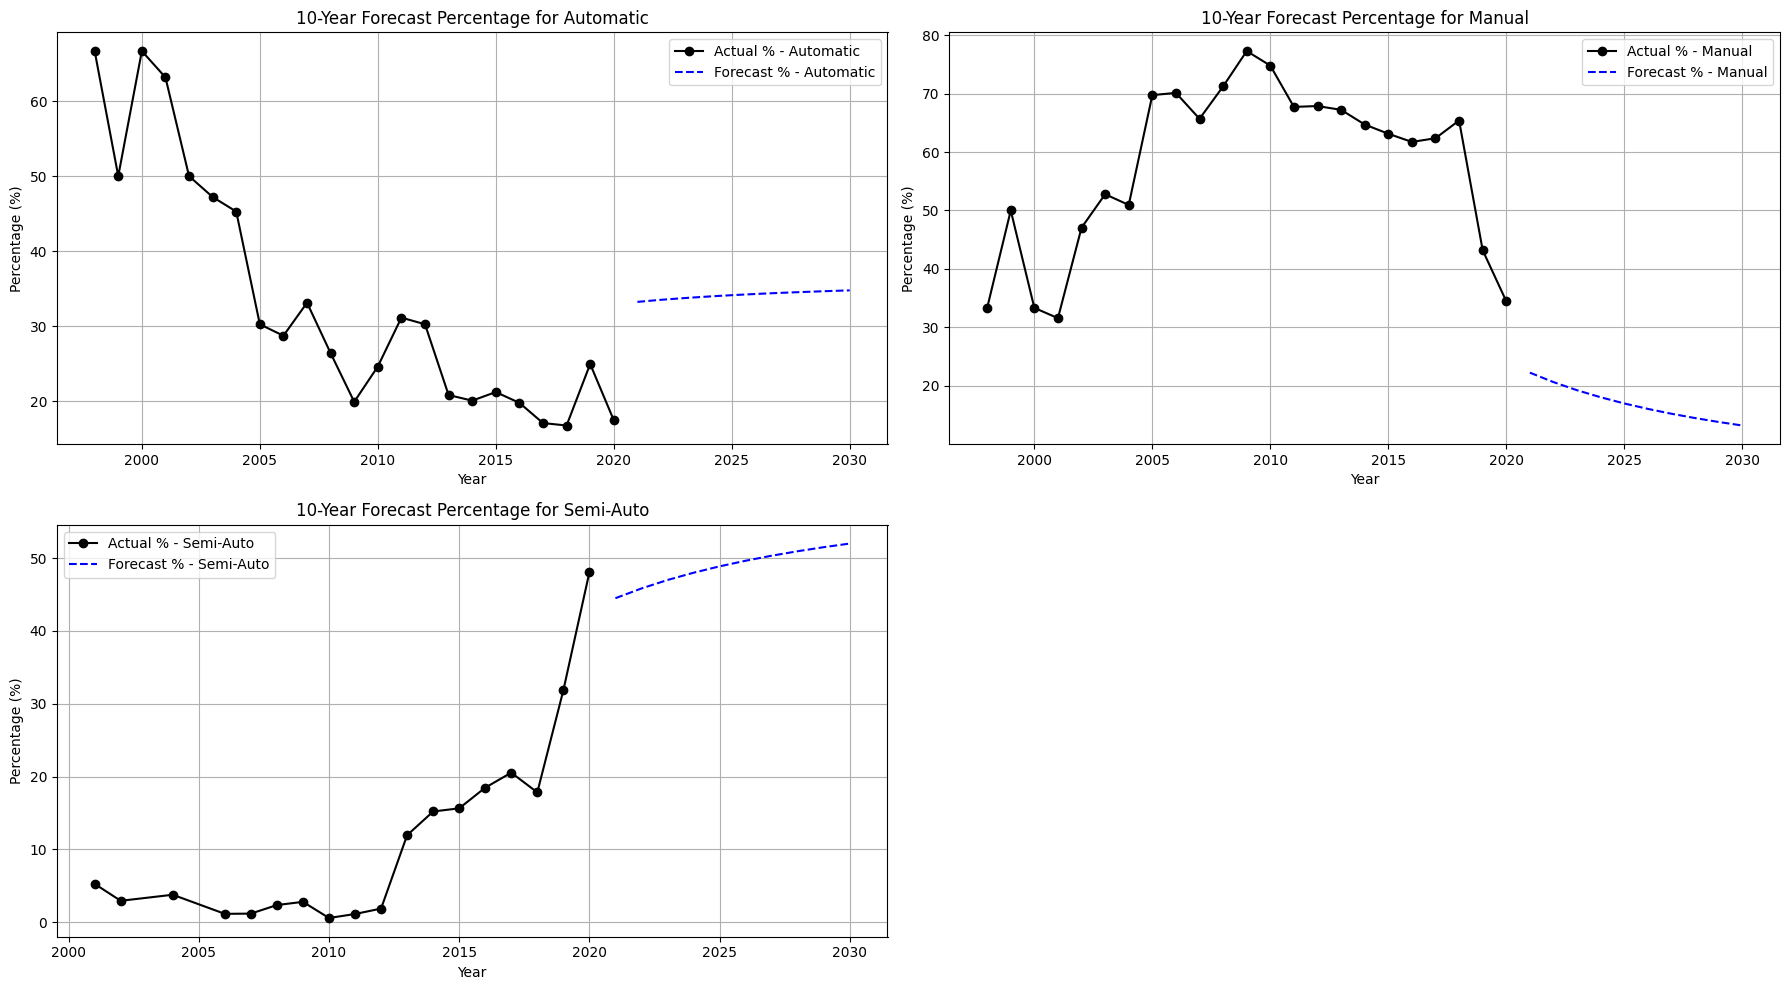

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
from contextlib import contextmanager
from statsmodels.tools.sm_exceptions import ConvergenceWarning

@contextmanager
def ignore_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", ConvergenceWarning)
        yield

# Load the data
data = pd.read_csv('Complete_AutomobileData.csv')

# Aggregate data by transmission type and year, excluding 'Other' transmission
transmission_trends = data[data['transmission'] != 'Other'].groupby(['transmission', 'year']).size().reset_index(name='count')

# Initialize an empty DataFrame to store the 10-year forecasts
forecast_10y_df_transmission = pd.DataFrame()

# Forecast the next 10 years using Exponential Smoothing for each transmission type
for transmission in transmission_trends['transmission'].unique():
    # Filter the data for the current transmission type
    transmission_data = transmission_trends[transmission_trends['transmission'] == transmission].set_index('year')['count']

    try:
        # Use Exponential Smoothing
        model_expsmooth = ExponentialSmoothing(transmission_data, trend='add', seasonal=None)
        with ignore_warnings():
            model_expsmooth_fit = model_expsmooth.fit()
            forecast = model_expsmooth_fit.forecast(steps=10)

        # Round the forecasts to whole numbers and set any negative values to zero
        forecast = np.round(forecast).astype(int)
        forecast[forecast < 0] = 0

        # Create a DataFrame to store the forecasted values
        forecast_index = pd.Series(range(transmission_data.index[-1] + 1, transmission_data.index[-1] + 11))
        forecast_data_transmission = pd.DataFrame({
            'transmission': transmission,
            'year': forecast_index,
            'forecast': forecast.values
        })

        # Append the forecasted data to the forecast_10y_df_transmission
        forecast_10y_df_transmission = pd.concat([forecast_10y_df_transmission, forecast_data_transmission], axis=0)

    except (ValueError, np.linalg.LinAlgError) as e:
        print(f"Error processing {transmission}: {e}")

# Reset index for the final DataFrame
forecast_10y_df_transmission.reset_index(drop=True, inplace=True)

# Combine the historical and forecast data for percentage calculation
combined_data = pd.concat([transmission_trends, forecast_10y_df_transmission], ignore_index=True)
combined_data.sort_values(by=['year', 'transmission'], inplace=True)

# Calculate percentage of each transmission type per year
combined_data['total_yearly_count'] = combined_data.groupby('year')['count'].transform('sum')
combined_data['percentage'] = combined_data['count'] / combined_data['total_yearly_count'] * 100

# Replace 'forecast' NaNs in historical data with zeros
combined_data['forecast'].fillna(0, inplace=True)

# Calculate the forecast percentage for the forecasted years
forecast_only = combined_data[combined_data['forecast'] > 0].copy()
forecast_only['forecast_percentage'] = forecast_only['forecast'] / forecast_only.groupby('year')['forecast'].transform('sum') * 100

# Plotting the forecasts for the next 10 years, with 2 transmission types per row
transmissions = combined_data['transmission'].unique()
n_transmissions = len(transmissions)
n_rows = np.ceil(n_transmissions / 2).astype(int)

plt.figure(figsize=(18, 5 * n_rows))

# Plot each transmission type's 10-year forecasts
for i, transmission in enumerate(transmissions, 1):
    plt.subplot(n_rows, 2, i)

    # Extract historical data and forecasted data
    transmission_actual = combined_data[(combined_data['transmission'] == transmission) & (combined_data['forecast'] == 0)].set_index('year')['percentage']
    transmission_forecast = forecast_only[forecast_only['transmission'] == transmission].set_index('year')['forecast_percentage']

    # Plot the actual historical values as percentage
    plt.plot(transmission_actual.index, transmission_actual, label=f'Actual % - {transmission}', marker='o', color='black')

    # Plot the 10-year forecasted values as percentage
    plt.plot(transmission_forecast.index, transmission_forecast, linestyle='--', label=f'Forecast % - {transmission}', color='blue')

    # Set title and labels
    plt.title(f'10-Year Forecast Percentage for {transmission}')
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()




In [ ]:
forecast_10y_df_transmission

transmission  year  forecast
0     Automatic  2021      3910
1     Automatic  2022      4269
2     Automatic  2023      4627
3     Automatic  2024      4986
4     Automatic  2025      5345
5     Automatic  2026      5704
6     Automatic  2027      6063
7     Automatic  2028      6421
8     Automatic  2029      6780
9     Automatic  2030      7139
10       Manual  2021      2617
11       Manual  2022      2628
12       Manual  2023      2638
13       Manual  2024      2649
14       Manual  2025      2659
15       Manual  2026      2670
16       Manual  2027      2680
17       Manual  2028      2691
18       Manual  2029      2701
19       Manual  2030      2712
20    Semi-Auto  2021      5233
21    Semi-Auto  2022      5837
22    Semi-Auto  2023      6442
23    Semi-Auto  2024      7047
24    Semi-Auto  2025      7651
25    Semi-Auto  2026      8256
26    Semi-Auto  2027      8861
27    Semi-Auto  2028      9465
28    Semi-Auto  2029     10070
29    Semi-Auto  2030     10674

MOST PREFERED COMBINATIONS

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No s

Skipping combination Diesel Other Compact due to insufficient data.
Skipping combination Diesel Other Luxury due to insufficient data.
Skipping combination Diesel Other Sports due to insufficient data.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No s

Skipping combination Electric Automatic Mid-size due to insufficient data.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Skipping combination Hybrid Manual Compact due to insufficient data.
Skipping combination Hybrid Manual SUV due to insufficient data.
Skipping combination Hybrid Other Compact due to insufficient data.
Skipping combination Hybrid Other Hybrid due to insufficient data.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Skipping combination Other Automatic Hybrid due to insufficient data.
Skipping combination Other Automatic Mid-size due to insufficient data.
Skipping combination Other Manual Electric due to insufficient data.
Skipping combination Other Manual Luxury due to insufficient data.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Skipping combination Other Other SUV due to insufficient data.
Skipping combination Other Semi-Auto Compact due to insufficient data.
Skipping combination Petrol Automatic Hybrid due to insufficient data.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No s

Skipping combination Petrol Automatic Van due to insufficient data.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Skipping combination Petrol Other Compact due to insufficient data.
Skipping combination Petrol Other SUV due to insufficient data.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Skipping combination Petrol Semi-Auto Van due to insufficient data.


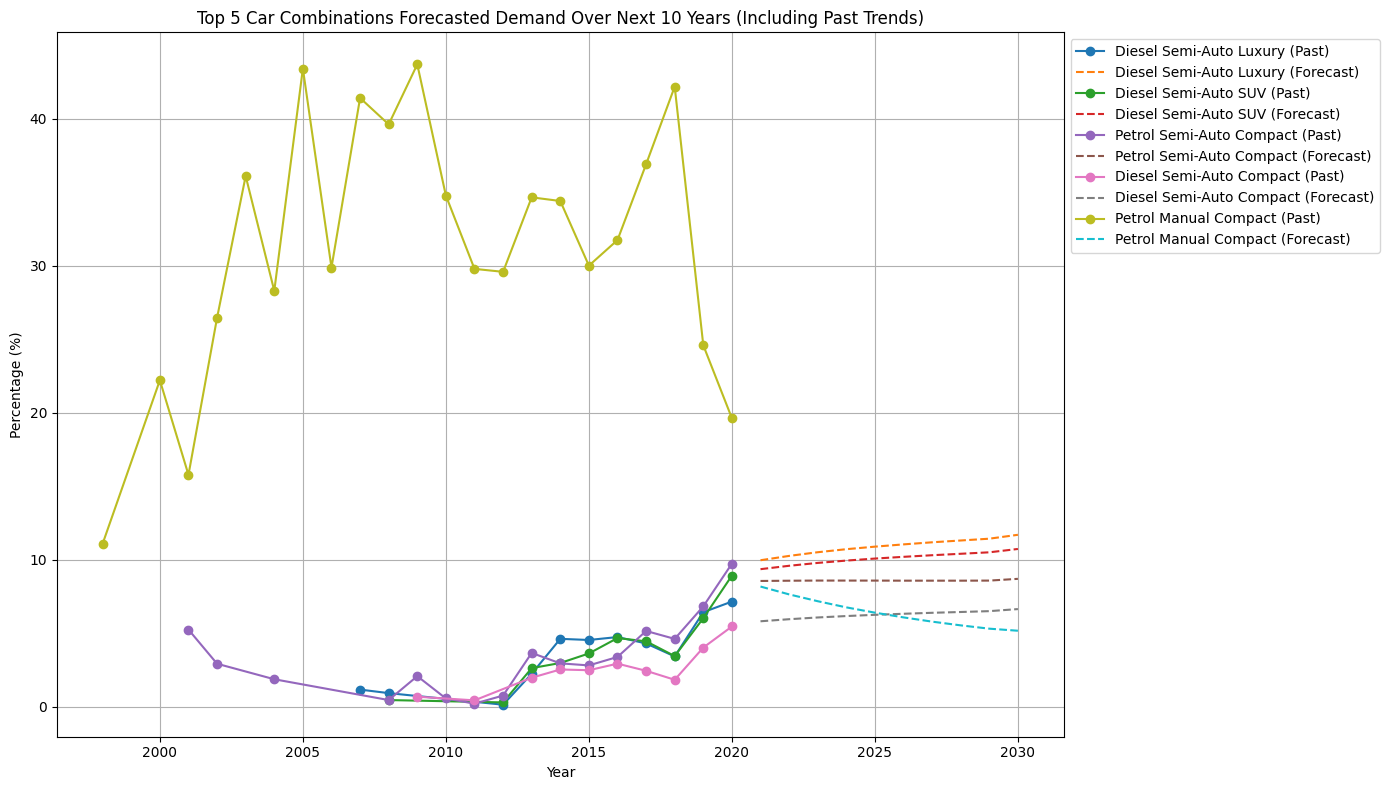

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
from contextlib import contextmanager
from statsmodels.tools.sm_exceptions import ConvergenceWarning

@contextmanager
def ignore_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", ConvergenceWarning)
        yield

# Load the data
data = pd.read_csv('Complete_AutomobileData.csv')

# Combine attributes: fuel type, transmission type, and car segment
data['combination'] = data['fuelType'] + ' ' + data['transmission'] + ' ' + data['segment']

# Aggregate data by combination and year
combination_trends = data.groupby(['combination', 'year']).size().reset_index(name='count')

# Initialize an empty DataFrame to store the forecasts
forecast_df_combination = pd.DataFrame()

# Initialize a list to store MSE and RMSE results
mse_results_combination = []

# Forecast using Exponential Smoothing and calculate MSE and RMSE
for combination in combination_trends['combination'].unique():
    # Filter the data for the current combination
    combination_data = combination_trends[combination_trends['combination'] == combination].set_index('year')['count']

    # Skip combinations with insufficient data
    if len(combination_data) < 3:  # Using 3 as a minimum to split the data
        print(f"Skipping combination {combination} due to insufficient data.")
        continue

    # Split the data into train and test sets (80% train, 20% test)
    train_size = int(len(combination_data) * 0.8)
    train_data, test_data = combination_data.iloc[:train_size], combination_data.iloc[train_size:]

    try:
        with ignore_warnings():
            # Apply Exponential Smoothing model
            model_expsmooth = ExponentialSmoothing(train_data, trend='add', seasonal=None)
            model_expsmooth_fit = model_expsmooth.fit()
            forecast_expsmooth = model_expsmooth_fit.forecast(steps=len(test_data))

        # Round the forecasts to whole numbers and set any negative values to zero
        forecast_expsmooth = np.round(forecast_expsmooth).astype(int)
        forecast_expsmooth[forecast_expsmooth < 0] = 0

        # Calculate MSE and RMSE
        mse_expsmooth = mean_squared_error(test_data, forecast_expsmooth)
        rmse_expsmooth = sqrt(mse_expsmooth)

        # Store the MSE and RMSE results
        mse_results_combination.append({
            'combination': combination,
            'Exponential_Smoothing_MSE': mse_expsmooth,
            'Exponential_Smoothing_RMSE': rmse_expsmooth
        })

        # Forecast the next 10 years based on the full dataset
        model_expsmooth_full = ExponentialSmoothing(combination_data, trend='add', seasonal=None)
        model_expsmooth_fit_full = model_expsmooth_full.fit()
        forecast_10y_expsmooth = model_expsmooth_fit_full.forecast(steps=10)

        # Round the forecasts to whole numbers and set any negative values to zero
        forecast_10y_expsmooth = np.round(forecast_10y_expsmooth).astype(int)
        forecast_10y_expsmooth[forecast_10y_expsmooth < 0] = 0

        # Create a DataFrame to store the forecasted values
        forecast_index = pd.Series(range(combination_data.index[-1] + 1, combination_data.index[-1] + 11))
        forecast_data_combination = pd.DataFrame({
            'combination': combination,
            'year': forecast_index,
            'forecast': forecast_10y_expsmooth.values
        })

        # Append the forecasted data to the forecast_df_combination
        forecast_df_combination = pd.concat([forecast_df_combination, forecast_data_combination], axis=0)

    except (ValueError, IndexError, np.linalg.LinAlgError) as e:
        print(f"Error processing {combination}: {e}")

# Convert MSE results to a DataFrame
mse_results_combination_df = pd.DataFrame(mse_results_combination)

# Reset index for the final DataFrame
forecast_df_combination.reset_index(drop=True, inplace=True)

# Combine the historical and forecast data for percentage calculation
combined_data = pd.concat([combination_trends, forecast_df_combination], ignore_index=True)
combined_data.sort_values(by=['year', 'combination'], inplace=True)

# Calculate percentage of each combination per year
combined_data['total_yearly_count'] = combined_data.groupby('year')['count'].transform('sum')
combined_data['percentage'] = combined_data['count'] / combined_data['total_yearly_count'] * 100

# Replace 'forecast' NaNs in historical data with zeros
combined_data['forecast'].fillna(0, inplace=True)

# Calculate the forecast percentage for the forecasted years
forecast_only = combined_data[combined_data['forecast'] > 0].copy()
forecast_only['forecast_percentage'] = forecast_only['forecast'] / forecast_only.groupby('year')['forecast'].transform('sum') * 100

# Plotting the top 5 combinations with the highest forecasted demand, including past trends
forecast_summary = forecast_df_combination.groupby(['year', 'combination']).sum().reset_index()
top_combinations = forecast_summary.groupby('combination')['forecast'].sum().nlargest(5).index

plt.figure(figsize=(14, 8))

for combination in top_combinations:
    # Get the historical data for the combination
    combination_historical = combined_data[(combined_data['combination'] == combination) & (combined_data['forecast'] == 0)]
    combination_forecast = forecast_only[forecast_only['combination'] == combination]

    # Plot historical data as percentage
    plt.plot(combination_historical['year'], combination_historical['percentage'], marker='o', label=f'{combination} (Past)')

    # Plot forecasted data as percentage
    plt.plot(combination_forecast['year'], combination_forecast['forecast_percentage'], linestyle='--', label=f'{combination} (Forecast)')

plt.title('Top 5 Car Combinations Forecasted Demand Over Next 10 Years (Including Past Trends)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No s

Skipping combination Diesel Other Compact due to insufficient data.
Skipping combination Diesel Other Luxury due to insufficient data.
Skipping combination Diesel Other Sports due to insufficient data.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Skipping combination Electric Automatic Mid-size due to insufficient data.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Skipping combination Hybrid Manual Compact due to insufficient data.
Skipping combination Hybrid Manual SUV due to insufficient data.
Skipping combination Hybrid Other Compact due to insufficient data.
Skipping combination Hybrid Other Hybrid due to insufficient data.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Skipping combination Other Automatic Hybrid due to insufficient data.
Skipping combination Other Automatic Mid-size due to insufficient data.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Skipping combination Other Manual Electric due to insufficient data.
Skipping combination Other Manual Luxury due to insufficient data.
Skipping combination Other Other SUV due to insufficient data.
Skipping combination Other Semi-Auto Compact due to insufficient data.
Skipping combination Petrol Automatic Hybrid due to insufficient data.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Skipping combination Petrol Automatic Van due to insufficient data.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Skipping combination Petrol Other Compact due to insufficient data.
Skipping combination Petrol Other SUV due to insufficient data.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Skipping combination Petrol Semi-Auto Van due to insufficient data.
                    combination  Exponential_Smoothing_MSE  \
0      Diesel Automatic Compact               4.666625e+05   
1     Diesel Automatic Electric               1.250000e+01   
2       Diesel Automatic Hybrid               8.410000e+02   
3       Diesel Automatic Luxury               1.089009e+06   
4     Diesel Automatic Mid-size               1.285000e+02   
5       Diesel Automatic Pickup               5.520500e+03   
6          Diesel Automatic SUV               9.143730e+05   
7       Diesel Automatic Sports               2.500000e+01   
8          Diesel Automatic Van               4.283333e+03   
9         Diesel Manual Compact               1.599005e+07   
10       Diesel Manual Electric               2.874667e+03   
11         Diesel Manual Hybrid               2.890000e+02   
12         Diesel Manual Luxury               2.318106e+06   
13       Diesel Manual Mid-size               2.454000e+03   
14

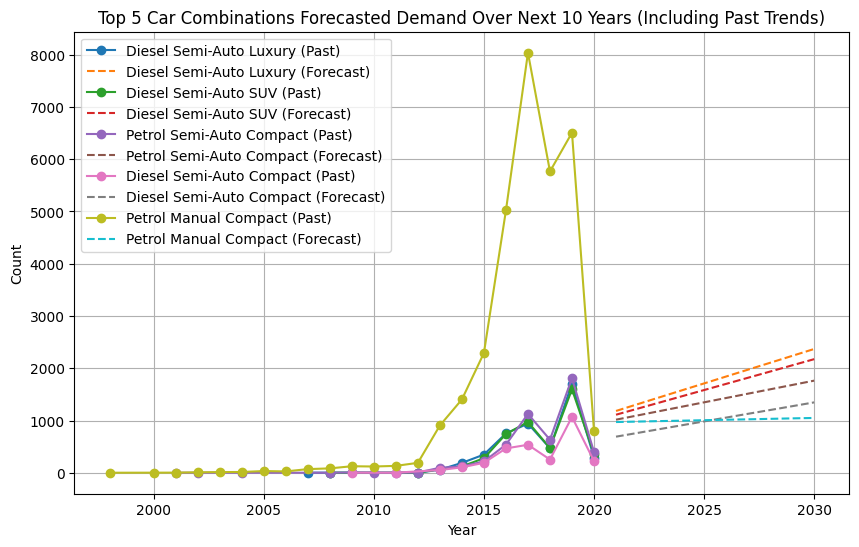

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
from contextlib import contextmanager
from statsmodels.tools.sm_exceptions import ConvergenceWarning

@contextmanager
def ignore_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", ConvergenceWarning)
        yield

# Load the data
data = pd.read_csv('Complete_AutomobileData.csv')

# Combine attributes: fuel type, transmission type, and car segment
data['combination'] = data['fuelType'] + ' ' + data['transmission'] + ' ' + data['segment']

# Aggregate data by combination and year
combination_trends = data.groupby(['combination', 'year']).size().reset_index(name='count')

# Initialize an empty DataFrame to store the forecasts
forecast_df_combination = pd.DataFrame()

# Initialize a list to store MSE and RMSE results
mse_results_combination = []

# Forecast using Exponential Smoothing and calculate MSE and RMSE
for combination in combination_trends['combination'].unique():
    # Filter the data for the current combination
    combination_data = combination_trends[combination_trends['combination'] == combination].set_index('year')['count']

    # Skip combinations with insufficient data
    if len(combination_data) < 3:  # Using 3 as a minimum to split the data
        print(f"Skipping combination {combination} due to insufficient data.")
        continue

    # Split the data into train and test sets (80% train, 20% test)
    train_size = int(len(combination_data) * 0.8)
    train_data, test_data = combination_data.iloc[:train_size], combination_data.iloc[train_size:]

    try:
        with ignore_warnings():
            # Apply Exponential Smoothing model
            model_expsmooth = ExponentialSmoothing(train_data, trend='add', seasonal=None)
            model_expsmooth_fit = model_expsmooth.fit()
            forecast_expsmooth = model_expsmooth_fit.forecast(steps=len(test_data))

        # Round the forecasts to whole numbers and set any negative values to zero
        forecast_expsmooth = np.round(forecast_expsmooth).astype(int)
        forecast_expsmooth[forecast_expsmooth < 0] = 0

        # Calculate MSE and RMSE
        mse_expsmooth = mean_squared_error(test_data, forecast_expsmooth)
        rmse_expsmooth = sqrt(mse_expsmooth)

        # Store the MSE and RMSE results
        mse_results_combination.append({
            'combination': combination,
            'Exponential_Smoothing_MSE': mse_expsmooth,
            'Exponential_Smoothing_RMSE': rmse_expsmooth
        })

        # Forecast the next 10 years based on the full dataset
        model_expsmooth_full = ExponentialSmoothing(combination_data, trend='add', seasonal=None)
        model_expsmooth_fit_full = model_expsmooth_full.fit()
        forecast_10y_expsmooth = model_expsmooth_fit_full.forecast(steps=10)

        # Round the forecasts to whole numbers and set any negative values to zero
        forecast_10y_expsmooth = np.round(forecast_10y_expsmooth).astype(int)
        forecast_10y_expsmooth[forecast_10y_expsmooth < 0] = 0

        # Create a DataFrame to store the forecasted values
        forecast_index = pd.Series(range(combination_data.index[-1] + 1, combination_data.index[-1] + 11))
        forecast_data_combination = pd.DataFrame({
            'combination': combination,
            'year': forecast_index,
            'forecast': forecast_10y_expsmooth.values
        })

        # Append the forecasted data to the forecast_df_combination
        forecast_df_combination = pd.concat([forecast_df_combination, forecast_data_combination], axis=0)

    except (ValueError, IndexError, np.linalg.LinAlgError) as e:
        print(f"Error processing {combination}: {e}")

# Convert MSE results to a DataFrame
mse_results_combination_df = pd.DataFrame(mse_results_combination)

# Reset index for the final DataFrame
forecast_df_combination.reset_index(drop=True, inplace=True)

# Display the MSE and RMSE results and the first few rows of the 10-year forecast data
print(mse_results_combination_df)
print(forecast_df_combination.head())

# Plotting the top 5 combinations with the highest forecasted demand, including past trends
forecast_summary = forecast_df_combination.groupby(['year', 'combination']).sum().reset_index()
top_combinations = forecast_summary.groupby('combination')['forecast'].sum().nlargest(5).index

plt.figure(figsize=(10, 6))

for combination in top_combinations:
    # Get the historical data for the combination
    combination_historical = combination_trends[combination_trends['combination'] == combination]
    combination_forecast = forecast_summary[forecast_summary['combination'] == combination]

    # Plot historical data
    plt.plot(combination_historical['year'], combination_historical['count'], marker='o', label=f'{combination} (Past)')

    # Plot forecasted data
    plt.plot(combination_forecast['year'], combination_forecast['forecast'], linestyle='--', label=f'{combination} (Forecast)')

plt.title('Top 5 Car Combinations Forecasted Demand Over Next 10 Years (Including Past Trends)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(forecast_df_combination)

                  combination  year  forecast
0    Diesel Automatic Compact  2021       408
1    Diesel Automatic Compact  2022       438
2    Diesel Automatic Compact  2023       468
3    Diesel Automatic Compact  2024       498
4    Diesel Automatic Compact  2025       528
..                        ...   ...       ...
595   Petrol Semi-Auto Sports  2026       168
596   Petrol Semi-Auto Sports  2027       180
597   Petrol Semi-Auto Sports  2028       192
598   Petrol Semi-Auto Sports  2029       204
599   Petrol Semi-Auto Sports  2030       216

[600 rows x 3 columns]


ONLY PRICE FORECASTING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.stattools import grangercausalitytests

# Step 1: Import the data
data = pd.read_csv('/content/Complete_AutomobileData.csv')

# Step 2: Encode categorical columns
data_encoded = data.copy()
categorical_columns = ['brand', 'model', 'transmission', 'fuelType', 'segment']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data_encoded[col] = label_encoders[col].fit_transform(data_encoded[col])

# Step 3: Handle NaN or infinite values in the dataset
data_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
data_encoded.dropna(inplace=True)

# Step 4: Perform Granger causality test for all features against each other
def granger_causality_matrix(data, variables, max_lag=2):
    result = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for col in variables:
        for row in variables:
            test_result = grangercausalitytests(data[[row, col]], maxlag=max_lag, verbose=False)
            p_values = [round(test[0]['ssr_chi2test'][1], 4) for test in test_result.values()]
            min_p_value = np.min(p_values)
            result.loc[row, col] = min_p_value
    return result

# Select a smaller subset of features for the Granger causality test
subset_features = ['price', 'mileage', 'engineSize', 'CO2 Emissions (g/km)', 'brand', 'transmission']

# Perform the Granger causality test on the subset of features
granger_matrix_subset = granger_causality_matrix(data_encoded, subset_features)

# Add a column to indicate if the feature is relevant (p-value < 0.05)
def relevance(p_value):
    return 'Relevant' if p_value < 0.05 else 'Not Relevant'

for col in granger_matrix_subset.columns:
    granger_matrix_subset[col + '_fit'] = granger_matrix_subset[col].apply(relevance)


# Display the Granger causality matrix
print(granger_matrix_subset)





/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print resul

                       price  mileage  engineSize  CO2 Emissions (g/km)  \
price                 1.0000   0.0176      0.0000                0.0021   
mileage               0.0000   1.0000      0.0000                0.0000   
engineSize            0.0000   0.0000      1.0000                0.0000   
CO2 Emissions (g/km)  0.0000   0.0000      0.0000                1.0000   
brand                 0.1595   0.2647      0.7141                0.5546   
transmission          0.0000   0.0000      0.0000                0.0000   

                      brand  transmission     price_fit   mileage_fit  \
price                   0.0        0.0000  Not Relevant      Relevant   
mileage                 0.0        0.0000      Relevant  Not Relevant   
engineSize              0.0        0.0000      Relevant      Relevant   
CO2 Emissions (g/km)    0.0        0.0000      Relevant      Relevant   
brand                   1.0        0.1063  Not Relevant  Not Relevant   
transmission            0.0        1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.stattools import grangercausalitytests

# Encode categorical columns
data_encoded = data.copy()
categorical_columns = ['brand', 'model', 'transmission', 'fuelType', 'segment']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data_encoded[col] = label_encoders[col].fit_transform(data_encoded[col])

# Handle NaN or infinite values in the dataset
data_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
data_encoded.dropna(inplace=True)

#  Perform Granger causality test for all features against each other
def granger_causality_matrix(data, variables, max_lag=4):
    result = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for col in variables:
        for row in variables:
            test_result = grangercausalitytests(data[[row, col]], maxlag=max_lag, verbose=False)
            p_values = [round(test[0]['ssr_chi2test'][1], 4) for test in test_result.values()]
            min_p_value = np.min(p_values)
            result.loc[row, col] = min_p_value
    return result

# Select the variables for the Granger causality test
variables = data_encoded.columns.tolist()

# Perform the Granger causality test on all features
granger_matrix = granger_causality_matrix(data_encoded, variables)

# Add a column to indicate if the feature is relevant (p-value < 0.05)
def relevance(p_value):
    return 'Relevant' if p_value < 0.05 else 'Not Relevant'

for col in granger_matrix.columns:
    granger_matrix[col + '_fit'] = granger_matrix[col].apply(relevance)


# Display the Granger causality matrix
print(granger_matrix)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.wa

                       brand   model  year   price  transmission  mileage  \
brand                 1.0000  0.0000   0.0  0.1163        0.1063   0.2647   
model                 0.0000  1.0000   0.0  0.0026        0.3256   0.2490   
year                  0.0000  0.0000   1.0  0.0000        0.0000   0.0000   
price                 0.0000  0.0001   0.0  1.0000        0.0000   0.0000   
transmission          0.0000  0.0000   0.0  0.0000        1.0000   0.0000   
mileage               0.0000  0.0000   0.0  0.0000        0.0000   1.0000   
tax                   0.0000  0.0000   0.0  0.0000        0.0000   0.0000   
mpg                   0.0316  0.0000   0.0  0.0000        0.0000   0.0000   
fuelType              0.0000  0.0023   0.0  0.0000        0.0000   0.0000   
engineSize            0.0000  0.5484   0.0  0.0000        0.0000   0.0000   
car_age               0.0000  0.0000   1.0  0.0000        0.0000   0.0000   
CO2 Emissions (g/km)  0.0000  0.0000   0.0  0.0000        0.0000   0.0000   

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/Complete_AutomobileData.csv')

# Convert 'year' column to datetime format
data['year'] = pd.to_datetime(data['year'], format='%Y')

# Select relevant columns
data = data[['year', 'price', 'Inflation_Rate', 'mileage', 'tax']]

# Set 'year' as index
data.set_index('year', inplace=True)
# Display the first few rows of the dataset
print(data.head())


            price  Inflation_Rate  mileage    tax
year                                             
2010-01-01   9990             2.5    38000  125.0
2011-01-01   6295             3.8   107000  125.0
2011-01-01   6995             3.8    65000  125.0
2011-01-01   4250             3.8   116000   20.0
2011-01-01   7495             3.8    60700  125.0


<ipython-input-45-81c1de1802fa>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
# Scale the data

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# Display the scaled data
print(scaled_data.head())


               price  Inflation_Rate   mileage       tax
year                                                    
2010-01-01  0.059794        0.617647  0.117644  0.213619
2011-01-01  0.036635        1.000000  0.331267  0.213619
2011-01-01  0.041022        1.000000  0.201236  0.213619
2011-01-01  0.023817        1.000000  0.359131  0.032147
2011-01-01  0.044156        1.000000  0.187923  0.213619


In [ ]:
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    return result[1] < 0.05

def make_stationary(series, max_diffs=2):
    differencing_count = 0
    while not check_stationarity(series) and differencing_count < max_diffs:
        series = series.diff().dropna()
        differencing_count += 1
    return series, differencing_count

# Check and make the series stationary
stationary_data = scaled_data.copy()
differencing_info = {}
for column in stationary_data.columns:
    stationary_data[column], diffs = make_stationary(stationary_data[column])
    differencing_info[column] = diffs

print("Differencing applied:")
print(differencing_info)

ADF Statistic: -11.161079312899325
p-value: 2.78696146146746e-20
ADF Statistic: -16.108301715970523
p-value: 5.044917249082584e-29
ADF Statistic: -16.677632287697612
p-value: 1.5259625717102954e-29
ADF Statistic: -13.405459063424907
p-value: 4.479683403524093e-25
Differencing applied:
{'price': 0, 'Inflation_Rate': 0, 'mileage': 0, 'tax': 0}


In [ ]:
def create_lagged_features(data, lag=1):
    lagged_data = data.copy()
    for col in data.columns:
        for i in range(1, lag+1):
            lagged_data[f'{col}_lag{i}'] = data[col].shift(i)
    return lagged_data.dropna()

# Create lagged features
lagged_data = create_lagged_features(stationary_data, lag=3)

# Define features (X) and target (y)
X = lagged_data.drop(columns=['price'])
y = lagged_data['price']

# Split the data into training and test sets
train_size = int(len(lagged_data) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print(X_train.head())
print(y_train.head())


            Inflation_Rate   mileage       tax  price_lag1  price_lag2  \
year                                                                     
2011-01-01        1.000000  0.359131  0.032147    0.041022    0.036635   
2011-01-01        1.000000  0.187923  0.213619    0.023817    0.041022   
2011-01-01        1.000000  0.139316  0.044418    0.044156    0.023817   
2012-01-01        0.647059  0.125607  0.213619    0.037763    0.044156   
2012-01-01        0.647059  0.175539  0.032147    0.053582    0.037763   

            price_lag3  Inflation_Rate_lag1  Inflation_Rate_lag2  \
year                                                               
2011-01-01    0.059794             1.000000                  1.0   
2011-01-01    0.036635             1.000000                  1.0   
2011-01-01    0.041022             1.000000                  1.0   
2012-01-01    0.023817             1.000000                  1.0   
2012-01-01    0.044156             0.647059                  1.0   

    

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

# Make predictions
predictions_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)

print(f'Random Forest Model - MSE: {mse_rf}, R2: {r2_rf}')


Random Forest Model - MSE: 0.00036950076065527323, R2: 0.8261432855147631


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fit the Random Forest model
rf_model1 = RandomForestRegressor(n_estimators=300, max_depth=10)
rf_model1.fit(X_train, y_train)

# Make predictions
predictions_rf1 = rf_model1.predict(X_test)

# Calculate evaluation metrics
mse_rf1 = mean_squared_error(y_test, predictions_rf1)
r2_rf1= r2_score(y_test, predictions_rf1)

print(f'Random Forest Model - MSE: {mse_rf1}, R2: {r2_rf1}')

Random Forest Model - MSE: 0.00037055508187785097, R2: 0.8256472085284956


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Fit the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=10)
dt_model.fit(X_train, y_train)

# Make predictions
predictions_dt = dt_model.predict(X_test)

# Calculate evaluation metrics
mse_dt = mean_squared_error(y_test, predictions_dt)
r2_dt = r2_score(y_test, predictions_dt)

print(f'Decision Tree Model - MSE: {mse_dt}, R2: {r2_dt}')

Decision Tree Model - MSE: 0.0005009580758390449, R2: 0.7642902682912799


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Fit the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=300, max_depth=10, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
predictions_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_test, predictions_gb)
r2_gb = r2_score(y_test, predictions_gb)

print(f'Gradient Boosting Model - MSE: {mse_gb}, R2: {r2_gb}')


Gradient Boosting Model - MSE: 0.00037050659503407604, R2: 0.8256700224554264


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
predictions_lr = lr_model.predict(X_test)

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)

print(f'Linear Regression Model - MSE: {mse_lr}, R2: {r2_lr}')


Linear Regression Model - MSE: 0.00036117444140688123, R2: 0.8300609675939921


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define and fit the MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Make predictions
predictions_mlp = mlp_model.predict(X_test)

# Calculate evaluation metrics
mse_mlp = mean_squared_error(y_test, predictions_mlp)
r2_mlp = r2_score(y_test, predictions_mlp)

print(f'MLP Regression Model - MSE: {mse_mlp}, R2: {r2_mlp}')


MLP Regression Model - MSE: 0.00033036694077711134, R2: 0.8445564474720176


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape the data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Build the enhanced LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(100, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(100, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32)

# Make predictions
predictions_lstm = lstm_model.predict(X_test_lstm)

# Calculate evaluation metrics
mse_lstm = mean_squared_error(y_test, predictions_lstm)
r2_lstm = r2_score(y_test, predictions_lstm)

print(f'Enhanced LSTM Model - MSE: {mse_lstm}, R2: {r2_lstm}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - loss: 0.0022
Epoch 2/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - loss: 0.0010
Epoch 3/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - loss: 8.8986e-04
Epoch 4/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - loss: 8.9672e-04
Epoch 5/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - loss: 8.0944e-04
Epoch 6/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 8.5871e-04
Epoch 7/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 7.8119e-04
Epoch 8/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - loss: 7.6191e-04
Epoch 9/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - loss: 7.9111e-04
Epoch 10/10
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 45s 13ms/step - loss: 7.9180e-04
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Enhanced LSTM Model - MSE: 0.00038747235038706347, R2: 0.8176873312176605


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape the data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Build the enhanced LSTM model with layers having squared units
lstm_model = Sequential()
lstm_model.add(LSTM(64, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(256, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(16))
lstm_model.add(Dense(1))  # Output layer with 1 unit

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32)

# Make predictions
predictions_lstm1 = lstm_model.predict(X_test_lstm)

# Calculate evaluation metrics
mse_lstm1 = mean_squared_error(y_test, predictions_lstm1)
r2_lstm1 = r2_score(y_test, predictions_lstm1)

print(f'Enhanced LSTM Model - MSE: {mse_lstm1}, R2: {r2_lstm1}')


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2464/2464 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0020
Epoch 2/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0011
Epoch 3/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 9.3791e-04
Epoch 4/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 8.5828e-04
Epoch 5/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - loss: 8.4212e-04
Epoch 6/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 8.0872e-04
Epoch 7/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 7.5904e-04
Epoch 8/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 8.0369e-04
Epoch 9/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 7.9813e-04
Epoch 10/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 8.0420e-04
Epoch 11/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 7.7681e-04
Epoch 12/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 7.8752e-04
Epoch 13/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 8.1997e-04
Epoch 14/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/st

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

# Reshape the data for CNN
X_train_cnn = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Build the enhanced CNN model with layers having squared units
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))  # 64 filters (8^2)
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))  # 256 filters (16^2)
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))  # 64 filters (8^2)
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(16, activation='relu'))  # 16 units (4^2)
cnn_model.add(Dense(1))  # Output layer with 1 unit

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32)

# Make predictions
predictions_cnn = cnn_model.predict(X_test_cnn)

# Calculate evaluation metrics
mse_cnn = mean_squared_error(y_test, predictions_cnn)
r2_cnn = r2_score(y_test, predictions_cnn)

print(f'Enhanced CNN Model - MSE: {mse_cnn}, R2: {r2_cnn}')


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2464/2464 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0018
Epoch 2/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 9.4277e-04
Epoch 3/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 9.4371e-04
Epoch 4/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 8.4744e-04
Epoch 5/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 8.3104e-04
Epoch 6/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 7.8216e-04
Epoch 7/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 8.0769e-04
Epoch 8/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.1616e-04
Epoch 9/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 7.8778e-04
Epoch 10/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 7.5357e-04
Epoch 11/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 7.9768e-04
Epoch 12/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 7.7199e-04
Epoch 13/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 7.9911e-04
Epoch 14/20
2464/2464 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Flatten, Concatenate
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Reshape the data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM part of the model
input_lstm = Input(shape=(X_train_lstm.shape[1], 1))
lstm_out = LSTM(100, return_sequences=True)(input_lstm)
lstm_out = Dropout(0.2)(lstm_out)
lstm_out = LSTM(100, return_sequences=True)(lstm_out)
lstm_out = Dropout(0.2)(lstm_out)
lstm_out = LSTM(50, return_sequences=False)(lstm_out)
lstm_out = Dropout(0.2)(lstm_out)

# Flatten the LSTM output
lstm_out_flat = Flatten()(lstm_out)

# Combine the LSTM output with MLP input
input_mlp = Input(shape=(X_train.shape[1],))
combined_input = Concatenate()([lstm_out_flat, input_mlp])

# Build the MLP part of the model
mlp_out = Dense(100, activation='relu')(combined_input)
mlp_out = Dense(100, activation='relu')(mlp_out)
mlp_out = Dense(1)(mlp_out)
# Final model
hybrid_model = Model(inputs=[input_lstm, input_mlp], outputs=mlp_out)
# Compile the model
hybrid_model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
hybrid_model.fit([X_train_lstm, X_train], y_train, epochs=10, batch_size=32)

# Make predictions
predictions_hybrid = hybrid_model.predict([X_test_lstm, X_test])
# Calculate evaluation metrics
mse_hybrid = mean_squared_error(y_test, predictions_hybrid)
r2_hybrid = r2_score(y_test, predictions_hybrid)

print(f'Hybrid LSTM-MLP Model - MSE: {mse_hybrid}, R2: {r2_hybrid}')


In [ ]:
# Add evaluation metrics to the DataFrame
metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree','Gradient Boosting','Linear Regression','MLP Regression','LSTM' ,'CNN','Hybrid LSTM + MLP'],
    'MSE': [mse_rf, mse_dt,mse_gb,mse_lr,mse_mlp,mse_lstm,mse_cnn,mse_hybrid],
    'R2': [r2_rf, r2_dt,r2_gb,r2_lr,r2_mlp,r2_lstm,r2_cnn,r2_hybrid]
})

# Print the evaluation metrics DataFrame
print(metrics_df)

               Model       MSE        R2
0      Random Forest  0.000370  0.826143
1      Decision Tree  0.000501  0.764290
2  Gradient Boosting  0.000371  0.825670
3  Linear Regression  0.000361  0.830061
4     MLP Regression  0.000330  0.844556
5               LSTM  0.000387  0.817687
6                CNN  0.000430  0.797679
7  Hybrid LSTM + MLP  0.000365  0.828132


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Function to inverse transform a single column using the scaler
def inverse_single_column(scaler, scaled_column, data, target_column_index):
    # Create an array with zeros except the target column
    temp_array = np.zeros((len(scaled_column), data.shape[1]))
    temp_array[:, target_column_index] = scaled_column.flatten()  # Assuming 'price' is at target_column_index
    return scaler.inverse_transform(temp_array)[:, target_column_index]

# Assuming 'price' is the first column after scaling, index 0
price_column_index = list(data.columns).index('price')

# Inverse transform the predictions
predictions_rf_inv = inverse_single_column(scaler, predictions_rf, data, price_column_index)
predictions_dt_inv = inverse_single_column(scaler, predictions_dt, data, price_column_index)
predictions_gb_inv = inverse_single_column(scaler, predictions_gb, data, price_column_index)
predictions_mlp_inv = inverse_single_column(scaler, predictions_mlp, data, price_column_index)
predictions_lstm_inv = inverse_single_column(scaler, predictions_lstm.flatten(), data, price_column_index)
predictions_cnn_inv = inverse_single_column(scaler, predictions_cnn.flatten(), data, price_column_index)
predictions_hybrid_inv = inverse_single_column(scaler, predictions_hybrid.flatten(), data, price_column_index)
predictions_gb_lr = inverse_single_column(scaler, predictions_lr, data, price_column_index)

# Inverse transform the actual y_test data
actual_values_inv = inverse_single_column(scaler, y_test.values, data, price_column_index)

# Organizing all predicted values into a DataFrame
predicted_values_df = pd.DataFrame({
    'Actual': actual_values_inv,
    'Random Forest': predictions_rf_inv,
    'Decision Tree': predictions_dt_inv,
    'Gradient Boosting': predictions_gb_inv,
    'Linear Regression' : predictions_gb_lr ,
    'MLP Regression': predictions_mlp_inv,
    'LSTM': predictions_lstm_inv,
    'CNN' : predictions_cnn_inv,
    'Hybrid LSTM + MLP' : predictions_hybrid_inv,
}, index=X_test.index)

# Display the DataFrame with actual and predicted values
print(predicted_values_df.head())


             Actual  Random Forest  Decision Tree  Gradient Boosting  \
year                                                                   
2017-01-01  11494.0   13405.046238   13495.088748       14006.773346   
2017-01-01  14599.0   13045.166772   13360.076375       12807.297163   
2017-01-01  10699.0   13428.139221   13416.023474       12975.832214   
2017-01-01  13199.0   12137.656492   12826.895238       12146.945817   
2017-01-01  13349.0   13437.277043   13416.023474       12646.792444   

            Linear Regression  MLP Regression          LSTM           CNN  \
year                                                                        
2017-01-01       14347.141429    14362.567887  15172.236749  15496.524214   
2017-01-01       12976.674081    12745.818382  13982.104927  13960.752911   
2017-01-01       14030.668120    13714.988489  14791.585524  14302.915349   
2017-01-01       12661.662183    12662.544931  13392.800209  13971.841409   
2017-01-01       12861.945152    

MLP Model - MSE: 8409782.323967222, R²: 0.8445564474720176


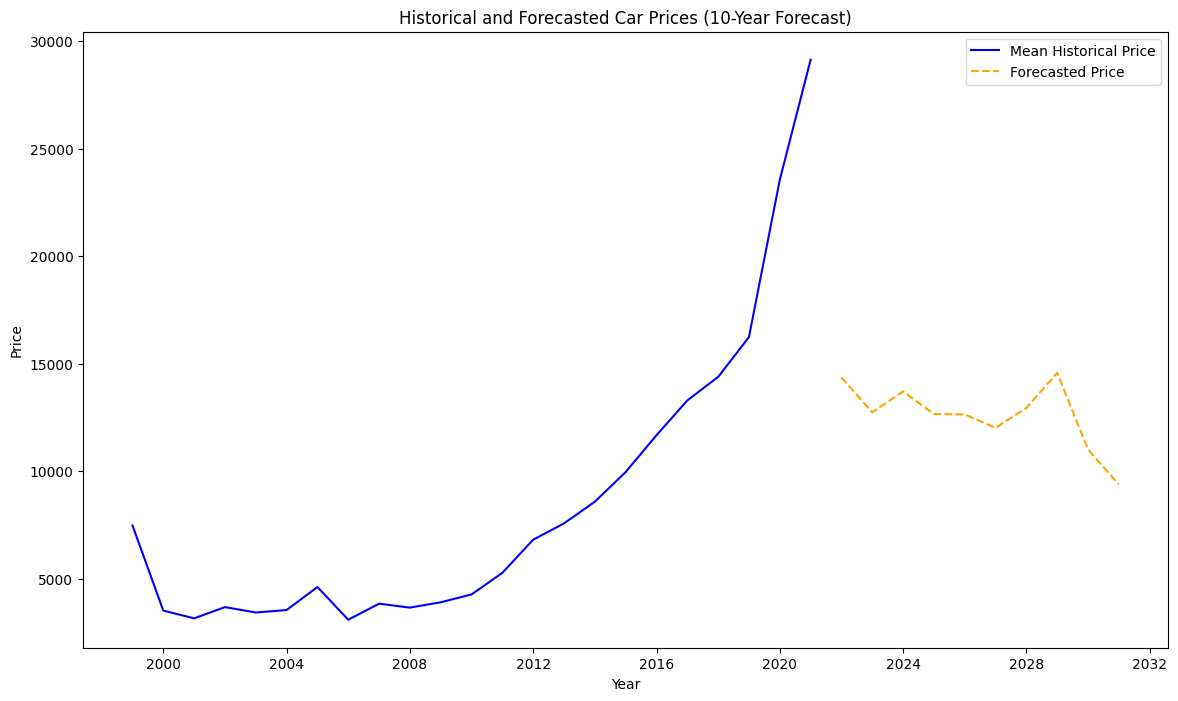

            Forecasted Price
2021-12-31      14362.567887
2022-12-31      12745.818382
2023-12-31      13714.988489
2024-12-31      12662.544931
2025-12-31      12645.913726
2026-12-31      12021.317954
2027-12-31      12942.343418
2028-12-31      14579.083593
2029-12-31      11013.768952
2030-12-31       9386.118088


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Function to inverse transform a single column using the scaler
def inverse_single_column(scaler, scaled_column, data, target_column_index):
    # Create an array with zeros except the target column
    temp_array = np.zeros((len(scaled_column), data.shape[1]))
    temp_array[:, target_column_index] = scaled_column.flatten()  # Assuming 'price' is at target_column_index
    return scaler.inverse_transform(temp_array)[:, target_column_index]

# Assuming 'price' is the first column after scaling, index 0
price_column_index = list(data.columns).index('price')

# Inverse transform the MLP predictions
predictions_mlp_inv = inverse_single_column(scaler, predictions_mlp, data, price_column_index)

# Inverse transform the actual y_test values for comparison
y_test_inv = inverse_single_column(scaler, y_test.values, data, price_column_index)

# Step 2: Calculate the mean price by year from the original dataset to see the time series trend
mean_prices_by_year = data['price'].resample('Y').mean()

# Calculate evaluation metrics for the MLP model
mse_mlp = mean_squared_error(y_test_inv, predictions_mlp_inv)
r2_mlp = r2_score(y_test_inv, predictions_mlp_inv)

print(f'MLP Model - MSE: {mse_mlp}, R²: {r2_mlp}')

# Step 3: Plot the corrected and aggregated time series data
plt.figure(figsize=(14, 8))

# Plot the mean price by year
plt.plot(mean_prices_by_year.index, mean_prices_by_year.values, label='Mean Historical Price', color='blue')

# Adjust the forecast period if necessary
forecast_periods = min(len(predictions_mlp_inv), 10)  # Limit forecast to 10 years or the number of predictions

# Plot the forecasted prices
forecast_years = pd.date_range(start=y_test.index[-1] + pd.DateOffset(years=1), periods=forecast_periods, freq='Y')
plt.plot(forecast_years, predictions_mlp_inv[:forecast_periods], label='Forecasted Price', linestyle='--', color='orange')

plt.title('Historical and Forecasted Car Prices (10-Year Forecast)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

# Print the forecasted values for review
forecast_df = pd.DataFrame(data=predictions_mlp_inv[:forecast_periods], index=forecast_years, columns=['Forecasted Price'])
print(forecast_df)




Forecast the price  considering factors like mileage inflation and tax using #Statistical multivariate time sereis models

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load and prepare data
data = pd.read_csv('/content/Complete_AutomobileData.csv')
data['year'] = pd.to_datetime(data['year'], format='%Y')
data.set_index('year', inplace=True)

# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Aggregate data by year
annual_data = numeric_data.resample('Y').mean()

# Select relevant features for multivariate analysis using Statistical models
features = ['price', 'tax', 'Inflation_Rate','mileage']
multivariate_data = annual_data[features].dropna()

# Apply log transformation to stabilize variance
log_data = np.log(multivariate_data + 1)  # Adding 1 to avoid log(0)

# Function to check stationarity and print ADF test results
def check_stationarity(series, signif=0.05):
    result = adfuller(series.dropna(), autolag='AIC')
    p_value = result[1]
    is_stationary = p_value < signif
    return is_stationary, p_value, result[0]

# Apply differencing to make the series stationary if necessary
diff_data = log_data.copy()
for column in diff_data.columns:
    order = 0
    while not check_stationarity(diff_data[column])[0]:
        diff_data[column] = diff_data[column].diff().dropna()
        order += 1

# Verify stationarity after differencing
print("\nStationarity Check After Differencing:")
for column in diff_data.columns:
    is_stationary, p_value, test_statistic = check_stationarity(diff_data[column])
    print(f'{column}: Stationary={is_stationary}, p-value={p_value}, test_statistic={test_statistic}')

# Split data into training and testing sets
train_size = int(len(diff_data) * 0.8)
train_data = diff_data.iloc[:train_size]
test_data = diff_data.iloc[train_size:]
from sklearn.metrics import mean_squared_error, r2_score

# Function to calculate metrics
def calculate_metrics(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    r2 = r2_score(actual, forecast)
    return mse, r2



Stationarity Check After Differencing:
price: Stationary=True, p-value=2.1231035539573566e-12, test_statistic=-8.017206272115763
tax: Stationary=True, p-value=0.0035194856323390654, test_statistic=-3.7452811142778146
Inflation_Rate: Stationary=True, p-value=1.8030481583394059e-07, test_statistic=-5.984774618479488
mileage: Stationary=True, p-value=2.404434766955186e-07, test_statistic=-5.929083795231569


 Vector AutoRegression (VAR)

 VAR is designed specifically for multivariate time series analysis. It models each variable as a linear combination of its own past values and the past values of all other variables in the system. This approach effectively captures the dynamic interdependencies among multiple time series. VAR is widely used in economics and finance for forecasting and analyzing the impact of variables on each other over time

In [ ]:
# VAR Model
maxlags = 1
model_var = VAR(train_data.dropna())
lag_order = model_var.select_order(maxlags=maxlags)
model_var_fitted = model_var.fit(lag_order.aic)
forecast_var = model_var_fitted.forecast(train_data.values[-lag_order.aic:], steps=len(test_data))
forecast_var_df = pd.DataFrame(forecast_var, index=test_data.index, columns=train_data.columns)


for column in forecast_var_df.columns:
    forecast_var_df[column] = np.exp(forecast_var_df[column].cumsum() + log_data[column].iloc[train_size-1]) - 1

metrics_var = {col: calculate_metrics(multivariate_data[col].iloc[train_size:train_size+len(forecast_var_df)], forecast_var_df[col]) for col in forecast_var_df.columns}


VARMA (Vector Autoregressive Moving Average)

The VARMA (Vector Autoregressive Moving Average) model is an extension of the VAR (Vector Autoregression) model that incorporates moving average components. This model is used to capture both the relationships between multiple time series (as in VAR) and the effects of past errors on these series (as in MA). The VARMA model can better handle complex temporal structures in multivariate time series data.



In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX

# Example of determining the optimal order using grid search
best_aic = np.inf
best_order = None
for p in range(1, 4):
    for q in range(1, 4):
        try:
            model = VARMAX(train_data, order=(p, q))
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = (p, q)
        except Exception as e:
            continue

print(f'Optimal order: {best_order} with AIC: {best_aic}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/pyt

Optimal order: (1, 1) with AIC: 27.529796579259227


In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX

# Fit VARMA model with optimal order
varma_model = VARMAX(train_data, order=best_order)
varma_fitted = varma_model.fit(disp=False)
print(varma_fitted.summary())

varma_forecast = varma_fitted.forecast(steps=len(test_data))

forecast_varma_df = pd.DataFrame(varma_forecast, index=test_data.index, columns=train_data.columns)

# Invert the log transformation and differencing to get the actual forecasted values
for column in forecast_varma_df.columns:
    forecast_varma_df[column] = np.exp(forecast_varma_df[column].cumsum() + log_data[column].iloc[train_size-1]) - 1

metrics_varma = {col: calculate_metrics(multivariate_data[col].iloc[train_size:train_size+len(forecast_varma_df)], forecast_varma_df[col]) for col in forecast_varma_df.columns}




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


                                         Statespace Model Results                                        
Dep. Variable:     ['price', 'tax', 'Inflation_Rate', 'mileage']   No. Observations:                   18
Model:                                                VARMA(1,1)   Log Likelihood                  32.235
                                                     + intercept   AIC                             27.530
Date:                                           Tue, 13 Aug 2024   BIC                             68.487
Time:                                                   14:05:45   HQIC                            33.177
Sample:                                               12-31-1998                                         
                                                    - 12-31-2015                                         
Covariance Type:                                             opg                                         
Ljung-Box (L1) (Q):         nan, nan, nan, nan

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Dynamic Factor Models (DFM)

DFM utilizes a small number of unobserved common factors to describe the comovement among multiple time series. These factors are estimated from the observed data, and the model can be used for forecasting multiple related time series simultaneously. DFMs are particularly useful when dealing with large datasets where capturing the common trends and cycles is essential​

In [ ]:
# Dynamic Factor Model (DFM)
dfm = DynamicFactor(train_data, k_factors=1, factor_order=2)
dfm_fitted = dfm.fit()
dfm_forecast = dfm_fitted.get_forecast(steps=len(test_data))
dfm_forecast_mean = dfm_forecast.predicted_mean

for col in dfm_forecast_mean.columns:
    dfm_forecast_mean[col] = np.exp(dfm_forecast_mean[col].cumsum() + log_data[col].iloc[train_size-1]) - 1

metrics_dfm = {col: calculate_metrics(multivariate_data[col].iloc[train_size:train_size + len(dfm_forecast_mean)], dfm_forecast_mean[col]) for col in dfm_forecast_mean.columns}


In [ ]:
# Create comparison table with MSE and R² for each model
comparison_table = pd.DataFrame({
    'VAR_MSE': {col: metrics_var[col][0] for col in metrics_var},

    'DFM_MSE': {col: metrics_dfm[col][0] for col in metrics_dfm},


    'VARMA_MSE': {col: metrics_varma[col][0] for col in metrics_varma},

})

# Display comparison table
comparison_table


VAR_MSE       DFM_MSE     VARMA_MSE
price           9.568194e+07  9.671319e+07  2.368692e+07
tax             4.313023e+03  2.232125e+03  2.461230e+03
Inflation_Rate  1.878171e+00  2.171272e+00  2.530692e+00
mileage         1.768329e+09  7.623852e+08  3.123744e+09

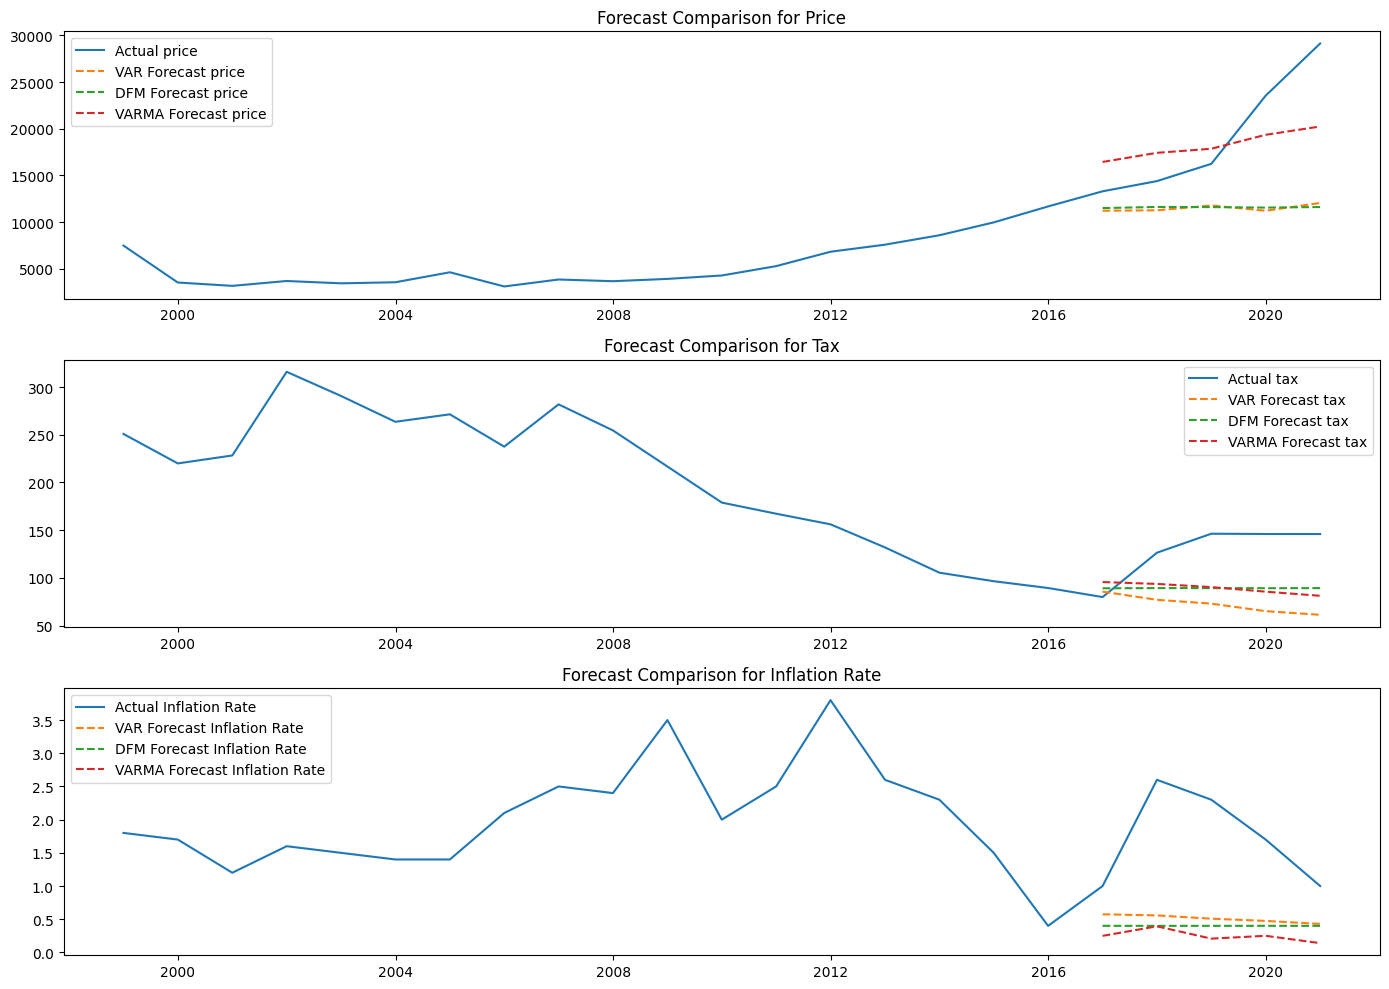

In [ ]:
plt.figure(figsize=(14, 10))

# Plot for 'price'
plt.subplot(3, 1, 1)
plt.plot(multivariate_data.index, multivariate_data['price'], label='Actual price')
plt.plot(forecast_var_df.index, forecast_var_df['price'], linestyle='--', label='VAR Forecast price')
plt.plot(dfm_forecast_mean.index, dfm_forecast_mean['price'], linestyle='--', label='DFM Forecast price')
plt.plot(forecast_varma_df.index, forecast_varma_df['price'], linestyle='--', label='VARMA Forecast price')
plt.title('Forecast Comparison for Price')
plt.legend()

# Plot for 'tax'
plt.subplot(3, 1, 2)
plt.plot(multivariate_data.index, multivariate_data['tax'], label='Actual tax')
plt.plot(forecast_var_df.index, forecast_var_df['tax'], linestyle='--', label='VAR Forecast tax')
plt.plot(dfm_forecast_mean.index, dfm_forecast_mean['tax'], linestyle='--', label='DFM Forecast tax')
plt.plot(forecast_varma_df.index, forecast_varma_df['tax'], linestyle='--', label='VARMA Forecast tax')
plt.title('Forecast Comparison for Tax')
plt.legend()

# Plot for 'Inflation_Rate'
plt.subplot(3, 1, 3)
plt.plot(multivariate_data.index, multivariate_data['Inflation_Rate'], label='Actual Inflation Rate')
plt.plot(forecast_var_df.index, forecast_var_df['Inflation_Rate'], linestyle='--', label='VAR Forecast Inflation Rate')
plt.plot(dfm_forecast_mean.index, dfm_forecast_mean['Inflation_Rate'], linestyle='--', label='DFM Forecast Inflation Rate')
plt.plot(forecast_varma_df.index, forecast_varma_df['Inflation_Rate'], linestyle='--', label='VARMA Forecast Inflation Rate')
plt.title('Forecast Comparison for Inflation Rate')
plt.legend()

plt.tight_layout()
plt.show()


FORECASTING FUTURE TRENDS OF PRICE USING VARMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


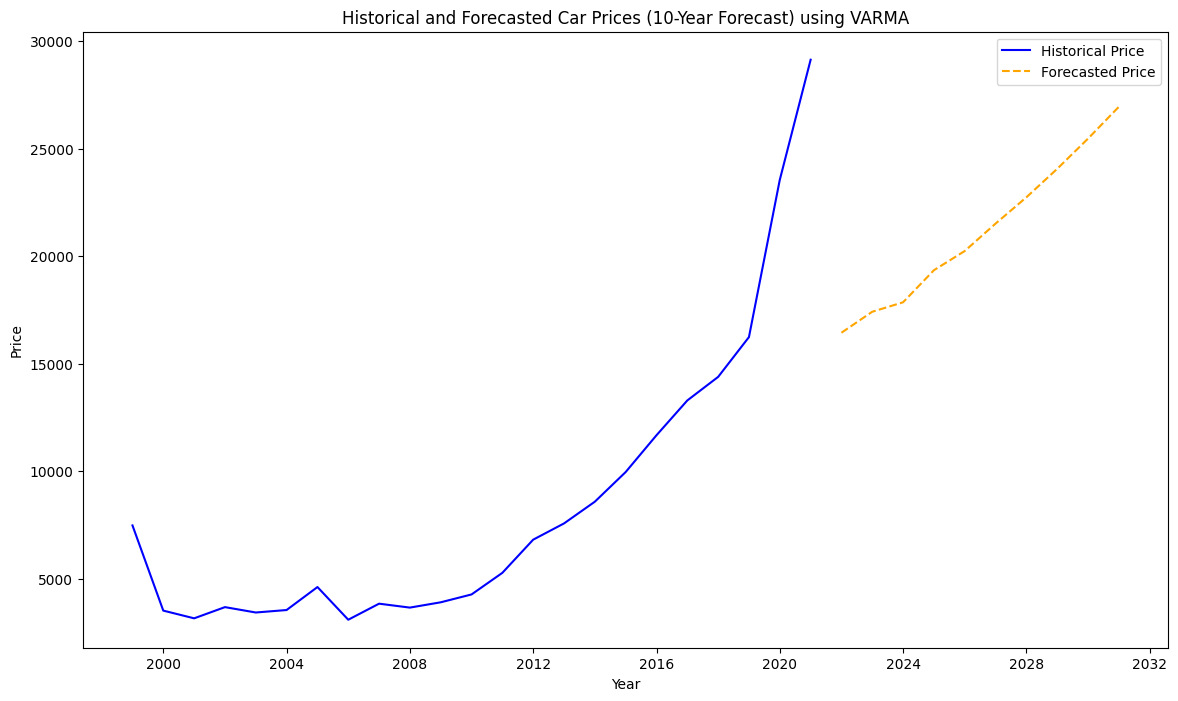

            Forecasted Price
2021-12-31      16443.862936
2022-12-31      17419.508620
2023-12-31      17858.662509
2024-12-31      19351.626436
2025-12-31      20243.588438
2026-12-31      21517.546689
2027-12-31      22740.288911
2028-12-31      24067.439652
2029-12-31      25470.786201
2030-12-31      26949.587236


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX

# Fit VARMA model with optimal order
varma_model = VARMAX(train_data, order=best_order)
varma_fitted = varma_model.fit(disp=False)

# Forecast the next 10 years
forecast_steps = 10
forecast_varma  = varma_fitted.get_forecast(steps=forecast_steps)

forecast_varma_df = pd.DataFrame(varma_forecast, index=test_data.index, columns=train_data.columns)

# Inverse the differencing and log transformation
forecast_varma_df = forecast_varma.predicted_mean

# Reverse the differencing
forecast_varma_df = forecast_varma_df.cumsum() + log_data.iloc[train_size - 1]

# Reverse the log transformation
forecast_varma_df = np.exp(forecast_varma_df) - 1

# Only keep the price column for final output
forecasted_price = forecast_varma_df['price']

# Create a range of future years for plotting
forecast_years = pd.date_range(start=annual_data.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')

# Plot the historical and forecasted prices
plt.figure(figsize=(14, 8))
plt.plot(annual_data.index, annual_data['price'], label='Historical Price', color='blue')
plt.plot(forecast_years, forecasted_price, label='Forecasted Price', linestyle='--', color='orange')
plt.title('Historical and Forecasted Car Prices (10-Year Forecast) using VARMA')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

# Print the forecasted values for review
forecast_df = pd.DataFrame(data=forecasted_price.values, index=forecast_years, columns=['Forecasted Price'])
print(forecast_df)